# Análise Completa de Futebol - Kaggle

Este notebook combina toda a análise de dados de futebol, desde o processamento inicial dos dados até a aplicação de algoritmos de machine learning para predição de colocações.

## Estrutura:
1. **Análise e Processamento de Dados** - Limpeza e preparação dos datasets
2. **Preparação para Predição** - Organização dos dados para machine learning  
3. **Aplicação do KNN** - Modelo de predição usando K-Nearest Neighbors

---



---

# Parte 1: Análise e Processamento de Dados

---


Vamos Começar!

In [1]:
import pandas as pd
import numpy as np
import csv


In [2]:
df_appearances = pd.read_csv('archive/appearances.csv')
df_appearances.head(20)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
5,2234421_146889,2234421,146889,195,2778,2012-07-05,Peter Ankersen,ELQ,1,0,0,0,90
6,2235539_28716,2235539,28716,282,7185,2012-07-05,Adi Adilovic,ELQ,0,0,0,0,90
7,2235539_69445,2235539,69445,282,19771,2012-07-05,Ivan Sesar,ELQ,1,0,0,1,90
8,2235545_19409,2235545,19409,317,200,2012-07-05,Willem Janssen,ELQ,0,0,0,0,45
9,2235545_30003,2235545,30003,317,317,2012-07-05,Wout Brama,ELQ,0,0,0,0,90


In [3]:
df_club_games = pd.read_csv('archive/club_games.csv')
df_club_games.head(20)

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468.0,0.0,NaN,Holger Bachthaler,24.0,2.0,NaN,Armin Veh,Home,0
1,2320454,222.0,0.0,NaN,Volkan Uluc,79.0,2.0,NaN,Bruno Labbadia,Home,0
2,2320460,1.0,3.0,NaN,Jürgen Luginger,86.0,1.0,NaN,Robin Dutt,Home,1
3,2320472,2036.0,4.0,NaN,Frank Schmidt,72.0,5.0,NaN,Alexander Schmidt,Home,0
4,2321027,33.0,3.0,8.0,Jens Keller,41.0,3.0,9.0,Thorsten Fink,Home,0
5,2321033,23.0,0.0,13.0,Torsten Lieberknecht,86.0,1.0,7.0,Robin Dutt,Home,0
6,2321044,16.0,2.0,1.0,Jürgen Klopp,23.0,1.0,15.0,Torsten Lieberknecht,Home,1
7,2321060,23.0,0.0,18.0,Torsten Lieberknecht,24.0,2.0,11.0,Armin Veh,Home,0
8,2321063,33.0,2.0,13.0,Jens Keller,15.0,0.0,3.0,Sami Hyypiä,Home,1
9,2321072,16.0,6.0,1.0,Jürgen Klopp,41.0,2.0,15.0,Thorsten Fink,Home,1


In [4]:
df_clubs = pd.read_csv('archive/clubs.csv')
df_clubs.head(20)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,30,26.6,15,50.0,8,Beşiktaş Park,42445,€-25.26m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.3,18,69.2,17,Olimpico di Roma,70634,€-76.90m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,30,25.5,21,70.0,18,Tottenham Hotspur Stadium,62850,€-120.05m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
5,157,kaa-gent,Koninklijke Atletiek Associatie Gent,BE1,NaN,30,25.2,19,63.3,5,Planet Group Arena,20185,+€5.63m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/kaa-gent/start...
6,1894,hvidovre-if,Hvidovre IF,DK1,NaN,25,26.4,3,12.0,2,PRO VENTILATION Arena,12000,+€225k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/hvidovre-if/st...
7,190,fc-kopenhagen,Football Club København,DK1,NaN,28,26.1,19,67.9,9,Parken,38065,+€35.06m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/fc-kopenhagen/...
8,192,roda-jc-kerkrade,Roda JC Kerkrade,NL1,NaN,25,24.0,9,36.0,0,Parkstad Limburg Stadion,19979,+€1.30m,NaN,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/roda-jc-kerkra...
9,19789,yeni-malatyaspor,Yeni Malatyaspor,TR1,NaN,10,22.9,1,10.0,0,Yeni Malatya Stadyumu,25745,+€778k,NaN,2021,../data/raw/transfermarkt-scraper/2021/clubs.j...,https://www.transfermarkt.co.uk/yeni-malatyasp...


In [5]:
df_competitions = pd.read_csv('archive/competitions.csv')
df_competitions.head(20)

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...,False
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...,False
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...,False
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...,False
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...,False
5,SUC,supercopa,supercopa,domestic_super_cup,other,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/supercopa/star...,False
6,USC,uefa-super-cup,uefa-super-cup,uefa_super_cup,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/uefa-super-cup...,False
7,DK1,superligaen,superligaen,first_tier,domestic_league,39,Denmark,DK1,europa,https://www.transfermarkt.co.uk/superligaen/st...,False
8,EL,europa-league,europa-league,europa_league,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/europa-league/...,False
9,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/laliga/startse...,True


In [6]:
#Vamos analsisar o dataframe club_games, que possui informações sobre os jogos
df_club_games.columns.tolist()

['game_id',
 'club_id',
 'own_goals',
 'own_position',
 'own_manager_name',
 'opponent_id',
 'opponent_goals',
 'opponent_position',
 'opponent_manager_name',
 'hosting',
 'is_win']

In [7]:
#Vamos transformar o hosting em números 
df_club_games['hosting'].unique()
df_club_games['hosting'].value_counts()

hosting
Home    74026
Away    74026
Name: count, dtype: int64

In [8]:
map_hosting = {
    'Home': 1,
    'Away': 0
}
df_club_games['hosting'] = df_club_games['hosting'].map(map_hosting)
df_club_games.head(20)

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468.0,0.0,NaN,Holger Bachthaler,24.0,2.0,NaN,Armin Veh,1,0
1,2320454,222.0,0.0,NaN,Volkan Uluc,79.0,2.0,NaN,Bruno Labbadia,1,0
2,2320460,1.0,3.0,NaN,Jürgen Luginger,86.0,1.0,NaN,Robin Dutt,1,1
3,2320472,2036.0,4.0,NaN,Frank Schmidt,72.0,5.0,NaN,Alexander Schmidt,1,0
4,2321027,33.0,3.0,8.0,Jens Keller,41.0,3.0,9.0,Thorsten Fink,1,0
5,2321033,23.0,0.0,13.0,Torsten Lieberknecht,86.0,1.0,7.0,Robin Dutt,1,0
6,2321044,16.0,2.0,1.0,Jürgen Klopp,23.0,1.0,15.0,Torsten Lieberknecht,1,1
7,2321060,23.0,0.0,18.0,Torsten Lieberknecht,24.0,2.0,11.0,Armin Veh,1,0
8,2321063,33.0,2.0,13.0,Jens Keller,15.0,0.0,3.0,Sami Hyypiä,1,1
9,2321072,16.0,6.0,1.0,Jürgen Klopp,41.0,2.0,15.0,Thorsten Fink,1,1


In [9]:
#Vamos retirar colunas que não são necessárias para a análise
remover_colunas = ['own_manager_name','opponent_manager_name']
df_club_games.drop(columns=remover_colunas, inplace=True)

In [10]:
#Como queremos trabalhar apenas com jogos de campeonatos e não copas, vamos remover todas as linhas que possuem a competição como Copa
#Usando dropna para remover linhas com valores nulos
df_club_games = df_club_games.dropna(subset=['own_position'])
df_club_games.head(10)


,game_id,club_id,own_goals,own_position,opponent_id,opponent_goals,opponent_position,hosting,is_win
4,2321027,33.0,3.0,8.0,41.0,3.0,9.0,1,0
5,2321033,23.0,0.0,13.0,86.0,1.0,7.0,1,0
6,2321044,16.0,2.0,1.0,23.0,1.0,15.0,1,1
7,2321060,23.0,0.0,18.0,24.0,2.0,11.0,1,0
8,2321063,33.0,2.0,13.0,15.0,0.0,3.0,1,1
9,2321072,16.0,6.0,1.0,41.0,2.0,15.0,1,1
10,2321079,23.0,1.0,18.0,4.0,1.0,16.0,1,0
11,2321086,4.0,1.0,15.0,16.0,1.0,1.0,1,0
12,2321119,15.0,1.0,3.0,27.0,1.0,1.0,1,0
13,2321152,44.0,0.0,7.0,33.0,2.0,6.0,1,0


In [11]:
df_games = pd.read_csv('archive/games.csv')
df_games.head(10)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321027,L1,2013,1. Matchday,2013-08-11,33.0,41.0,3.0,3.0,8.0,...,Veltins-Arena,61973.0,Manuel Gräfe,https://www.transfermarkt.co.uk/fc-schalke-04_...,4-2-3-1,4-2-3-1,FC Schalke 04,Hamburger SV,3:3,domestic_league
1,2321033,L1,2013,1. Matchday,2013-08-10,23.0,86.0,0.0,1.0,13.0,...,EINTRACHT-Stadion,23000.0,Deniz Aytekin,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-3-1-2,Eintracht Braunschweig,Sportverein Werder Bremen von 1899,0:1,domestic_league
2,2321044,L1,2013,2. Matchday,2013-08-18,16.0,23.0,2.0,1.0,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
3,2321060,L1,2013,3. Matchday,2013-08-25,23.0,24.0,0.0,2.0,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
4,2321072,L1,2013,5. Matchday,2013-09-14,16.0,41.0,6.0,2.0,1.0,...,SIGNAL IDUNA PARK,80645.0,Tobias Welz,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,3-5-2,Borussia Dortmund,Hamburger SV,6:2,domestic_league
5,2321079,L1,2013,5. Matchday,2013-09-15,23.0,4.0,1.0,1.0,18.0,...,EINTRACHT-Stadion,22570.0,Marco Fritz,https://www.transfermarkt.co.uk/eintracht-brau...,4-4-2 double 6,4-2-3-1,Eintracht Braunschweig,1.FC Nuremberg,1:1,domestic_league
6,2321086,L1,2013,6. Matchday,2013-09-21,4.0,16.0,1.0,1.0,15.0,...,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league
7,2321152,L1,2013,11. Matchday,2013-11-02,44.0,33.0,0.0,2.0,7.0,...,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league
8,2321205,L1,2013,17. Matchday,2013-12-21,41.0,39.0,2.0,3.0,14.0,...,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league
9,2321233,L1,2013,20. Matchday,2014-02-08,41.0,44.0,0.0,3.0,17.0,...,Volksparkstadion,48593.0,Deniz Aytekin,https://www.transfermarkt.co.uk/hamburger-sv_h...,4-2-3-1,4-1-4-1,Hamburger SV,Hertha BSC,0:3,domestic_league


In [12]:
df_games.columns.tolist()

['game_id',
 'competition_id',
 'season',
 'round',
 'date',
 'home_club_id',
 'away_club_id',
 'home_club_goals',
 'away_club_goals',
 'home_club_position',
 'away_club_position',
 'home_club_manager_name',
 'away_club_manager_name',
 'stadium',
 'attendance',
 'referee',
 'url',
 'home_club_formation',
 'away_club_formation',
 'home_club_name',
 'away_club_name',
 'aggregate',
 'competition_type']

In [13]:
#Vamos retirar algumas colunas que não são necessárias para a análise
remover_colunas = ['referee','url','home_club_name','away_club_name','home_club_manager_name',
                   'away_club_manager_name','stadium']
df_games.drop(columns=remover_colunas, inplace=True)


In [14]:
#Vamos mostrar a tabela novamente
df_games.head(10)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance,home_club_formation,away_club_formation,aggregate,competition_type
0,2321027,L1,2013,1. Matchday,2013-08-11,33.0,41.0,3.0,3.0,8.0,9.0,61973.0,4-2-3-1,4-2-3-1,3:3,domestic_league
1,2321033,L1,2013,1. Matchday,2013-08-10,23.0,86.0,0.0,1.0,13.0,7.0,23000.0,4-3-2-1,4-3-1-2,0:1,domestic_league
2,2321044,L1,2013,2. Matchday,2013-08-18,16.0,23.0,2.0,1.0,1.0,15.0,80200.0,4-2-3-1,4-3-2-1,2:1,domestic_league
3,2321060,L1,2013,3. Matchday,2013-08-25,23.0,24.0,0.0,2.0,18.0,11.0,23325.0,4-3-2-1,4-2-3-1,0:2,domestic_league
4,2321072,L1,2013,5. Matchday,2013-09-14,16.0,41.0,6.0,2.0,1.0,15.0,80645.0,4-2-3-1,3-5-2,6:2,domestic_league
5,2321079,L1,2013,5. Matchday,2013-09-15,23.0,4.0,1.0,1.0,18.0,16.0,22570.0,4-4-2 double 6,4-2-3-1,1:1,domestic_league
6,2321086,L1,2013,6. Matchday,2013-09-21,4.0,16.0,1.0,1.0,15.0,1.0,50000.0,4-2-3-1,4-2-3-1,1:1,domestic_league
7,2321152,L1,2013,11. Matchday,2013-11-02,44.0,33.0,0.0,2.0,7.0,6.0,69277.0,4-2-3-1,4-2-3-1,0:2,domestic_league
8,2321205,L1,2013,17. Matchday,2013-12-21,41.0,39.0,2.0,3.0,14.0,9.0,50000.0,4-2-3-1,4-4-2 Diamond,2:3,domestic_league
9,2321233,L1,2013,20. Matchday,2014-02-08,41.0,44.0,0.0,3.0,17.0,7.0,48593.0,4-2-3-1,4-1-4-1,0:3,domestic_league


In [15]:
df_games['competition_type'].unique()
#Vamos retirar as linhas que possuem a competição como Copa
df_games = df_games[df_games['competition_type'] == 'domestic_league']

In [16]:
df_games['competition_type'].unique()
#Agora que já normalizamos podemos retirar essa linha 
df_games = df_games.drop(columns=['competition_type'])

In [17]:
#Vamos analisar agora as formações dos dois times
df_games['home_club_formation'].unique()

array(['4-2-3-1', '4-3-2-1', '4-4-2 double 6', '4-3-3 Defending',
       '4-3-3 Attacking', '4-5-1 flat', '4-1-4-1', '4-3-1-2',
       '3-5-2 flat', '4-4-2 Diamond', '5-4-1', '4-4-1-1', '4-4-2',
       '3-4-2-1', '5-2-3', '4-1-3-2', '5-3-2', '3-5-2', '3-6-1', '4-3-3',
       '4-5-1', '3-4-3', nan, '5-4-1 Diamond', '2-5-3', '3-4-1-2',
       '3-5-2 Attacking', '3-1-4-2', '3-4-3 Diamond', '3-3-3-1', '4-2-4',
       '4-6-0', '6-1-3', '6-2-2', '2-4-4', '2-7-1', '3-3-4'], dtype=object)

In [18]:
mapeamento_formações = {
    np.nan: 0,
    '4-2-3-1': 1,
    '4-3-2-1': 2,
    '4-4-2 double 6': 3,
    '4-3-3 Defending': 4,
    '4-3-3 Attacking': 5,
    '4-5-1 flat': 6,
    '4-1-4-1': 7,
    '4-3-1-2': 8,
    '3-5-2 flat': 9,
    '4-4-2 Diamond': 10,
    '5-4-1': 11,
    '4-4-1-1': 12,
    '4-4-2': 13,
    '3-4-2-1': 14,
    '5-2-3': 15,
    '4-1-3-2': 16,
    '5-3-2': 17,
    '3-5-2': 18,
    '3-6-1': 19,
    '4-3-3': 20,
    '4-5-1': 21,
    '3-4-3': 22,
    '5-4-1 Diamond': 23,
    '2-5-3' : 24,
    '3-4-1-2': 25,
    '3-5-2 Attacking': 26,
    '3-1-4-2': 27,
    '3-4-3 Diamond': 28,
    '3-3-3-1': 29,
    '4-2-4': 30,
    '4-6-0': 31,
    '6-1-3': 32,
    '6-2-2': 33,
    '2-4-4': 34,
    '2-7-1' : 35,
    '3-3-4': 36
}

df_games['home_club_formation'] = df_games['home_club_formation'].map(mapeamento_formações)
df_games['away_club_formation'] = df_games['away_club_formation'].map(mapeamento_formações)

In [19]:
#Vamos retirar o texto matchday da coluna round 
df_games['round'].unique()
# Extrai apenas os números
df_games['round'] = df_games['round'].str.extract(r'(\d+)')

In [20]:
df_games['round'].unique()

array(['1', '2', '3', '5', '6', '11', '17', '20', '29', '31', '32', '18',
       '8', '10', '15', '19', '22', '21', '24', '28', '34', '36', '14',
       '13', '23', '37', '35', '9', '26', '25', '30', '4', '12', '7',
       '33', '27', '16', '38', '39', '41', '42', '40'], dtype=object)

In [21]:
df_games.head(10)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance,home_club_formation,away_club_formation,aggregate
0,2321027,L1,2013,1,2013-08-11,33.0,41.0,3.0,3.0,8.0,9.0,61973.0,1,1.0,3:3
1,2321033,L1,2013,1,2013-08-10,23.0,86.0,0.0,1.0,13.0,7.0,23000.0,2,8.0,0:1
2,2321044,L1,2013,2,2013-08-18,16.0,23.0,2.0,1.0,1.0,15.0,80200.0,1,2.0,2:1
3,2321060,L1,2013,3,2013-08-25,23.0,24.0,0.0,2.0,18.0,11.0,23325.0,2,1.0,0:2
4,2321072,L1,2013,5,2013-09-14,16.0,41.0,6.0,2.0,1.0,15.0,80645.0,1,18.0,6:2
5,2321079,L1,2013,5,2013-09-15,23.0,4.0,1.0,1.0,18.0,16.0,22570.0,3,1.0,1:1
6,2321086,L1,2013,6,2013-09-21,4.0,16.0,1.0,1.0,15.0,1.0,50000.0,1,1.0,1:1
7,2321152,L1,2013,11,2013-11-02,44.0,33.0,0.0,2.0,7.0,6.0,69277.0,1,1.0,0:2
8,2321205,L1,2013,17,2013-12-21,41.0,39.0,2.0,3.0,14.0,9.0,50000.0,1,10.0,2:3
9,2321233,L1,2013,20,2014-02-08,41.0,44.0,0.0,3.0,17.0,7.0,48593.0,1,7.0,0:3


In [22]:
#Vendo o resultado das partidas
df_games['aggregate'].unique()

array(['3:3', '0:1', '2:1', '0:2', '6:2', '1:1', '2:3', '0:3', '0:0',
       '2:2', '1:2', '4:1', '3:1', '2:6', '3:4', '3:0', '1:0', '4:3',
       '1:4', '4:2', '4:0', '1:3', '9:1', '2:4', '2:0', '3:2', '7:0',
       '0:5', '8:0', '0:4', '5:1', '1:7', '5:3', '5:0', '0:7', '6:0',
       '2:5', '6:1', '5:2', '4:5', '1:5', '7:1', '3:5', '7:2', '1:6',
       '8:2', '0:6', '4:4', '8:1', '2:7', '9:0', '10:0', '2:8', '6:3',
       '3:6', '5:4', '5:5', '7:3', '0:8', '0:9', '6:4', '0:13', '10:1',
       '3:7', '4:6', '9:2', '1:8', '10:2'], dtype=object)

In [23]:

mapeamento_partidas = {
    # Empates
    '0:0': 0,
    '1:1': 1,
    '2:2': 2,
    '3:3': 3,
    '4:4': 4,
    '5:5': 5,

    # Vitórias/Derrotas (valores menores primeiro para padronização)
    '0:1': 6,  # e '1:0'
    '0:2': 7,  # e '2:0'
    '0:3': 8,  # e '3:0'
    '0:4': 9,  # e '4:0'
    '0:5': 10, # e '5:0'
    '0:6': 11, # e '6:0'
    '0:7': 12, # e '7:0'
    '0:8': 13, # e '8:0'
    '0:9': 14, # e '9:0'
    '0:13': 15, # e '13:0'
    '1:2': 16, # e '2:1'
    '1:3': 17, # e '3:1'
    '1:4': 18, # e '4:1'
    '1:5': 19, # e '5:1'
    '1:6': 20, # e '6:1'
    '1:7': 21, # e '7:1'
    '1:8': 22, # e '8:1'
    '2:3': 23, # e '3:2'
    '2:4': 24, # e '4:2'
    '2:5': 25, # e '5:2'
    '2:6': 26, # e '6:2'
    '2:7': 27, # e '7:2'
    '2:8': 28, # e '8:2'
    '3:4': 29, # e '4:3'
    '3:5': 30, # e '5:3'
    '3:6': 31, # e '6:3'
    '3:7': 32, # e '7:3'
    '4:5': 33, # e '5:4'
    '4:6': 34, # e '6:4'
    '9:1': 35, # e '1:9'
    '9:2': 36, # e '2:9'
    '10:0': 37, # e '0:10'
    '10:1': 38, # e '1:10'
    '10:2': 39, # e '2:10'
}

# Adicionando as chaves invertidas para garantir o mesmo mapeamento
mapeamento_partidas['1:0'] = mapeamento_partidas['0:1']
mapeamento_partidas['2:0'] = mapeamento_partidas['0:2']
mapeamento_partidas['3:0'] = mapeamento_partidas['0:3']
mapeamento_partidas['4:0'] = mapeamento_partidas['0:4']
mapeamento_partidas['5:0'] = mapeamento_partidas['0:5']
mapeamento_partidas['6:0'] = mapeamento_partidas['0:6']
mapeamento_partidas['7:0'] = mapeamento_partidas['0:7']
mapeamento_partidas['8:0'] = mapeamento_partidas['0:8']
mapeamento_partidas['9:0'] = mapeamento_partidas['0:9']
mapeamento_partidas['13:0'] = mapeamento_partidas['0:13']
mapeamento_partidas['2:1'] = mapeamento_partidas['1:2']
mapeamento_partidas['3:1'] = mapeamento_partidas['1:3']
mapeamento_partidas['4:1'] = mapeamento_partidas['1:4']
mapeamento_partidas['5:1'] = mapeamento_partidas['1:5']
mapeamento_partidas['6:1'] = mapeamento_partidas['1:6']
mapeamento_partidas['7:1'] = mapeamento_partidas['1:7']
mapeamento_partidas['8:1'] = mapeamento_partidas['1:8']
mapeamento_partidas['3:2'] = mapeamento_partidas['2:3']
mapeamento_partidas['4:2'] = mapeamento_partidas['2:4']
mapeamento_partidas['5:2'] = mapeamento_partidas['2:5']
mapeamento_partidas['6:2'] = mapeamento_partidas['2:6']
mapeamento_partidas['7:2'] = mapeamento_partidas['2:7']
mapeamento_partidas['8:2'] = mapeamento_partidas['2:8']
mapeamento_partidas['4:3'] = mapeamento_partidas['3:4']
mapeamento_partidas['5:3'] = mapeamento_partidas['3:5']
mapeamento_partidas['6:3'] = mapeamento_partidas['3:6']
mapeamento_partidas['7:3'] = mapeamento_partidas['3:7']
mapeamento_partidas['5:4'] = mapeamento_partidas['4:5']
mapeamento_partidas['6:4'] = mapeamento_partidas['4:6']
mapeamento_partidas['1:9'] = mapeamento_partidas['9:1']
mapeamento_partidas['2:9'] = mapeamento_partidas['9:2']
mapeamento_partidas['0:10'] = mapeamento_partidas['10:0']
mapeamento_partidas['1:10'] = mapeamento_partidas['10:1']
mapeamento_partidas['2:10'] = mapeamento_partidas['10:2']

df_games['aggregate'] = df_games['aggregate'].map(mapeamento_partidas)


In [24]:
df_games['aggregate'].unique()

array([ 3,  6, 16,  7, 26,  1, 23,  8,  0,  2, 18, 17, 29, 24,  9, 35, 12,
       10, 13, 19, 21, 30, 11, 25, 20, 33, 27, 28,  4, 22, 14, 37, 31,  5,
       32, 34, 15, 38, 36, 39], dtype=int64)

In [25]:
#Vamos juntar os datframes df_club_games com df_games
df_unido = pd.merge(df_club_games, df_games, on='game_id', how='inner')
df_unido.head(10)

,game_id,club_id,own_goals,own_position,opponent_id,opponent_goals,opponent_position,hosting,is_win,competition_id,...,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance,home_club_formation,away_club_formation,aggregate
0,2321027,33.0,3.0,8.0,41.0,3.0,9.0,1,0,L1,...,33.0,41.0,3.0,3.0,8.0,9.0,61973.0,1,1.0,3
1,2321033,23.0,0.0,13.0,86.0,1.0,7.0,1,0,L1,...,23.0,86.0,0.0,1.0,13.0,7.0,23000.0,2,8.0,6
2,2321044,16.0,2.0,1.0,23.0,1.0,15.0,1,1,L1,...,16.0,23.0,2.0,1.0,1.0,15.0,80200.0,1,2.0,16
3,2321060,23.0,0.0,18.0,24.0,2.0,11.0,1,0,L1,...,23.0,24.0,0.0,2.0,18.0,11.0,23325.0,2,1.0,7
4,2321063,33.0,2.0,13.0,15.0,0.0,3.0,1,1,L1,...,33.0,15.0,2.0,0.0,13.0,3.0,61973.0,1,5.0,7
5,2321072,16.0,6.0,1.0,41.0,2.0,15.0,1,1,L1,...,16.0,41.0,6.0,2.0,1.0,15.0,80645.0,1,18.0,26
6,2321079,23.0,1.0,18.0,4.0,1.0,16.0,1,0,L1,...,23.0,4.0,1.0,1.0,18.0,16.0,22570.0,3,1.0,1
7,2321086,4.0,1.0,15.0,16.0,1.0,1.0,1,0,L1,...,4.0,16.0,1.0,1.0,15.0,1.0,50000.0,1,1.0,1
8,2321119,15.0,1.0,3.0,27.0,1.0,1.0,1,0,L1,...,15.0,27.0,1.0,1.0,3.0,1.0,30210.0,2,7.0,1
9,2321152,44.0,0.0,7.0,33.0,2.0,6.0,1,0,L1,...,44.0,33.0,0.0,2.0,7.0,6.0,69277.0,1,1.0,7


In [26]:
#Antes de fazer isso, vamos ver se as colunas já não estão duplicadas
df_unido.duplicated().sum()


0

In [27]:
#Agora vamos separar os times em casa e fora em colunas separadas
#Para isso, vamos ter que adaptar diversos passos da lógica. Exemplo disso é a vitória, que caso seja 1 significa que o time da casa ganhou e o time visitante perdeu. Além disso, vamos ter que duplicar as linhas e retirar todas as colunas que só tenham a ver com um deles
#Vamos duplicar o dataframe
df_casa = df_unido.copy()
df_vistante = df_unido.copy()



In [28]:
#Vamos rever todas as colunas que temos
df_casa.columns.tolist()

['game_id',
 'club_id',
 'own_goals',
 'own_position',
 'opponent_id',
 'opponent_goals',
 'opponent_position',
 'hosting',
 'is_win',
 'competition_id',
 'season',
 'round',
 'date',
 'home_club_id',
 'away_club_id',
 'home_club_goals',
 'away_club_goals',
 'home_club_position',
 'away_club_position',
 'attendance',
 'home_club_formation',
 'away_club_formation',
 'aggregate']

In [29]:
#Parâmetros exclusivos do time da casa 
#Refazeno a lógica. Vamos manter sim opponent goals, opponent position e away club goals, pois são importantes para a análise.
casa = ['club_id','home_club_id','home_club_goals','home_club_position']
#Parâmetros exclusivos do time visitante
visitante = ['opponent_id','away_club_id','away_club_goals','away_club_position']

#Vamos retirar os parametros casa do dataframe df_visitante
df_vistante.drop(columns=casa, inplace=True)

#Vamos retirar os parametros visitante do dataframe df_casa
df_casa.drop(columns=visitante, inplace=True)

In [30]:
#Verificando o df_casa
df_casa.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,round,date,home_club_id,home_club_goals,home_club_position,attendance,home_club_formation,away_club_formation,aggregate
0,2321027,33.0,3.0,8.0,3.0,9.0,1,0,L1,2013,1,2013-08-11,33.0,3.0,8.0,61973.0,1,1.0,3
1,2321033,23.0,0.0,13.0,1.0,7.0,1,0,L1,2013,1,2013-08-10,23.0,0.0,13.0,23000.0,2,8.0,6
2,2321044,16.0,2.0,1.0,1.0,15.0,1,1,L1,2013,2,2013-08-18,16.0,2.0,1.0,80200.0,1,2.0,16
3,2321060,23.0,0.0,18.0,2.0,11.0,1,0,L1,2013,3,2013-08-25,23.0,0.0,18.0,23325.0,2,1.0,7
4,2321063,33.0,2.0,13.0,0.0,3.0,1,1,L1,2013,4,2013-08-31,33.0,2.0,13.0,61973.0,1,5.0,7
5,2321072,16.0,6.0,1.0,2.0,15.0,1,1,L1,2013,5,2013-09-14,16.0,6.0,1.0,80645.0,1,18.0,26
6,2321079,23.0,1.0,18.0,1.0,16.0,1,0,L1,2013,5,2013-09-15,23.0,1.0,18.0,22570.0,3,1.0,1
7,2321086,4.0,1.0,15.0,1.0,1.0,1,0,L1,2013,6,2013-09-21,4.0,1.0,15.0,50000.0,1,1.0,1
8,2321119,15.0,1.0,3.0,1.0,1.0,1,0,L1,2013,8,2013-10-05,15.0,1.0,3.0,30210.0,2,7.0,1
9,2321152,44.0,0.0,7.0,2.0,6.0,1,0,L1,2013,11,2013-11-02,44.0,0.0,7.0,69277.0,1,1.0,7


In [31]:
#Verificando o df vistante
df_vistante.head(10)

,game_id,own_goals,own_position,opponent_id,opponent_goals,opponent_position,hosting,is_win,competition_id,season,round,date,away_club_id,away_club_goals,away_club_position,attendance,home_club_formation,away_club_formation,aggregate
0,2321027,3.0,8.0,41.0,3.0,9.0,1,0,L1,2013,1,2013-08-11,41.0,3.0,9.0,61973.0,1,1.0,3
1,2321033,0.0,13.0,86.0,1.0,7.0,1,0,L1,2013,1,2013-08-10,86.0,1.0,7.0,23000.0,2,8.0,6
2,2321044,2.0,1.0,23.0,1.0,15.0,1,1,L1,2013,2,2013-08-18,23.0,1.0,15.0,80200.0,1,2.0,16
3,2321060,0.0,18.0,24.0,2.0,11.0,1,0,L1,2013,3,2013-08-25,24.0,2.0,11.0,23325.0,2,1.0,7
4,2321063,2.0,13.0,15.0,0.0,3.0,1,1,L1,2013,4,2013-08-31,15.0,0.0,3.0,61973.0,1,5.0,7
5,2321072,6.0,1.0,41.0,2.0,15.0,1,1,L1,2013,5,2013-09-14,41.0,2.0,15.0,80645.0,1,18.0,26
6,2321079,1.0,18.0,4.0,1.0,16.0,1,0,L1,2013,5,2013-09-15,4.0,1.0,16.0,22570.0,3,1.0,1
7,2321086,1.0,15.0,16.0,1.0,1.0,1,0,L1,2013,6,2013-09-21,16.0,1.0,1.0,50000.0,1,1.0,1
8,2321119,1.0,3.0,27.0,1.0,1.0,1,0,L1,2013,8,2013-10-05,27.0,1.0,1.0,30210.0,2,7.0,1
9,2321152,0.0,7.0,33.0,2.0,6.0,1,0,L1,2013,11,2013-11-02,33.0,2.0,6.0,69277.0,1,1.0,7


In [32]:
# Cria coluna baseada no aggregate
# Cria coluna baseada no aggregate - apenas empate ou vitória
df_casa['empate'] = np.where(
    df_casa['aggregate'] <= 5, 0,  # Empate = 0
    1                               # Vitória/Derrota = 1
)

df_casa.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,round,date,home_club_id,home_club_goals,home_club_position,attendance,home_club_formation,away_club_formation,aggregate,empate
0,2321027,33.0,3.0,8.0,3.0,9.0,1,0,L1,2013,1,2013-08-11,33.0,3.0,8.0,61973.0,1,1.0,3,0
1,2321033,23.0,0.0,13.0,1.0,7.0,1,0,L1,2013,1,2013-08-10,23.0,0.0,13.0,23000.0,2,8.0,6,1
2,2321044,16.0,2.0,1.0,1.0,15.0,1,1,L1,2013,2,2013-08-18,16.0,2.0,1.0,80200.0,1,2.0,16,1
3,2321060,23.0,0.0,18.0,2.0,11.0,1,0,L1,2013,3,2013-08-25,23.0,0.0,18.0,23325.0,2,1.0,7,1
4,2321063,33.0,2.0,13.0,0.0,3.0,1,1,L1,2013,4,2013-08-31,33.0,2.0,13.0,61973.0,1,5.0,7,1
5,2321072,16.0,6.0,1.0,2.0,15.0,1,1,L1,2013,5,2013-09-14,16.0,6.0,1.0,80645.0,1,18.0,26,1
6,2321079,23.0,1.0,18.0,1.0,16.0,1,0,L1,2013,5,2013-09-15,23.0,1.0,18.0,22570.0,3,1.0,1,0
7,2321086,4.0,1.0,15.0,1.0,1.0,1,0,L1,2013,6,2013-09-21,4.0,1.0,15.0,50000.0,1,1.0,1,0
8,2321119,15.0,1.0,3.0,1.0,1.0,1,0,L1,2013,8,2013-10-05,15.0,1.0,3.0,30210.0,2,7.0,1,0
9,2321152,44.0,0.0,7.0,2.0,6.0,1,0,L1,2013,11,2013-11-02,44.0,0.0,7.0,69277.0,1,1.0,7,1


In [33]:
#Agora vamos analisar 2 colunas. Se for empate, nada a olhar. Caso não seja, devemos verificar se a coluna is win é 1 ou 0: dessa forma, vamos finalmente determinar se empatou, ganhou ou perdeu

for i in range(len(df_casa)):
    if df_casa['empate'][i] == 0: #se for 0 empatou
        df_casa.loc[i, 'is_win'] = 2

#Agora podemos remover a coluna empate, pois não precisamos mais dela
df_casa.drop(columns=['empate'], inplace=True)

df_casa.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,round,date,home_club_id,home_club_goals,home_club_position,attendance,home_club_formation,away_club_formation,aggregate
0,2321027,33.0,3.0,8.0,3.0,9.0,1,2,L1,2013,1,2013-08-11,33.0,3.0,8.0,61973.0,1,1.0,3
1,2321033,23.0,0.0,13.0,1.0,7.0,1,0,L1,2013,1,2013-08-10,23.0,0.0,13.0,23000.0,2,8.0,6
2,2321044,16.0,2.0,1.0,1.0,15.0,1,1,L1,2013,2,2013-08-18,16.0,2.0,1.0,80200.0,1,2.0,16
3,2321060,23.0,0.0,18.0,2.0,11.0,1,0,L1,2013,3,2013-08-25,23.0,0.0,18.0,23325.0,2,1.0,7
4,2321063,33.0,2.0,13.0,0.0,3.0,1,1,L1,2013,4,2013-08-31,33.0,2.0,13.0,61973.0,1,5.0,7
5,2321072,16.0,6.0,1.0,2.0,15.0,1,1,L1,2013,5,2013-09-14,16.0,6.0,1.0,80645.0,1,18.0,26
6,2321079,23.0,1.0,18.0,1.0,16.0,1,2,L1,2013,5,2013-09-15,23.0,1.0,18.0,22570.0,3,1.0,1
7,2321086,4.0,1.0,15.0,1.0,1.0,1,2,L1,2013,6,2013-09-21,4.0,1.0,15.0,50000.0,1,1.0,1
8,2321119,15.0,1.0,3.0,1.0,1.0,1,2,L1,2013,8,2013-10-05,15.0,1.0,3.0,30210.0,2,7.0,1
9,2321152,44.0,0.0,7.0,2.0,6.0,1,0,L1,2013,11,2013-11-02,44.0,0.0,7.0,69277.0,1,1.0,7


In [34]:
#Agora vamos fazer o mesmo para o time visitante
#No entanto, temos um detalhe crucial: Antes devemos inverter toda a coluna is_win, pois o time visitante é o inverso do time da casa
#Também temos que inverter a coluna hosting, pois o time visitante é o inverso do time da casa
for i in range(len(df_vistante)):
    if df_vistante['is_win'][i] == 0:
        df_vistante.loc[i, 'is_win'] = 1 
    elif df_vistante['is_win'][i] == 1:
        df_vistante.loc[i, 'is_win'] = 0
    if df_vistante['hosting'][i] == 1:
        df_vistante.loc[i, 'hosting'] = 0
    elif df_vistante['hosting'][i] == 0:
        df_vistante.loc[i, 'hosting'] = 1
    

df_vistante.head(10)


,game_id,own_goals,own_position,opponent_id,opponent_goals,opponent_position,hosting,is_win,competition_id,season,round,date,away_club_id,away_club_goals,away_club_position,attendance,home_club_formation,away_club_formation,aggregate
0,2321027,3.0,8.0,41.0,3.0,9.0,0,1,L1,2013,1,2013-08-11,41.0,3.0,9.0,61973.0,1,1.0,3
1,2321033,0.0,13.0,86.0,1.0,7.0,0,1,L1,2013,1,2013-08-10,86.0,1.0,7.0,23000.0,2,8.0,6
2,2321044,2.0,1.0,23.0,1.0,15.0,0,0,L1,2013,2,2013-08-18,23.0,1.0,15.0,80200.0,1,2.0,16
3,2321060,0.0,18.0,24.0,2.0,11.0,0,1,L1,2013,3,2013-08-25,24.0,2.0,11.0,23325.0,2,1.0,7
4,2321063,2.0,13.0,15.0,0.0,3.0,0,0,L1,2013,4,2013-08-31,15.0,0.0,3.0,61973.0,1,5.0,7
5,2321072,6.0,1.0,41.0,2.0,15.0,0,0,L1,2013,5,2013-09-14,41.0,2.0,15.0,80645.0,1,18.0,26
6,2321079,1.0,18.0,4.0,1.0,16.0,0,1,L1,2013,5,2013-09-15,4.0,1.0,16.0,22570.0,3,1.0,1
7,2321086,1.0,15.0,16.0,1.0,1.0,0,1,L1,2013,6,2013-09-21,16.0,1.0,1.0,50000.0,1,1.0,1
8,2321119,1.0,3.0,27.0,1.0,1.0,0,1,L1,2013,8,2013-10-05,27.0,1.0,1.0,30210.0,2,7.0,1
9,2321152,0.0,7.0,33.0,2.0,6.0,0,1,L1,2013,11,2013-11-02,33.0,2.0,6.0,69277.0,1,1.0,7


In [35]:
#Agora sim vamos criar o empate e duplicar o processo para o time visitante

# Cria coluna baseada no aggregate
# Cria coluna baseada no aggregate - apenas empate ou vitória
df_vistante['empate'] = np.where(
    df_vistante['aggregate'] <= 5, 0,  # Empate = 0
    1                               # Vitória/Derrota = 1
)

df_vistante.head(10)

#Agora vamos analisar 2 colunas. Se for empate, nada a olhar. Caso não seja, devemos verificar se a coluna is win é 1 ou 0: dessa forma, vamos finalmente determinar se empatou, ganhou ou perdeu

for i in range(len(df_vistante)):
    if df_vistante['empate'][i] == 0: #se for 0 empatou
        df_vistante.loc[i, 'is_win'] = 2

#Agora podemos remover a coluna empate, pois não precisamos mais dela
df_vistante.drop(columns=['empate'], inplace=True)

df_vistante.head(10)


,game_id,own_goals,own_position,opponent_id,opponent_goals,opponent_position,hosting,is_win,competition_id,season,round,date,away_club_id,away_club_goals,away_club_position,attendance,home_club_formation,away_club_formation,aggregate
0,2321027,3.0,8.0,41.0,3.0,9.0,0,2,L1,2013,1,2013-08-11,41.0,3.0,9.0,61973.0,1,1.0,3
1,2321033,0.0,13.0,86.0,1.0,7.0,0,1,L1,2013,1,2013-08-10,86.0,1.0,7.0,23000.0,2,8.0,6
2,2321044,2.0,1.0,23.0,1.0,15.0,0,0,L1,2013,2,2013-08-18,23.0,1.0,15.0,80200.0,1,2.0,16
3,2321060,0.0,18.0,24.0,2.0,11.0,0,1,L1,2013,3,2013-08-25,24.0,2.0,11.0,23325.0,2,1.0,7
4,2321063,2.0,13.0,15.0,0.0,3.0,0,0,L1,2013,4,2013-08-31,15.0,0.0,3.0,61973.0,1,5.0,7
5,2321072,6.0,1.0,41.0,2.0,15.0,0,0,L1,2013,5,2013-09-14,41.0,2.0,15.0,80645.0,1,18.0,26
6,2321079,1.0,18.0,4.0,1.0,16.0,0,2,L1,2013,5,2013-09-15,4.0,1.0,16.0,22570.0,3,1.0,1
7,2321086,1.0,15.0,16.0,1.0,1.0,0,2,L1,2013,6,2013-09-21,16.0,1.0,1.0,50000.0,1,1.0,1
8,2321119,1.0,3.0,27.0,1.0,1.0,0,2,L1,2013,8,2013-10-05,27.0,1.0,1.0,30210.0,2,7.0,1
9,2321152,0.0,7.0,33.0,2.0,6.0,0,1,L1,2013,11,2013-11-02,33.0,2.0,6.0,69277.0,1,1.0,7


In [36]:
df_vistante.columns.tolist()

['game_id',
 'own_goals',
 'own_position',
 'opponent_id',
 'opponent_goals',
 'opponent_position',
 'hosting',
 'is_win',
 'competition_id',
 'season',
 'round',
 'date',
 'away_club_id',
 'away_club_goals',
 'away_club_position',
 'attendance',
 'home_club_formation',
 'away_club_formation',
 'aggregate']

In [37]:
df_casa.columns.tolist()

['game_id',
 'club_id',
 'own_goals',
 'own_position',
 'opponent_goals',
 'opponent_position',
 'hosting',
 'is_win',
 'competition_id',
 'season',
 'round',
 'date',
 'home_club_id',
 'home_club_goals',
 'home_club_position',
 'attendance',
 'home_club_formation',
 'away_club_formation',
 'aggregate']

In [38]:
#Vamos agora renomear as colunas do df_vistante para que fiquem IGUAIS as do df_casa para depois podermos juntar os dois dataframes
df_visitante2 = df_vistante.rename(columns={
    'opponent_goals': 'own_goals',
    'opponent_position': 'own_position',
    'opponent_id': 'club_id',
    'away_club_id': 'home_club_id',
    'away_club_goals': 'home_club_goals',
    'away_club_formation': 'home_club_formation',
    'away_club_position': 'home_club_position',
    'home_club_formation': 'away_club_formation',
    'own_goals': 'opponent_goals',
    'own_position': 'opponent_position',
})

In [39]:
df_unido2 = pd.concat([df_casa, df_visitante2], ignore_index=True)
df_unido2.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,round,date,home_club_id,home_club_goals,home_club_position,attendance,home_club_formation,away_club_formation,aggregate
0,2321027,33.0,3.0,8.0,3.0,9.0,1,2,L1,2013,1,2013-08-11,33.0,3.0,8.0,61973.0,1.0,1.0,3
1,2321033,23.0,0.0,13.0,1.0,7.0,1,0,L1,2013,1,2013-08-10,23.0,0.0,13.0,23000.0,2.0,8.0,6
2,2321044,16.0,2.0,1.0,1.0,15.0,1,1,L1,2013,2,2013-08-18,16.0,2.0,1.0,80200.0,1.0,2.0,16
3,2321060,23.0,0.0,18.0,2.0,11.0,1,0,L1,2013,3,2013-08-25,23.0,0.0,18.0,23325.0,2.0,1.0,7
4,2321063,33.0,2.0,13.0,0.0,3.0,1,1,L1,2013,4,2013-08-31,33.0,2.0,13.0,61973.0,1.0,5.0,7
5,2321072,16.0,6.0,1.0,2.0,15.0,1,1,L1,2013,5,2013-09-14,16.0,6.0,1.0,80645.0,1.0,18.0,26
6,2321079,23.0,1.0,18.0,1.0,16.0,1,2,L1,2013,5,2013-09-15,23.0,1.0,18.0,22570.0,3.0,1.0,1
7,2321086,4.0,1.0,15.0,1.0,1.0,1,2,L1,2013,6,2013-09-21,4.0,1.0,15.0,50000.0,1.0,1.0,1
8,2321119,15.0,1.0,3.0,1.0,1.0,1,2,L1,2013,8,2013-10-05,15.0,1.0,3.0,30210.0,2.0,7.0,1
9,2321152,44.0,0.0,7.0,2.0,6.0,1,0,L1,2013,11,2013-11-02,44.0,0.0,7.0,69277.0,1.0,1.0,7


In [40]:
# Mostra todas as linhas onde club_id ≠ home_club_id
linhas_diferentes = df_casa[df_casa['club_id'] != df_casa['home_club_id']]
linhas_diferentes.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,round,date,home_club_id,home_club_goals,home_club_position,attendance,home_club_formation,away_club_formation,aggregate
51559,2321027,41.0,3.0,9.0,3.0,8.0,0,2,L1,2013,1,2013-08-11,33.0,3.0,8.0,61973.0,1,1.0,3
51560,2321033,86.0,1.0,7.0,0.0,13.0,0,1,L1,2013,1,2013-08-10,23.0,0.0,13.0,23000.0,2,8.0,6
51561,2321044,23.0,1.0,15.0,2.0,1.0,0,0,L1,2013,2,2013-08-18,16.0,2.0,1.0,80200.0,1,2.0,16
51562,2321060,24.0,2.0,11.0,0.0,18.0,0,1,L1,2013,3,2013-08-25,23.0,0.0,18.0,23325.0,2,1.0,7
51563,2321063,15.0,0.0,3.0,2.0,13.0,0,0,L1,2013,4,2013-08-31,33.0,2.0,13.0,61973.0,1,5.0,7
51564,2321072,41.0,2.0,15.0,6.0,1.0,0,0,L1,2013,5,2013-09-14,16.0,6.0,1.0,80645.0,1,18.0,26
51565,2321079,4.0,1.0,16.0,1.0,18.0,0,2,L1,2013,5,2013-09-15,23.0,1.0,18.0,22570.0,3,1.0,1
51566,2321086,16.0,1.0,1.0,1.0,15.0,0,2,L1,2013,6,2013-09-21,4.0,1.0,15.0,50000.0,1,1.0,1
51567,2321119,27.0,1.0,1.0,1.0,3.0,0,2,L1,2013,8,2013-10-05,15.0,1.0,3.0,30210.0,2,7.0,1
51568,2321152,33.0,2.0,6.0,0.0,7.0,0,1,L1,2013,11,2013-11-02,44.0,0.0,7.0,69277.0,1,1.0,7


In [41]:
#Isso significa que já tinha uma coluna invertida antes. Logo, vamos deletar essas linhas do df_unico2
df_unico2 = df_unido2[df_unido2['club_id'] == df_unido2['home_club_id']]
print(len(df_unico2))

103118


In [42]:
# Pronto! Agora podemos trabalhar com as informações da liga e adcionar a esse dataframe
df_competitions.columns.tolist()

['competition_id',
 'competition_code',
 'name',
 'sub_type',
 'type',
 'country_id',
 'country_name',
 'domestic_league_code',
 'confederation',
 'url',
 'is_major_national_league']

In [43]:
df_competitions.head(40)

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...,False
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...,False
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...,False
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...,False
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...,False
5,SUC,supercopa,supercopa,domestic_super_cup,other,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/supercopa/star...,False
6,USC,uefa-super-cup,uefa-super-cup,uefa_super_cup,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/uefa-super-cup...,False
7,DK1,superligaen,superligaen,first_tier,domestic_league,39,Denmark,DK1,europa,https://www.transfermarkt.co.uk/superligaen/st...,False
8,EL,europa-league,europa-league,europa_league,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/europa-league/...,False
9,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/laliga/startse...,True


In [44]:
df_competitions = df_competitions[['competition_id','country_id','confederation','is_major_national_league','competition_code']]
df_competitions.head(10)

,competition_id,country_id,confederation,is_major_national_league,competition_code
0,CIT,75,europa,False,italy-cup
1,NLSC,122,europa,False,johan-cruijff-schaal
2,GRP,56,europa,False,kypello-elladas
3,POSU,136,europa,False,supertaca-candido-de-oliveira
4,RUSS,141,europa,False,russian-super-cup
5,SUC,157,europa,False,supercopa
6,USC,-1,europa,False,uefa-super-cup
7,DK1,39,europa,False,superligaen
8,EL,-1,europa,False,europa-league
9,ES1,157,europa,True,laliga


In [45]:
df_competitions['confederation'].unique()

array(['europa'], dtype=object)

In [46]:
mapeamento_confederacao = {
    'europa': 1
}
df_competitions['confederation'] = df_competitions['confederation'].map(mapeamento_confederacao)

mapeamento_major_national_league = {
    True: 1,
    False: 0
}
df_competitions['is_major_national_league'] = df_competitions['is_major_national_league'].map(mapeamento_major_national_league)
df_competitions.head(10)

,competition_id,country_id,confederation,is_major_national_league,competition_code
0,CIT,75,1,0,italy-cup
1,NLSC,122,1,0,johan-cruijff-schaal
2,GRP,56,1,0,kypello-elladas
3,POSU,136,1,0,supertaca-candido-de-oliveira
4,RUSS,141,1,0,russian-super-cup
5,SUC,157,1,0,supercopa
6,USC,-1,1,0,uefa-super-cup
7,DK1,39,1,0,superligaen
8,EL,-1,1,0,europa-league
9,ES1,157,1,1,laliga


In [47]:
#Vamos remover as linhas que contém id igual a -1

df_competitions = df_competitions[df_competitions['country_id'] != -1]

In [48]:
df_competitions.head(40)


,competition_id,country_id,confederation,is_major_national_league,competition_code
0,CIT,75,1,0,italy-cup
1,NLSC,122,1,0,johan-cruijff-schaal
2,GRP,56,1,0,kypello-elladas
3,POSU,136,1,0,supertaca-candido-de-oliveira
4,RUSS,141,1,0,russian-super-cup
5,SUC,157,1,0,supercopa
7,DK1,39,1,0,superligaen
9,ES1,157,1,1,laliga
10,FR1,50,1,1,ligue-1
11,IT1,75,1,1,serie-a


In [49]:
#Agora sim! Vamos unir df_unido2 com df_competitions
df_unido_final = pd.merge(df_unico2, df_competitions, on='competition_id', how='inner')
df_unido_final.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,...,home_club_goals,home_club_position,attendance,home_club_formation,away_club_formation,aggregate,country_id,confederation,is_major_national_league,competition_code
0,2321027,33.0,3.0,8.0,3.0,9.0,1,2,L1,2013,...,3.0,8.0,61973.0,1.0,1.0,3,40,1,1,bundesliga
1,2321033,23.0,0.0,13.0,1.0,7.0,1,0,L1,2013,...,0.0,13.0,23000.0,2.0,8.0,6,40,1,1,bundesliga
2,2321044,16.0,2.0,1.0,1.0,15.0,1,1,L1,2013,...,2.0,1.0,80200.0,1.0,2.0,16,40,1,1,bundesliga
3,2321060,23.0,0.0,18.0,2.0,11.0,1,0,L1,2013,...,0.0,18.0,23325.0,2.0,1.0,7,40,1,1,bundesliga
4,2321063,33.0,2.0,13.0,0.0,3.0,1,1,L1,2013,...,2.0,13.0,61973.0,1.0,5.0,7,40,1,1,bundesliga
5,2321072,16.0,6.0,1.0,2.0,15.0,1,1,L1,2013,...,6.0,1.0,80645.0,1.0,18.0,26,40,1,1,bundesliga
6,2321079,23.0,1.0,18.0,1.0,16.0,1,2,L1,2013,...,1.0,18.0,22570.0,3.0,1.0,1,40,1,1,bundesliga
7,2321086,4.0,1.0,15.0,1.0,1.0,1,2,L1,2013,...,1.0,15.0,50000.0,1.0,1.0,1,40,1,1,bundesliga
8,2321119,15.0,1.0,3.0,1.0,1.0,1,2,L1,2013,...,1.0,3.0,30210.0,2.0,7.0,1,40,1,1,bundesliga
9,2321152,44.0,0.0,7.0,2.0,6.0,1,0,L1,2013,...,0.0,7.0,69277.0,1.0,1.0,7,40,1,1,bundesliga


In [50]:
#Vamos pegar os 10 últimos para verificar se está tudo certo
df_unido_final.tail(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,...,home_club_goals,home_club_position,attendance,home_club_formation,away_club_formation,aggregate,country_id,confederation,is_major_national_league,competition_code
103108,3415292,520.0,1.0,9.0,2.0,2.0,0,0,BE1,2020,...,1.0,9.0,9500.0,5.0,5.0,16,19,1,0,jupiler-pro-league
103109,3433285,430.0,0.0,17.0,3.0,8.0,0,0,IT1,2020,...,0.0,17.0,NaN,12.0,14.0,8,75,1,1,serie-a
103110,3450749,1268.0,0.0,18.0,0.0,4.0,0,2,NL1,2020,...,0.0,18.0,NaN,5.0,18.0,0,122,1,0,eredivisie
103111,3592178,31.0,2.0,2.0,1.0,15.0,0,1,GB1,2021,...,2.0,2.0,41919.0,5.0,8.0,16,189,1,1,premier-league
103112,3069641,3336.0,2.0,12.0,0.0,9.0,0,1,PO1,2018,...,2.0,12.0,4955.0,0.0,0.0,7,136,1,0,liga-portugal-bwin
103113,3069682,982.0,2.0,17.0,2.0,6.0,0,2,PO1,2018,...,2.0,17.0,13753.0,0.0,0.0,2,136,1,0,liga-portugal-bwin
103114,3069685,7378.0,1.0,13.0,5.0,1.0,0,0,PO1,2018,...,1.0,13.0,60677.0,0.0,0.0,19,136,1,0,liga-portugal-bwin
103115,3069690,3349.0,4.0,18.0,4.0,8.0,0,2,PO1,2018,...,4.0,18.0,3746.0,0.0,0.0,4,136,1,0,liga-portugal-bwin
103116,3069693,7179.0,1.0,16.0,1.0,3.0,0,2,PO1,2018,...,1.0,16.0,41665.0,0.0,0.0,1,136,1,0,liga-portugal-bwin
103117,3069702,982.0,0.0,17.0,3.0,9.0,0,0,PO1,2018,...,0.0,17.0,942.0,0.0,0.0,8,136,1,0,liga-portugal-bwin


In [51]:
#Vamos transformar o competition id em int 
df_unido_final['competition_id'].unique()

array(['L1', 'RU1', 'BE1', 'FR1', 'GB1', 'SC1', 'UKR1', 'PO1', 'ES1',
       'NL1', 'TR1', 'GR1', 'IT1', 'DK1'], dtype=object)

In [52]:
# Mapeamento dos IDs das competições
competition_id_map = {
    'L1': 1,
    'RU1': 2,
    'BE1': 3,
    'FR1': 4,
    'GB1': 5,
    'SC1': 6,
    'UKR1': 7,
    'PO1': 8,
    'ES1': 9,
    'NL1': 10,
    'TR1': 11,
    'GR1': 12,
    'IT1': 13,
    'DK1': 14
}
df_unido_final['competition_id'] = df_unido_final['competition_id'].map(competition_id_map)


In [53]:
# Vamos retirar os valores nulos de attendance 
df_unido_final = df_unido_final.dropna(subset=['attendance'])

In [54]:
#Vamos retirar a coluna date, pois não precisamos mais dela
df_unido_final.drop(columns=['date'], inplace=True)

In [55]:
df_unido_final.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,...,home_club_goals,home_club_position,attendance,home_club_formation,away_club_formation,aggregate,country_id,confederation,is_major_national_league,competition_code
0,2321027,33.0,3.0,8.0,3.0,9.0,1,2,1,2013,...,3.0,8.0,61973.0,1.0,1.0,3,40,1,1,bundesliga
1,2321033,23.0,0.0,13.0,1.0,7.0,1,0,1,2013,...,0.0,13.0,23000.0,2.0,8.0,6,40,1,1,bundesliga
2,2321044,16.0,2.0,1.0,1.0,15.0,1,1,1,2013,...,2.0,1.0,80200.0,1.0,2.0,16,40,1,1,bundesliga
3,2321060,23.0,0.0,18.0,2.0,11.0,1,0,1,2013,...,0.0,18.0,23325.0,2.0,1.0,7,40,1,1,bundesliga
4,2321063,33.0,2.0,13.0,0.0,3.0,1,1,1,2013,...,2.0,13.0,61973.0,1.0,5.0,7,40,1,1,bundesliga
5,2321072,16.0,6.0,1.0,2.0,15.0,1,1,1,2013,...,6.0,1.0,80645.0,1.0,18.0,26,40,1,1,bundesliga
6,2321079,23.0,1.0,18.0,1.0,16.0,1,2,1,2013,...,1.0,18.0,22570.0,3.0,1.0,1,40,1,1,bundesliga
7,2321086,4.0,1.0,15.0,1.0,1.0,1,2,1,2013,...,1.0,15.0,50000.0,1.0,1.0,1,40,1,1,bundesliga
8,2321119,15.0,1.0,3.0,1.0,1.0,1,2,1,2013,...,1.0,3.0,30210.0,2.0,7.0,1,40,1,1,bundesliga
9,2321152,44.0,0.0,7.0,2.0,6.0,1,0,1,2013,...,0.0,7.0,69277.0,1.0,1.0,7,40,1,1,bundesliga


Agora vamos unir a informações dos clubes

In [56]:
df_clubs.columns.tolist()

['club_id',
 'club_code',
 'name',
 'domestic_competition_id',
 'total_market_value',
 'squad_size',
 'average_age',
 'foreigners_number',
 'foreigners_percentage',
 'national_team_players',
 'stadium_name',
 'stadium_seats',
 'net_transfer_record',
 'coach_name',
 'last_season',
 'filename',
 'url']

In [57]:
df_clubs.head(10)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,30,26.6,15,50.0,8,Beşiktaş Park,42445,€-25.26m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.3,18,69.2,17,Olimpico di Roma,70634,€-76.90m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,30,25.5,21,70.0,18,Tottenham Hotspur Stadium,62850,€-120.05m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
5,157,kaa-gent,Koninklijke Atletiek Associatie Gent,BE1,NaN,30,25.2,19,63.3,5,Planet Group Arena,20185,+€5.63m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/kaa-gent/start...
6,1894,hvidovre-if,Hvidovre IF,DK1,NaN,25,26.4,3,12.0,2,PRO VENTILATION Arena,12000,+€225k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/hvidovre-if/st...
7,190,fc-kopenhagen,Football Club København,DK1,NaN,28,26.1,19,67.9,9,Parken,38065,+€35.06m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/fc-kopenhagen/...
8,192,roda-jc-kerkrade,Roda JC Kerkrade,NL1,NaN,25,24.0,9,36.0,0,Parkstad Limburg Stadion,19979,+€1.30m,NaN,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/roda-jc-kerkra...
9,19789,yeni-malatyaspor,Yeni Malatyaspor,TR1,NaN,10,22.9,1,10.0,0,Yeni Malatya Stadyumu,25745,+€778k,NaN,2021,../data/raw/transfermarkt-scraper/2021/clubs.j...,https://www.transfermarkt.co.uk/yeni-malatyasp...


In [58]:
# Conta quantas vezes cada valor aparece
df_clubs['club_code'].value_counts()

club_code
sv-darmstadt-98         1
real-madrid             1
amiens-sc               1
cagliari-calcio         1
acn-siena-1904          1
                       ..
az-alkmaar              1
wigan-athletic          1
luton-town              1
cf-uniao-madeira        1
west-bromwich-albion    1
Name: count, Length: 439, dtype: int64

In [59]:
#Vamos passar o nome do clube também para facilitar a análise
df_club_novo = df_clubs[['club_id', 'name']]
# Vamos unir o df_club_novo com o df_unido_final
df_unido_final = pd.merge(df_unido_final, df_club_novo, on='club_id', how='inner')
df_unido_final.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,...,home_club_position,attendance,home_club_formation,away_club_formation,aggregate,country_id,confederation,is_major_national_league,competition_code,name
0,2321027,33.0,3.0,8.0,3.0,9.0,1,2,1,2013,...,8.0,61973.0,1.0,1.0,3,40,1,1,bundesliga,FC Schalke 04
1,2321033,23.0,0.0,13.0,1.0,7.0,1,0,1,2013,...,13.0,23000.0,2.0,8.0,6,40,1,1,bundesliga,Eintracht Braunschweig
2,2321044,16.0,2.0,1.0,1.0,15.0,1,1,1,2013,...,1.0,80200.0,1.0,2.0,16,40,1,1,bundesliga,Borussia Dortmund
3,2321060,23.0,0.0,18.0,2.0,11.0,1,0,1,2013,...,18.0,23325.0,2.0,1.0,7,40,1,1,bundesliga,Eintracht Braunschweig
4,2321063,33.0,2.0,13.0,0.0,3.0,1,1,1,2013,...,13.0,61973.0,1.0,5.0,7,40,1,1,bundesliga,FC Schalke 04
5,2321072,16.0,6.0,1.0,2.0,15.0,1,1,1,2013,...,1.0,80645.0,1.0,18.0,26,40,1,1,bundesliga,Borussia Dortmund
6,2321079,23.0,1.0,18.0,1.0,16.0,1,2,1,2013,...,18.0,22570.0,3.0,1.0,1,40,1,1,bundesliga,Eintracht Braunschweig
7,2321086,4.0,1.0,15.0,1.0,1.0,1,2,1,2013,...,15.0,50000.0,1.0,1.0,1,40,1,1,bundesliga,1.FC Nuremberg
8,2321119,15.0,1.0,3.0,1.0,1.0,1,2,1,2013,...,3.0,30210.0,2.0,7.0,1,40,1,1,bundesliga,Bayer 04 Leverkusen Fußball
9,2321152,44.0,0.0,7.0,2.0,6.0,1,0,1,2013,...,7.0,69277.0,1.0,1.0,7,40,1,1,bundesliga,Hertha BSC


In [60]:
#Vamos baixar o dataframe final para um csv
df_unido_final.to_csv('df_unido_final3.csv', index=False)


---

# Parte 2: Preparação para Predição de Colocações

---



# Vamos Começar

Primeiro a ideia. Agora que normalizamos a base de dados, é mais fácil trabalhar com ela. A primeira ideia é simples. Vamos pegar as 10 primeiras rodadas do campeonato, construir uma tabela com essas informações e tentar prever as colocações na última rodada. 

In [61]:
import pandas as pd
import numpy as np


Primeiro, algumas modificações no dataset. Precisamos organizar por clubes e construir as colunas de acordo com as primeiras rodadas, além de guardar o resultado das últimas. Por isso vamos começar pelos campeonatos e número de rodadas (times)

In [62]:
# Importando o dataset
df = pd.read_csv('df_unido_final3.csv')
df.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,...,home_club_position,attendance,home_club_formation,away_club_formation,aggregate,country_id,confederation,is_major_national_league,competition_code,name
0,2321027,33.0,3.0,8.0,3.0,9.0,1,2,1,2013,...,8.0,61973.0,1.0,1.0,3,40,1,1,bundesliga,FC Schalke 04
1,2321033,23.0,0.0,13.0,1.0,7.0,1,0,1,2013,...,13.0,23000.0,2.0,8.0,6,40,1,1,bundesliga,Eintracht Braunschweig
2,2321044,16.0,2.0,1.0,1.0,15.0,1,1,1,2013,...,1.0,80200.0,1.0,2.0,16,40,1,1,bundesliga,Borussia Dortmund
3,2321060,23.0,0.0,18.0,2.0,11.0,1,0,1,2013,...,18.0,23325.0,2.0,1.0,7,40,1,1,bundesliga,Eintracht Braunschweig
4,2321063,33.0,2.0,13.0,0.0,3.0,1,1,1,2013,...,13.0,61973.0,1.0,5.0,7,40,1,1,bundesliga,FC Schalke 04
5,2321072,16.0,6.0,1.0,2.0,15.0,1,1,1,2013,...,1.0,80645.0,1.0,18.0,26,40,1,1,bundesliga,Borussia Dortmund
6,2321079,23.0,1.0,18.0,1.0,16.0,1,2,1,2013,...,18.0,22570.0,3.0,1.0,1,40,1,1,bundesliga,Eintracht Braunschweig
7,2321086,4.0,1.0,15.0,1.0,1.0,1,2,1,2013,...,15.0,50000.0,1.0,1.0,1,40,1,1,bundesliga,1.FC Nuremberg
8,2321119,15.0,1.0,3.0,1.0,1.0,1,2,1,2013,...,3.0,30210.0,2.0,7.0,1,40,1,1,bundesliga,Bayer 04 Leverkusen Fußball
9,2321152,44.0,0.0,7.0,2.0,6.0,1,0,1,2013,...,7.0,69277.0,1.0,1.0,7,40,1,1,bundesliga,Hertha BSC


Uma forma de fazer isso é separar alguns países e ver quantas rodadas tem em cada um dos 14 campeonatos

In [63]:
df_1 = df[df['competition_id'] == 1]
df_1.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,...,home_club_position,attendance,home_club_formation,away_club_formation,aggregate,country_id,confederation,is_major_national_league,competition_code,name
0,2321027,33.0,3.0,8.0,3.0,9.0,1,2,1,2013,...,8.0,61973.0,1.0,1.0,3,40,1,1,bundesliga,FC Schalke 04
1,2321033,23.0,0.0,13.0,1.0,7.0,1,0,1,2013,...,13.0,23000.0,2.0,8.0,6,40,1,1,bundesliga,Eintracht Braunschweig
2,2321044,16.0,2.0,1.0,1.0,15.0,1,1,1,2013,...,1.0,80200.0,1.0,2.0,16,40,1,1,bundesliga,Borussia Dortmund
3,2321060,23.0,0.0,18.0,2.0,11.0,1,0,1,2013,...,18.0,23325.0,2.0,1.0,7,40,1,1,bundesliga,Eintracht Braunschweig
4,2321063,33.0,2.0,13.0,0.0,3.0,1,1,1,2013,...,13.0,61973.0,1.0,5.0,7,40,1,1,bundesliga,FC Schalke 04
5,2321072,16.0,6.0,1.0,2.0,15.0,1,1,1,2013,...,1.0,80645.0,1.0,18.0,26,40,1,1,bundesliga,Borussia Dortmund
6,2321079,23.0,1.0,18.0,1.0,16.0,1,2,1,2013,...,18.0,22570.0,3.0,1.0,1,40,1,1,bundesliga,Eintracht Braunschweig
7,2321086,4.0,1.0,15.0,1.0,1.0,1,2,1,2013,...,15.0,50000.0,1.0,1.0,1,40,1,1,bundesliga,1.FC Nuremberg
8,2321119,15.0,1.0,3.0,1.0,1.0,1,2,1,2013,...,3.0,30210.0,2.0,7.0,1,40,1,1,bundesliga,Bayer 04 Leverkusen Fußball
9,2321152,44.0,0.0,7.0,2.0,6.0,1,0,1,2013,...,7.0,69277.0,1.0,1.0,7,40,1,1,bundesliga,Hertha BSC


In [64]:
#Agora vamos pegar apenas o campeonato de 2024 
df_2024_bundesliga = df_1[df_1['season'] == 2024]
df_2024_bundesliga.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,...,home_club_position,attendance,home_club_formation,away_club_formation,aggregate,country_id,confederation,is_major_national_league,competition_code,name
2674,4373054,16.0,2.0,3.0,0.0,17.0,1,1,1,2024,...,3.0,81365.0,1.0,1.0,7,40,1,1,bundesliga,Borussia Dortmund
2675,4373383,15.0,2.0,5.0,2.0,17.0,1,2,1,2024,...,5.0,30210.0,14.0,9.0,2,40,1,1,bundesliga,Bayer 04 Leverkusen Fußball
2676,4373391,35.0,0.0,15.0,3.0,10.0,1,0,1,2024,...,15.0,29546.0,22.0,14.0,8,40,1,1,bundesliga,Fußball-Club St. Pauli von 1910
2677,4373426,80.0,0.0,18.0,5.0,1.0,1,0,1,2024,...,18.0,26000.0,9.0,1.0,10,40,1,1,bundesliga,Verein für Leibesübungen Bochum 1848 Fußballge...
2678,4373437,15.0,0.0,4.0,0.0,8.0,1,2,1,2024,...,4.0,30210.0,14.0,1.0,0,40,1,1,bundesliga,Bayer 04 Leverkusen Fußball
2679,4373462,80.0,1.0,18.0,1.0,4.0,1,2,1,2024,...,18.0,26000.0,25.0,14.0,1,40,1,1,bundesliga,Verein für Leibesübungen Bochum 1848 Fußballge...
2680,4373493,2036.0,0.0,16.0,4.0,2.0,1,0,1,2024,...,16.0,15000.0,22.0,3.0,9,40,1,1,bundesliga,1. Fußballclub Heidenheim 1846
2681,4373498,89.0,1.0,11.0,2.0,3.0,1,0,1,2024,...,11.0,22012.0,14.0,21.0,16,40,1,1,bundesliga,1. Fußballclub Union Berlin
2682,4373530,60.0,3.0,5.0,2.0,10.0,1,1,1,2024,...,5.0,32600.0,3.0,13.0,23,40,1,1,bundesliga,Sport-Club Freiburg
2683,4373550,86.0,4.0,7.0,1.0,12.0,1,1,1,2024,...,7.0,42100.0,18.0,22.0,18,40,1,1,bundesliga,Sportverein Werder Bremen von 1899


In [65]:
#Vamos agora verificar até qual rodada o campeonato foi disputado
df_2024_bundesliga['round'].unique()

array([ 1,  6,  8,  9, 10, 12, 14, 15, 20, 24, 23,  5,  7, 13, 17, 28,  3,
       18, 21, 22, 19,  2,  4, 11, 26, 27, 16, 25], dtype=int64)

In [66]:
#Vamos analisar agora o competition id =2
df_2 = df[df['competition_id'] == 5]
df_2.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,...,home_club_position,attendance,home_club_formation,away_club_formation,aggregate,country_id,confederation,is_major_national_league,competition_code,name
42,2331997,512.0,2.0,10.0,1.0,13.0,1,1,5,2013,...,10.0,26003.0,3.0,3.0,16,189,1,1,premier-league,Stoke City
43,2332021,984.0,1.0,16.0,1.0,12.0,1,2,5,2013,...,16.0,24753.0,1.0,17.0,1,189,1,1,premier-league,West Bromwich Albion
44,2332050,289.0,3.0,20.0,4.0,2.0,1,0,5,2013,...,20.0,40652.0,7.0,1.0,29,189,1,1,premier-league,Sunderland AFC
45,2332053,379.0,3.0,15.0,0.0,18.0,1,1,5,2013,...,15.0,34946.0,1.0,12.0,8,189,1,1,premier-league,West Ham United Football Club
46,2332064,512.0,2.0,14.0,0.0,20.0,1,1,5,2013,...,14.0,26007.0,1.0,7.0,7,189,1,1,premier-league,Stoke City
47,2332070,281.0,6.0,4.0,0.0,9.0,1,1,5,2013,...,4.0,47228.0,1.0,4.0,11,189,1,1,premier-league,Manchester City Football Club
48,2332074,1123.0,1.0,14.0,0.0,20.0,1,1,5,2013,...,14.0,26851.0,3.0,4.0,6,189,1,1,premier-league,Norwich City
49,2332184,762.0,0.0,8.0,3.0,6.0,1,0,5,2013,...,8.0,47622.0,3.0,1.0,8,189,1,1,premier-league,Newcastle United Football Club
50,2332188,180.0,2.0,9.0,2.0,2.0,1,2,5,2013,...,9.0,31284.0,1.0,1.0,2,189,1,1,premier-league,Southampton Football Club
51,2332222,11.0,0.0,2.0,0.0,7.0,1,2,5,2013,...,2.0,60021.0,1.0,3.0,0,189,1,1,premier-league,Arsenal Football Club


In [67]:
df_premier_league = df_2[df_2['season'] == 2022]
df_premier_league.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,...,home_club_position,attendance,home_club_formation,away_club_formation,aggregate,country_id,confederation,is_major_national_league,competition_code,name
2024,3837815,931.0,2.0,9.0,2.0,10.0,1,2,5,2022,...,9.0,22207.0,1.0,5.0,2,189,1,1,premier-league,Fulham Football Club
2025,3837821,29.0,0.0,15.0,1.0,8.0,1,0,5,2022,...,15.0,39254.0,11.0,14.0,6,189,1,1,premier-league,Everton Football Club
2026,3837840,985.0,2.0,14.0,1.0,16.0,1,1,5,2022,...,14.0,76000.0,1.0,5.0,16,189,1,1,premier-league,Manchester United Football Club
2027,3837847,1237.0,1.0,4.0,0.0,5.0,1,1,5,2022,...,4.0,30953.0,1.0,1.0,6,189,1,1,premier-league,Brighton and Hove Albion Football Club
2028,3837853,543.0,1.0,19.0,1.0,7.0,1,2,5,2022,...,19.0,31311.0,5.0,5.0,1,189,1,1,premier-league,Wolverhampton Wanderers Football Club
2029,3837855,11.0,2.0,1.0,1.0,19.0,1,1,5,2022,...,1.0,60012.0,1.0,5.0,16,189,1,1,premier-league,Arsenal Football Club
2030,3837975,631.0,2.0,6.0,1.0,18.0,1,1,5,2022,...,6.0,39923.0,14.0,5.0,16,189,1,1,premier-league,Chelsea Football Club
2031,3838007,543.0,0.0,17.0,3.0,2.0,1,0,5,2022,...,17.0,31578.0,5.0,5.0,8,189,1,1,premier-league,Wolverhampton Wanderers Football Club
2032,3838014,31.0,3.0,5.0,3.0,3.0,1,2,5,2022,...,5.0,53294.0,5.0,14.0,3,189,1,1,premier-league,Liverpool Football Club
2033,3838024,281.0,4.0,2.0,0.0,17.0,1,1,5,2022,...,2.0,53365.0,7.0,3.0,9,189,1,1,premier-league,Manchester City Football Club


In [68]:
df_premier_league['round'].unique()

array([ 1,  3,  4,  5,  6,  8,  9, 10, 13, 14, 15, 17, 36, 35, 34, 33, 31,
       29, 26, 25, 24, 23, 21, 20, 37,  7, 16, 28, 22, 12, 19, 32, 30, 27,
       11,  2, 18, 38], dtype=int64)

Na premier sempre vamos ter informações da primeira até a 38 rodada. Logo, vamos pegar 10 rodadas de 2024 e fazer o mesmo com todos os outros anos, colocando o histórico dos 10 primeiros jogos e como y_predic a colocação na 30 rodada. Caso o desempenho esteja muito fraco, podemos aumentar as rodadas depois.

In [69]:
df_premier_leagueround1 = df_premier_league[df_premier_league['round'] == 38]
df_premier_leagueround1.head(25)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,...,home_club_position,attendance,home_club_formation,away_club_formation,aggregate,country_id,confederation,is_major_national_league,competition_code,name
10988,3838597,873.0,1.0,11.0,1.0,16.0,1,2,5,2022,...,11.0,25198.0,1.0,14.0,1,189,1,1,premier-league,Crystal Palace Football Club
13352,3838601,985.0,2.0,3.0,1.0,10.0,1,1,5,2022,...,3.0,73465.0,1.0,1.0,16,189,1,1,premier-league,Manchester United Football Club
19034,3838600,1003.0,2.0,18.0,1.0,14.0,1,1,5,2022,...,18.0,32183.0,1.0,1.0,16,189,1,1,premier-league,Leicester City Football Club
24693,3838593,11.0,5.0,2.0,0.0,13.0,1,1,5,2022,...,2.0,60095.0,5.0,5.0,10,189,1,1,premier-league,Arsenal Football Club
27552,3838602,180.0,4.0,20.0,4.0,5.0,1,2,5,2022,...,20.0,31129.0,1.0,5.0,4,189,1,1,premier-league,Southampton Football Club
30356,3838596,631.0,1.0,12.0,1.0,4.0,1,2,5,2022,...,12.0,40130.0,1.0,5.0,1,189,1,1,premier-league,Chelsea Football Club
33169,3838598,29.0,1.0,17.0,0.0,15.0,1,1,5,2022,...,17.0,39395.0,14.0,1.0,6,189,1,1,premier-league,Everton Football Club
38913,3838594,405.0,2.0,7.0,1.0,6.0,1,1,5,2022,...,7.0,42212.0,1.0,13.0,16,189,1,1,premier-league,Aston Villa Football Club
41679,3838595,1148.0,1.0,9.0,0.0,1.0,1,1,5,2022,...,9.0,17120.0,17.0,14.0,6,189,1,1,premier-league,Brentford Football Club
44534,3838599,399.0,1.0,19.0,4.0,8.0,1,0,5,2022,...,19.0,36871.0,11.0,3.0,18,189,1,1,premier-league,Leeds United


In [70]:
# Vamos começar criando uma coluna com a última colocação do time, o que será o y_predic
#Primeiro, precisamos fazer isso para cada season
#Vamos criar um df só para a ultima rodada de cada season
df_premier_league_last_round = df_2[df_2['round'] == 38]
df_premier_league_last_round.head(10)




,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,...,home_club_position,attendance,home_club_formation,away_club_formation,aggregate,country_id,confederation,is_major_national_league,competition_code,name
411,2578264,631.0,1.0,10.0,1.0,1.0,1,2,5,2015,...,10.0,41494.0,1.0,6.0,1,189,1,1,premier-league,Chelsea Football Club
412,2578267,29.0,3.0,11.0,0.0,19.0,1,1,5,2015,...,11.0,36691.0,7.0,1.0,8,189,1,1,premier-league,Everton Football Club
832,2872494,379.0,3.0,13.0,1.0,8.0,1,1,5,2017,...,13.0,56926.0,14.0,25.0,17,189,1,1,premier-league,West Ham United Football Club
1082,2698428,11.0,3.0,5.0,1.0,7.0,1,1,5,2016,...,5.0,59976.0,14.0,5.0,17,189,1,1,premier-league,Arsenal Football Club
1799,3429867,1003.0,2.0,5.0,4.0,7.0,1,0,5,2020,...,5.0,8000.0,25.0,1.0,24,189,1,1,premier-league,Leicester City Football Club
1872,3592250,281.0,3.0,1.0,2.0,14.0,1,1,5,2021,...,1.0,53395.0,7.0,7.0,23,189,1,1,premier-league,Manchester City Football Club
2395,3429870,350.0,1.0,20.0,0.0,17.0,1,1,5,2020,...,20.0,5096.0,11.0,1.0,6,189,1,1,premier-league,Sheffield United
2890,2332281,984.0,1.0,17.0,2.0,9.0,1,0,5,2013,...,17.0,26613.0,1.0,1.0,16,189,1,1,premier-league,West Bromwich Albion
3154,2486847,762.0,2.0,15.0,0.0,12.0,1,1,5,2014,...,15.0,52094.0,13.0,5.0,7,189,1,1,premier-league,Newcastle United Football Club
3458,2698373,1003.0,1.0,12.0,1.0,9.0,1,2,5,2016,...,12.0,32000.0,3.0,3.0,1,189,1,1,premier-league,Leicester City Football Club


In [71]:
#Agora vamos adaptar esse df para ficar com apenas 3 colunas que depois vamos usar para fazer o merge
df_premier_league_last_round = df_premier_league_last_round[['club_id', 'season', 'own_position']]
#Vamnos renoemar a coluna 'own_position' para 'last_position'
df_premier_league_last_round = df_premier_league_last_round.rename(columns={
    'own_position': 'last_position'
})
#Agora vamos fazer o merge com o df_premier_league
df_2 = pd.merge(df_2, df_premier_league_last_round, on=['club_id', 'season'], how='left', suffixes=('', '_last_round'))


In [72]:
#Para testar, vamos pegar uma rodada aleatória e ver se a última posição está correta
df_2[df_2['round'] == 5].tail(5)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,...,attendance,home_club_formation,away_club_formation,aggregate,country_id,confederation,is_major_national_league,competition_code,name,last_position
8539,2577951,148.0,1.0,12.0,0.0,19.0,0,1,5,2015,...,40303.0,1.0,4.0,6,189,1,1,premier-league,Tottenham Hotspur Football Club,3.0
8560,2698099,989.0,0.0,17.0,4.0,1.0,0,0,5,2016,...,54335.0,7.0,7.0,9,189,1,1,premier-league,Association Football Club Bournemouth,9.0
8665,3591968,631.0,3.0,1.0,0.0,7.0,0,1,5,2021,...,60059.0,14.0,8.0,8,189,1,1,premier-league,Chelsea Football Club,3.0
8756,2332000,2288.0,2.0,9.0,0.0,19.0,0,1,5,2013,...,22466.0,4.0,1.0,7,189,1,1,premier-league,Swansea City,12.0
8787,3050210,873.0,1.0,12.0,0.0,18.0,0,1,5,2018,...,23696.0,5.0,11.0,6,189,1,1,premier-league,Crystal Palace Football Club,12.0


In [73]:
#Vamos ver quais estão com nan na última posição 
df_2[df_2['last_position'].isna()].head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,...,attendance,home_club_formation,away_club_formation,aggregate,country_id,confederation,is_major_national_league,competition_code,name,last_position
154,3194823,148.0,3.0,6.0,1.0,15.0,1,1,5,2019,...,60407.0,8.0,7.0,17,189,1,1,premier-league,Tottenham Hotspur Football Club,NaN
155,3219186,631.0,2.0,4.0,1.0,6.0,1,1,5,2019,...,40608.0,11.0,11.0,16,189,1,1,premier-league,Chelsea Football Club,NaN
156,3219187,543.0,0.0,8.0,0.0,3.0,1,2,5,2019,...,31682.0,22.0,7.0,0,189,1,1,premier-league,Wolverhampton Wanderers Football Club,NaN
157,3219243,985.0,0.0,5.0,2.0,13.0,1,0,5,2019,...,73198.0,1.0,3.0,7,189,1,1,premier-league,Manchester United Football Club,NaN
158,3219249,631.0,2.0,4.0,2.0,10.0,1,2,5,2019,...,40577.0,5.0,1.0,2,189,1,1,premier-league,Chelsea Football Club,NaN
159,3219307,281.0,3.0,3.0,1.0,2.0,1,1,5,2019,...,54415.0,1.0,7.0,17,189,1,1,premier-league,Manchester City Football Club,NaN
160,3219321,989.0,0.0,15.0,3.0,1.0,1,0,5,2019,...,10832.0,3.0,1.0,8,189,1,1,premier-league,Association Football Club Bournemouth,NaN
161,3219371,11.0,1.0,5.0,1.0,12.0,1,2,5,2019,...,60383.0,8.0,11.0,1,189,1,1,premier-league,Arsenal Football Club,NaN
162,3219387,1237.0,3.0,14.0,2.0,16.0,1,1,5,2019,...,30529.0,8.0,1.0,23,189,1,1,premier-league,Brighton and Hove Albion Football Club,NaN
163,3219417,29.0,0.0,14.0,2.0,10.0,1,0,5,2019,...,39354.0,1.0,9.0,7,189,1,1,premier-league,Everton Football Club,NaN


Como já era de se esperar, no ano de 2024 as informaçõesnão estão presentes (desatualisado). No entanto, o mesmo aconteceu em 2019. Vamos investigar se houve um erro ou se simplesmente faltaram dados.

In [74]:
teste = df[df['season'] == 2019]
teste = teste[teste['competition_id'] == 5]
teste['round'].unique()

array([ 1, 27, 26, 24, 18, 16, 11, 10,  6,  5,  3,  2, 29, 14, 28, 21, 15,
        9,  8,  7, 25, 22, 20, 19,  4, 13, 17, 12, 23], dtype=int64)

In [75]:
teste = teste[teste['round'] == 38]
teste.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,competition_id,season,...,home_club_position,attendance,home_club_formation,away_club_formation,aggregate,country_id,confederation,is_major_national_league,competition_code,name


Como é possível ver, não existe dados para a última rodada de 2019. Vamos verificar se existe para a 37 em todas as outras.

In [76]:
teste = df[df['season'] == 2019]
teste = teste[teste['competition_id'] == 5]
teste['round'].unique()

array([ 1, 27, 26, 24, 18, 16, 11, 10,  6,  5,  3,  2, 29, 14, 28, 21, 15,
        9,  8,  7, 25, 22, 20, 19,  4, 13, 17, 12, 23], dtype=int64)

Temos 3 anos desfalcados: 2019,2020 e 2024. 2020 possui a 38 rodada, mas não possui as anteriores. Primeiro, vamos adcionar as posições finais de 20224

In [77]:
#Vamos pegar os códigos dos clubes de 2024 com seus nomes para podermos inserir a posição manualmente
premier_2024 = df[df['season'] == 2024]
premier_2024 = premier_2024[premier_2024['competition_id'] == 5]
#Vamos pegar uma rodada aleatória para ver se os nomes estão corretos
premier_2024 = premier_2024[premier_2024['round'] == 5]
premier_2024 = premier_2024[['club_id', 'name']]
#Por fim, vamos mandar printar para ver se está tudo certo
premier_2024.head(20)

,club_id,name
5393,1237.0,Brighton and Hove Albion Football Club
5549,148.0,Tottenham Hotspur Football Club
16917,1003.0,Leicester City Football Club
19550,281.0,Manchester City Football Club
22347,405.0,Aston Villa Football Club
22348,873.0,Crystal Palace Football Club
28084,379.0,West Ham United Football Club
30857,180.0,Southampton Football Club
36498,931.0,Fulham Football Club
42145,31.0,Liverpool Football Club


In [78]:
#Vamos usar um loc para adcionar a última posição de cada clube
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 1237), 'last_position'] = 8 #brighton
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 148), 'last_position'] = 17 #tottenham
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 1003), 'last_position'] = 18 #leicester
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 281), 'last_position'] = 3 #manchester city
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 405), 'last_position'] = 6 #aston villa
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 873), 'last_position'] = 12 #crystal palace
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 379), 'last_position'] = 14 #west ham
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 180), 'last_position'] = 20 #southampton
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 931), 'last_position'] = 11 #fulham
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 31), 'last_position'] = 1 #liverpool
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 703), 'last_position'] = 7 #nottingham
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 1148), 'last_position'] = 10 #brentford
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 29), 'last_position'] = 13 #everton
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 11), 'last_position'] = 2 #arsenal
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 543), 'last_position'] = 16 #wolverhampton
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 985), 'last_position'] = 15 #manchester united
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 631), 'last_position'] = 4 #chelsea
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 677), 'last_position'] = 19 #IPSWICH
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 762), 'last_position'] = 5 #newcastle
df_2.loc[(df_2['season'] == 2024) & (df_2['club_id'] == 989), 'last_position'] = 9 #bournemouth

Agora que já finalizamos esse processo, temos a estrutura pronta. Agora, vamos precisar limpar algumas informações duplicadas eorganizar para que cada time tenha apenas 1 única linha com as informações dos 10 primeiros jogos. No final, também colocaremos índices como quantidade final de vitórias, derrotas e empates, saldo de gols, gols pros e contras 

In [79]:
#Vamos começar listando todas as colunas que temos no df_2
df_2.columns.tolist()

['game_id',
 'club_id',
 'own_goals',
 'own_position',
 'opponent_goals',
 'opponent_position',
 'hosting',
 'is_win',
 'competition_id',
 'season',
 'round',
 'home_club_id',
 'home_club_goals',
 'home_club_position',
 'attendance',
 'home_club_formation',
 'away_club_formation',
 'aggregate',
 'country_id',
 'confederation',
 'is_major_national_league',
 'competition_code',
 'name',
 'last_position']

In [80]:
# Vamos retirar as colunas que não são necessárias para a análise
colunas_para_retirar = [
    'competition_id', 'home_club_id', 'home_club_position', 'country_id', 'confederation', 'is_major_national_league',
 'competition_code']
df_2_reformulado = df_2.drop(columns=colunas_para_retirar)
df_2_reformulado.head(10)

,game_id,club_id,own_goals,own_position,opponent_goals,opponent_position,hosting,is_win,season,round,home_club_goals,attendance,home_club_formation,away_club_formation,aggregate,name,last_position
0,2331997,512.0,2.0,10.0,1.0,13.0,1,1,2013,17,2.0,26003.0,3.0,3.0,16,Stoke City,9.0
1,2332021,984.0,1.0,16.0,1.0,12.0,1,2,2013,17,1.0,24753.0,1.0,17.0,1,West Bromwich Albion,17.0
2,2332050,289.0,3.0,20.0,4.0,2.0,1,0,2013,14,3.0,40652.0,7.0,1.0,29,Sunderland AFC,14.0
3,2332053,379.0,3.0,15.0,0.0,18.0,1,1,2013,13,3.0,34946.0,1.0,12.0,8,West Ham United Football Club,13.0
4,2332064,512.0,2.0,14.0,0.0,20.0,1,1,2013,12,2.0,26007.0,1.0,7.0,7,Stoke City,9.0
5,2332070,281.0,6.0,4.0,0.0,9.0,1,1,2013,12,6.0,47228.0,1.0,4.0,11,Manchester City Football Club,1.0
6,2332074,1123.0,1.0,14.0,0.0,20.0,1,1,2013,13,1.0,26851.0,3.0,4.0,6,Norwich City,18.0
7,2332184,762.0,0.0,8.0,3.0,6.0,1,0,2013,29,0.0,47622.0,3.0,1.0,8,Newcastle United Football Club,10.0
8,2332188,180.0,2.0,9.0,2.0,2.0,1,2,2013,23,2.0,31284.0,1.0,1.0,2,Southampton Football Club,8.0
9,2332222,11.0,0.0,2.0,0.0,7.0,1,2,2013,26,0.0,60021.0,1.0,3.0,0,Arsenal Football Club,4.0


In [81]:
# CÓDIGO CORRIGIDO COM TODAS AS VERIFICAÇÕES
print("Criando DataFrame final com verificações completas:")
print("="*60)

# Lista para armazenar os dados finais
dados_finais = []

# Iterar por cada season disponível
for season in sorted(df_2_reformulado['season'].unique()):
    df_season = df_2_reformulado[df_2_reformulado['season'] == season]
    
    print(f"\n🔍 Verificando Season {season}:")
    
    # VERIFICAÇÃO 1: Tem dados das 10 primeiras rodadas?
    rodadas_disponiveis = sorted(df_season['round'].unique())
    primeiras_10_rodadas = list(range(1, 11))
    
    rodadas_faltando = [r for r in primeiras_10_rodadas if r not in rodadas_disponiveis]
    if rodadas_faltando:
        print(f"  ❌ Faltam rodadas: {rodadas_faltando}. Pulando...")
        continue
    
    # VERIFICAÇÃO 2: Tem exatamente 20 times?
    times_na_season = df_season['club_id'].nunique()
    if times_na_season != 20:
        print(f"  ❌ Tem {times_na_season} times (precisa de 20). Pulando...")
        continue
    
    # VERIFICAÇÃO 3: Todos os times têm last_position válida (não NaN)?
    times_sem_last_position = df_season[df_season['last_position'].isna()]['club_id'].nunique()
    if times_sem_last_position > 0:
        print(f"  ❌ {times_sem_last_position} times sem last_position. Pulando...")
        continue
        
    print(f"  ✅ Season {season}: Dados completos! Processando {times_na_season} times...")
    
    # Para cada time da season
    times_processados = 0
    for club_id in df_season['club_id'].unique():
        df_club = df_season[df_season['club_id'] == club_id]
        
        # VERIFICAÇÃO 4: O time jogou todas as 10 primeiras rodadas?
        rodadas_do_time = df_club['round'].unique()
        rodadas_faltando_time = [r for r in primeiras_10_rodadas if r not in rodadas_do_time]
        if rodadas_faltando_time:
            print(f"    ⚠️ Time {club_id}: Faltam rodadas {rodadas_faltando_time}. Pulando...")
            continue
        
        # VERIFICAÇÃO 5: O time tem last_position válida?
        last_pos = df_club['last_position'].iloc[0]
        if pd.isna(last_pos):
            print(f"    ⚠️ Time {club_id}: last_position é NaN. Pulando...")
            continue
        
        # Criar dicionário com dados básicos do time
        linha_time = {
            'club_id': club_id,
            'season': season,
            'name': df_club['name'].iloc[0],
            'last_position': last_pos
        }
        
        # Adicionar dados de cada uma das 10 rodadas
        for rodada in range(1, 11):
            dados_rodada = df_club[df_club['round'] == rodada]
            if len(dados_rodada) > 0:
                linha_time[f'own_goals_{rodada}'] = dados_rodada['own_goals'].iloc[0]
                linha_time[f'own_position_{rodada}'] = dados_rodada['own_position'].iloc[0]
                linha_time[f'hosting_{rodada}'] = dados_rodada['hosting'].iloc[0]
                linha_time[f'is_win_{rodada}'] = dados_rodada['is_win'].iloc[0]
                linha_time[f'home_club_formation_{rodada}'] = dados_rodada['home_club_formation'].iloc[0]
                linha_time[f'aggregate_{rodada}'] = dados_rodada['aggregate'].iloc[0]
                linha_time[f'opponent_goals_{rodada}'] = dados_rodada['opponent_goals'].iloc[0]
                linha_time[f'opponent_position_{rodada}'] = dados_rodada['opponent_position'].iloc[0]
                linha_time[f'away_club_formation_{rodada}'] = dados_rodada['away_club_formation'].iloc[0]
        
        # Adicionar linha à lista
        dados_finais.append(linha_time)
        times_processados += 1
    
    print(f"    ✅ {times_processados} times processados para season {season}")

# Criar DataFrame final
df_final_corrigido = pd.DataFrame(dados_finais)

print(f"\n🎉 DataFrame final criado!")
print(f"📊 Total de linhas: {len(df_final_corrigido)}")
print(f"📊 Seasons processadas: {sorted(df_final_corrigido['season'].unique()) if len(df_final_corrigido) > 0 else 'Nenhuma'}")

if len(df_final_corrigido) > 0:
    times_por_season = df_final_corrigido.groupby('season')['club_id'].nunique()
    print(f"📊 Times por season: {times_por_season.to_dict()}")
    print(f"📊 Total de colunas: {len(df_final_corrigido.columns)}")
    print("\nPrimeiras linhas:")
    print(df_final_corrigido.head())
else:
    print("⚠️ Nenhum dado atende a todos os critérios!")

Criando DataFrame final com verificações completas:

🔍 Verificando Season 2012:
  ✅ Season 2012: Dados completos! Processando 20 times...
    ✅ 20 times processados para season 2012

🔍 Verificando Season 2013:
  ✅ Season 2013: Dados completos! Processando 20 times...
    ✅ 20 times processados para season 2013

🔍 Verificando Season 2014:
  ✅ Season 2014: Dados completos! Processando 20 times...
    ✅ 20 times processados para season 2014

🔍 Verificando Season 2015:
  ✅ Season 2015: Dados completos! Processando 20 times...
    ✅ 20 times processados para season 2015

🔍 Verificando Season 2016:
  ✅ Season 2016: Dados completos! Processando 20 times...
    ✅ 20 times processados para season 2016

🔍 Verificando Season 2017:
  ✅ Season 2017: Dados completos! Processando 20 times...
    ✅ 20 times processados para season 2017

🔍 Verificando Season 2018:
  ✅ Season 2018: Dados completos! Processando 20 times...
    ✅ 20 times processados para season 2018

🔍 Verificando Season 2019:
  ❌ 20 tim

In [82]:
#Vamos verificar por season 
df_2_seasons = df_final_corrigido[df_final_corrigido['season'] == 2019]
df_2_seasons.head(30)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,away_club_formation_9,own_goals_10,own_position_10,hosting_10,is_win_10,home_club_formation_10,aggregate_10,opponent_goals_10,opponent_position_10,away_club_formation_10


Agora vamos adcionar os pontos adquiridos em cada uma das rodadas

In [83]:
tt_points = 0
# Agora vamos adcionar algumas colunas extras que podem ser úteis para análise
#1. Vamos adcionar o total de pontos do time no final das 10 rodadas
# Sabemos que na coluna is win 2 sdignifica empate 1 vitória e 0 derrota
print("Calculando pontos acumulados para todas as temporadas...")
# Fazer uma cópia para evitar SettingWithCopyWarning
df_final_com_pontos = df_final_corrigido.copy()

# VERIFICAÇÃO: Quais seasons realmente existem no df_final_corrigido?
print("🔍 Verificando seasons disponíveis no df_final_corrigido:")
seasons_disponiveis = sorted(df_final_corrigido['season'].unique())
print(f"Seasons encontradas: {seasons_disponiveis}")
print(f"Total de seasons: {len(seasons_disponiveis)}")
print()

# Verificar quantos times por season
times_por_season = df_final_corrigido.groupby('season')['club_id'].nunique()
print("Times por season:")
for season, count in times_por_season.items():
    print(f"  Season {season}: {count} times")
print()

# CÓDIGO CORRIGIDO: Só processa seasons que realmente existem
print("✅ Calculando pontos acumulados apenas para seasons válidas...")
df_final_com_pontos = df_final_corrigido.copy()

# Loop apenas para as seasons que REALMENTE existem no DataFrame
for seasons in seasons_disponiveis:
    print(f"Processando season {seasons}...")
    df_season = df_final_com_pontos[df_final_com_pontos['season'] == seasons]
    
    # VERIFICAÇÃO: Confirmar que a season tem dados
    if len(df_season) == 0:
        print(f"  ❌ Season {seasons} não tem dados. Pulando...")
        continue
        
    # Para cada time da season atual
    times_processados = 0
    for clubs in df_season['club_id'].unique():
        tt_points = 0  # RESET dos pontos para cada time
        
        # VERIFICAÇÃO: Confirmar que o time tem todas as colunas is_win
        tem_todas_rodadas = True
        for rodada_check in range(1, 11):
            if f'is_win_{rodada_check}' not in df_season.columns:
                print(f"  ❌ Season {seasons}: Falta coluna is_win_{rodada_check}")
                tem_todas_rodadas = False
                break
        
        if not tem_todas_rodadas:
            break
            
        # Para cada rodada (1 a 10)
        for rounds in range(1, 11):
            # Buscar o resultado do time nesta rodada específica
            mask = (df_final_com_pontos['season'] == seasons) & (df_final_com_pontos['club_id'] == clubs)
            
            # VERIFICAÇÃO: Confirmar que encontrou o time
            time_data = df_final_com_pontos.loc[mask, f'is_win_{rounds}']
            if len(time_data) == 0:
                print(f"  ⚠️ Time {clubs} não encontrado na season {seasons}")
                break
                
            is_win = time_data.iloc[0]
            
            # Calcular pontos da rodada
            if pd.notna(is_win):  # Só processar se não for NaN
                if is_win == 1:  # Vitória
                    tt_points += 3
                elif is_win == 2:  # Empate
                    tt_points += 1
                # is_win == 0 = derrota, não soma pontos
            
            # Salvar pontos acumulados até esta rodada
            df_final_com_pontos.loc[mask, f'total_points_{rounds}'] = tt_points
        
        times_processados += 1
    
    print(f"  ✅ {times_processados} times processados na season {seasons}")

print(f"\n🎉 Cálculo concluído!")
print(f"Seasons processadas: {seasons_disponiveis}")

# Verificar resultado
print("\nExemplo - Pontos acumulados para alguns times:")
for season in sorted(df_final_com_pontos['season'].unique())[:2]:  # Mostrar 2 seasons
    print(f"\nSeason {season}:")
    sample = df_final_com_pontos[df_final_com_pontos['season'] == season].head(3)
    for _, row in sample.iterrows():
        pontos_10_rodadas = [row[f'total_points_{i}'] for i in range(1, 11)]
        print(f"  Time {row['club_id']} ({row['name']}): {pontos_10_rodadas}")

Calculando pontos acumulados para todas as temporadas...
🔍 Verificando seasons disponíveis no df_final_corrigido:
Seasons encontradas: [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2021, 2022, 2023, 2024]
Total de seasons: 11

Times por season:
  Season 2012: 20 times
  Season 2013: 20 times
  Season 2014: 20 times
  Season 2015: 20 times
  Season 2016: 20 times
  Season 2017: 20 times
  Season 2018: 20 times
  Season 2021: 20 times
  Season 2022: 20 times
  Season 2023: 20 times
  Season 2024: 20 times

✅ Calculando pontos acumulados apenas para seasons válidas...
Processando season 2012...
  ✅ 20 times processados na season 2012
Processando season 2013...
  ✅ 20 times processados na season 2013
Processando season 2014...
  ✅ 20 times processados na season 2014
Processando season 2015...
  ✅ 20 times processados na season 2015
Processando season 2016...
  ✅ 20 times processados na season 2016
Processando season 2017...
  ✅ 20 times processados na season 2017
Processando season 2018...
  

In [84]:
df_final_com_pontos.columns.tolist()

['club_id',
 'season',
 'name',
 'last_position',
 'own_goals_1',
 'own_position_1',
 'hosting_1',
 'is_win_1',
 'home_club_formation_1',
 'aggregate_1',
 'opponent_goals_1',
 'opponent_position_1',
 'away_club_formation_1',
 'own_goals_2',
 'own_position_2',
 'hosting_2',
 'is_win_2',
 'home_club_formation_2',
 'aggregate_2',
 'opponent_goals_2',
 'opponent_position_2',
 'away_club_formation_2',
 'own_goals_3',
 'own_position_3',
 'hosting_3',
 'is_win_3',
 'home_club_formation_3',
 'aggregate_3',
 'opponent_goals_3',
 'opponent_position_3',
 'away_club_formation_3',
 'own_goals_4',
 'own_position_4',
 'hosting_4',
 'is_win_4',
 'home_club_formation_4',
 'aggregate_4',
 'opponent_goals_4',
 'opponent_position_4',
 'away_club_formation_4',
 'own_goals_5',
 'own_position_5',
 'hosting_5',
 'is_win_5',
 'home_club_formation_5',
 'aggregate_5',
 'opponent_goals_5',
 'opponent_position_5',
 'away_club_formation_5',
 'own_goals_6',
 'own_position_6',
 'hosting_6',
 'is_win_6',
 'home_club_f

In [85]:
gols_pto_total = 0
gols_sofridos_total = 0
saldo_gols_total = 0
# Vamos agora adcionar a quantidade de gols feitas nas 10 primeiras rodadas tanto pró quanto contra e o saldo de gols
for seasons in df_final_com_pontos['season'].unique():
    df_season = df_final_com_pontos[df_final_com_pontos['season'] == seasons]
    
    for clubs in df_season['club_id'].unique():
        for rounds in range(1, 11):
            mask = (df_final_com_pontos['season'] == seasons) & (df_final_com_pontos['club_id'] == clubs)
            gols_pro = df_season.loc[mask, f'own_goals_{rounds}'].values[0]
            gols_pto_total += gols_pro
            gols_sofridos = df_season.loc[mask, f'opponent_goals_{rounds}'].values[0]
            gols_sofridos_total += gols_sofridos
            saldo_gols_total += (gols_pro - gols_sofridos)
            print(f"Time: {clubs}, Rodada: {rounds}, Gols Pró: {gols_pto_total}")
        df_final_com_pontos.loc[mask, 'gols_pro'] = gols_pto_total
        df_final_com_pontos.loc[mask, 'gols_sofridos'] = gols_sofridos_total
        df_final_com_pontos.loc[mask, 'saldo_gols'] = saldo_gols_total
        gols_pto_total = 0  # Resetar para o próximo time
        gols_sofridos_total = 0  # Resetar para o próximo time
        saldo_gols_total = 0  # Resetar para o próximo time



Time: 180.0, Rodada: 1, Gols Pró: 2.0
Time: 180.0, Rodada: 2, Gols Pró: 2.0
Time: 180.0, Rodada: 3, Gols Pró: 4.0
Time: 180.0, Rodada: 4, Gols Pró: 5.0
Time: 180.0, Rodada: 5, Gols Pró: 9.0
Time: 180.0, Rodada: 6, Gols Pró: 10.0
Time: 180.0, Rodada: 7, Gols Pró: 12.0
Time: 180.0, Rodada: 8, Gols Pró: 13.0
Time: 180.0, Rodada: 9, Gols Pró: 14.0
Time: 180.0, Rodada: 10, Gols Pró: 14.0
Time: 512.0, Rodada: 1, Gols Pró: 1.0
Time: 512.0, Rodada: 2, Gols Pró: 1.0
Time: 512.0, Rodada: 3, Gols Pró: 3.0
Time: 512.0, Rodada: 4, Gols Pró: 4.0
Time: 512.0, Rodada: 5, Gols Pró: 4.0
Time: 512.0, Rodada: 6, Gols Pró: 6.0
Time: 512.0, Rodada: 7, Gols Pró: 6.0
Time: 512.0, Rodada: 8, Gols Pró: 8.0
Time: 512.0, Rodada: 9, Gols Pró: 8.0
Time: 512.0, Rodada: 10, Gols Pró: 8.0
Time: 931.0, Rodada: 1, Gols Pró: 5.0
Time: 931.0, Rodada: 2, Gols Pró: 7.0
Time: 931.0, Rodada: 3, Gols Pró: 7.0
Time: 931.0, Rodada: 4, Gols Pró: 10.0
Time: 931.0, Rodada: 5, Gols Pró: 12.0
Time: 931.0, Rodada: 6, Gols Pró: 13.0
Ti

In [86]:
#Vamos ver novamente o dataframe final
df_final_com_pontos.head(10)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,total_points_4,total_points_5,total_points_6,total_points_7,total_points_8,total_points_9,total_points_10,gols_pro,gols_sofridos,saldo_gols
0,180.0,2012,Southampton Football Club,14.0,2.0,13.0,0,0,0.0,23,...,0.0,3.0,3.0,4.0,4.0,4.0,4.0,14.0,28.0,-14.0
1,512.0,2012,Stoke City,13.0,1.0,9.0,0,2,0.0,1,...,4.0,4.0,7.0,8.0,8.0,9.0,9.0,8.0,10.0,-2.0
2,931.0,2012,Fulham Football Club,12.0,5.0,1.0,1,1,0.0,10,...,6.0,9.0,9.0,10.0,13.0,14.0,15.0,21.0,16.0,5.0
3,405.0,2012,Aston Villa Football Club,15.0,0.0,15.0,0,0,0.0,6,...,4.0,4.0,5.0,5.0,5.0,6.0,9.0,8.0,14.0,-6.0
4,379.0,2012,West Ham United Football Club,10.0,1.0,8.0,1,1,0.0,6,...,7.0,8.0,11.0,11.0,14.0,14.0,15.0,13.0,11.0,2.0
5,984.0,2012,West Bromwich Albion,8.0,3.0,3.0,1,1,0.0,8,...,7.0,10.0,11.0,14.0,14.0,14.0,17.0,15.0,11.0,4.0
6,289.0,2012,Sunderland AFC,17.0,0.0,12.0,0,2,0.0,0,...,6.0,7.0,10.0,10.0,11.0,12.0,12.0,9.0,9.0,0.0
7,631.0,2012,Chelsea Football Club,3.0,2.0,4.0,0,1,0.0,7,...,10.0,13.0,16.0,19.0,22.0,22.0,23.0,22.0,10.0,12.0
8,1032.0,2012,Reading FC,19.0,1.0,10.0,1,2,0.0,1,...,1.0,1.0,2.0,3.0,3.0,4.0,5.0,12.0,21.0,-9.0
9,1123.0,2012,Norwich City,11.0,0.0,20.0,0,0,0.0,10,...,3.0,3.0,3.0,3.0,6.0,7.0,10.0,8.0,18.0,-10.0


In [87]:
df_final_com_pontos.columns.tolist()

['club_id',
 'season',
 'name',
 'last_position',
 'own_goals_1',
 'own_position_1',
 'hosting_1',
 'is_win_1',
 'home_club_formation_1',
 'aggregate_1',
 'opponent_goals_1',
 'opponent_position_1',
 'away_club_formation_1',
 'own_goals_2',
 'own_position_2',
 'hosting_2',
 'is_win_2',
 'home_club_formation_2',
 'aggregate_2',
 'opponent_goals_2',
 'opponent_position_2',
 'away_club_formation_2',
 'own_goals_3',
 'own_position_3',
 'hosting_3',
 'is_win_3',
 'home_club_formation_3',
 'aggregate_3',
 'opponent_goals_3',
 'opponent_position_3',
 'away_club_formation_3',
 'own_goals_4',
 'own_position_4',
 'hosting_4',
 'is_win_4',
 'home_club_formation_4',
 'aggregate_4',
 'opponent_goals_4',
 'opponent_position_4',
 'away_club_formation_4',
 'own_goals_5',
 'own_position_5',
 'hosting_5',
 'is_win_5',
 'home_club_formation_5',
 'aggregate_5',
 'opponent_goals_5',
 'opponent_position_5',
 'away_club_formation_5',
 'own_goals_6',
 'own_position_6',
 'hosting_6',
 'is_win_6',
 'home_club_f

In [88]:
#Vamos exportar a tabela final da premier league para um csv
df_final_com_pontos.to_csv('df_final_premier_league.csv', index=False)


---

# Parte 3: Aplicação do Algoritmo KNN

---


# Bem Vindo!
Agora sim, Vamos começar o KNN com a nossa tabela da premier league!

In [89]:
import numpy as np
import pandas as pd


In [90]:
#Primeiro vamos carregar o dataframe que criamos no notebook anterior
df_final_com_pontos = pd.read_csv('df_final_premier_league.csv')

In [91]:
#Vamos agora verificar o tipo dos dados 
df_final_com_pontos.dtypes

club_id            float64
season               int64
name                object
last_position      float64
own_goals_1        float64
                    ...   
total_points_9     float64
total_points_10    float64
gols_pro           float64
gols_sofridos      float64
saldo_gols         float64
Length: 107, dtype: object

In [92]:
#Vamos começar retirando o nome dos times  pois agora ele não é mais necessários
df_final_com_pontos = df_final_com_pontos.drop(columns=['name'])

In [93]:
#Vamos também retirar o código do time, pois ele pode acabar enviesando o modelo, induzindo-o a pensaar que um time tende a repetir o desempenho 
df_final_com_pontos = df_final_com_pontos.drop(columns=['club_id'])

Começando com o KNN:

In [94]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [95]:
# Vamos definir X e Y. Y será a coluna last_position
X = df_final_com_pontos.drop(columns=['last_position'])


In [96]:
#Vamos separar nosso x test e x train de acordo com as temporadas.
X_train = X[X['season'] != 2024]
X_test = X[X['season'] == 2024]

# Agora vamos separar y para ser apenas a coluna last_position
y_train = df_final_com_pontos[df_final_com_pontos['season'] != 2024]['last_position']
y_test = df_final_com_pontos[df_final_com_pontos['season'] == 2024]['last_position']

In [97]:
#Usando um scaler para normalizar os dados
scaler = MinMaxScaler(feature_range=(0,1))

In [98]:
#Aplicando a normalização nos dados de treino e teste
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [99]:
knn = KNeighborsClassifier(n_neighbors=10)


In [100]:
#Vamos treinar o modelo com os dados de treino
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [101]:
#Achando as predições
y_pred = knn.predict(X_test)

In [102]:
# SOLUÇÃO CORRIGIDA: Garantir posições únicas sem criar novas duplicatas
def corrigir_posicoes_duplicadas_v2(y_pred, X_test_original, criterios_desempate):
    """
    Versão corrigida que garante posições únicas de 1 a 20
    """
    import pandas as pd
    
    # Criar DataFrame com predições e dados originais
    df_pred = pd.DataFrame(X_test_original)
    df_pred['posicao_prevista'] = y_pred
    df_pred['indice_original'] = range(len(y_pred))
    
    print(f"=== DIAGNÓSTICO INICIAL ===")
    print(f"Predições originais: {sorted(y_pred)}")
    
    # Contar duplicatas
    from collections import Counter
    contagem = Counter(y_pred)
    duplicadas = {pos: count for pos, count in contagem.items() if count > 1}
    print(f"Posições duplicadas: {duplicadas}")
    
    # ESTRATÉGIA: Ordenar todos os times e redistribuir posições sequenciais
    # Ordenar por: 1) posição prevista, 2) critérios de desempate
    df_ordenado = df_pred.sort_values(
        ['posicao_prevista'] + criterios_desempate,
        ascending=[True] + [False] * len(criterios_desempate)
    )
    
    print(f"\nOrdem final dos times:")
    for i, (_, row) in enumerate(df_ordenado.iterrows()):
        nova_pos = i + 1
        pos_original = row['posicao_prevista']
        criterio_valor = row[criterios_desempate[0]] if criterios_desempate else 'N/A'
        print(f"  Time {row['indice_original']}: pos {pos_original} → {nova_pos} (critério: {criterio_valor})")
    
    # Criar array de posições corrigidas
    y_pred_corrigido = np.zeros(len(y_pred), dtype=int)
    for nova_posicao, (_, row) in enumerate(df_ordenado.iterrows(), 1):
        idx_original = int(row['indice_original'])  # CORREÇÃO: converter para int
        y_pred_corrigido[idx_original] = nova_posicao
    
    # VERIFICAÇÃO FINAL
    print(f"\n=== VERIFICAÇÃO FINAL ===")
    print(f"Posições finais: {sorted(y_pred_corrigido)}")
    print(f"Posições únicas: {len(np.unique(y_pred_corrigido))}/20")
    print(f"Range: {min(y_pred_corrigido)} a {max(y_pred_corrigido)}")
    
    # Verificar se todas as posições 1-20 estão presentes
    posicoes_esperadas = set(range(1, 21))
    posicoes_reais = set(y_pred_corrigido)
    
    if posicoes_reais == posicoes_esperadas:
        print("✅ PERFEITO: Todas as posições 1-20 estão únicas!")
    else:
        print("❌ ERRO: Ainda há problemas!")
        print(f"Faltando: {posicoes_esperadas - posicoes_reais}")
        print(f"Extras: {posicoes_reais - posicoes_esperadas}")
    
    return y_pred_corrigido

# Primeiro, vamos verificar as predições originais
print("=== DIAGNÓSTICO DAS PREDIÇÕES ===")
print(f"Predições originais: {sorted(y_pred)}")

from collections import Counter
contagem = Counter(y_pred)
duplicadas = {pos: count for pos, count in contagem.items() if count > 1}
print(f"Posições duplicadas: {duplicadas}")
print(f"Posições únicas: {len(np.unique(y_pred))}/20")

# Recuperar dados originais (antes da normalização) para usar como critério de desempate
# Assumindo que temos uma coluna de pontos ou gols
X_test_original = X[X['season'] == 2024]

print(f"\nColunas disponíveis para desempate: {list(X_test_original.columns)}")

# DEBUG: Verificar tipos de dados
print(f"\nDEBUG:")
print(f"Tipo de y_pred: {type(y_pred)}")
print(f"Tipo de X_test_original: {type(X_test_original)}")
print(f"Shape de X_test_original: {X_test_original.shape}")

=== DIAGNÓSTICO DAS PREDIÇÕES ===
Predições originais: [1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 4.0, 4.0, 5.0, 5.0, 8.0, 9.0, 10.0, 11.0, 11.0, 12.0, 14.0, 15.0, 17.0, 18.0]
Posições duplicadas: {1.0: 4, 2.0: 2, 5.0: 2, 11.0: 2, 4.0: 2}
Posições únicas: 13/20

Colunas disponíveis para desempate: ['season', 'own_goals_1', 'own_position_1', 'hosting_1', 'is_win_1', 'home_club_formation_1', 'aggregate_1', 'opponent_goals_1', 'opponent_position_1', 'away_club_formation_1', 'own_goals_2', 'own_position_2', 'hosting_2', 'is_win_2', 'home_club_formation_2', 'aggregate_2', 'opponent_goals_2', 'opponent_position_2', 'away_club_formation_2', 'own_goals_3', 'own_position_3', 'hosting_3', 'is_win_3', 'home_club_formation_3', 'aggregate_3', 'opponent_goals_3', 'opponent_position_3', 'away_club_formation_3', 'own_goals_4', 'own_position_4', 'hosting_4', 'is_win_4', 'home_club_formation_4', 'aggregate_4', 'opponent_goals_4', 'opponent_position_4', 'away_club_formation_4', 'own_goals_5', 'own_position_5', 'host

In [103]:
# Aplicar a correção CORRIGIDA usando pontos como critério principal

# Definir critérios de desempate (ordem de prioridade)
criterios_desempate = ['total_points_10']  # Adicione outras colunas se disponível

# Aplicar correção com a versão corrigida
y_pred_corrigido = corrigir_posicoes_duplicadas_v2(
    y_pred, 
    X_test_original, 
    criterios_desempate
)

print("\n=== RESULTADO FINAL ===")
print(f"Predições corrigidas: {sorted(y_pred_corrigido)}")
print(f"Posições únicas: {len(np.unique(y_pred_corrigido))}/20")
print(f"Range: {min(y_pred_corrigido)} a {max(y_pred_corrigido)}")

# Verificação dupla para garantir
posicoes_esperadas = set(range(1, 21))
posicoes_obtidas = set(y_pred_corrigido)

if posicoes_obtidas == posicoes_esperadas:
    print("✅ SUCESSO: Todas as posições são únicas e corretas!")
else:
    print("❌ AINDA HÁ PROBLEMAS:")
    print(f"  Faltando: {posicoes_esperadas - posicoes_obtidas}")
    print(f"  Duplicadas: {posicoes_obtidas - posicoes_esperadas}")

# Comparar predições originais vs corrigidas
print(f"\nComparação:")
print(f"Original:   {y_pred}")
print(f"Corrigido:  {y_pred_corrigido}")

# Calcular nova acurácia
from sklearn.metrics import accuracy_score
nova_acuracia = accuracy_score(y_test, y_pred_corrigido)
acuracia_original = accuracy_score(y_test, y_pred)

print(f"\nAcurácia original: {acuracia_original:.3f}")
print(f"Acurácia corrigida: {nova_acuracia:.3f}")
print(f"Diferença: {nova_acuracia - acuracia_original:+.3f}")

# Mostrar quais posições mudaram
mudancas = sum(1 for i in range(len(y_pred)) if y_pred[i] != y_pred_corrigido[i])
print(f"Posições alteradas: {mudancas}/{len(y_pred)}")

=== DIAGNÓSTICO INICIAL ===
Predições originais: [1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 4.0, 4.0, 5.0, 5.0, 8.0, 9.0, 10.0, 11.0, 11.0, 12.0, 14.0, 15.0, 17.0, 18.0]
Posições duplicadas: {1.0: 4, 2.0: 2, 5.0: 2, 11.0: 2, 4.0: 2}

Ordem final dos times:
  Time 11.0: pos 1.0 → 1 (critério: 25.0)
  Time 4.0: pos 1.0 → 2 (critério: 23.0)
  Time 0.0: pos 1.0 → 3 (critério: 18.0)
  Time 16.0: pos 1.0 → 4 (critério: 18.0)
  Time 2.0: pos 2.0 → 5 (critério: 16.0)
  Time 12.0: pos 2.0 → 6 (critério: 15.0)
  Time 6.0: pos 4.0 → 7 (critério: 19.0)
  Time 9.0: pos 4.0 → 8 (critério: 16.0)
  Time 15.0: pos 5.0 → 9 (critério: 18.0)
  Time 3.0: pos 5.0 → 10 (critério: 15.0)
  Time 1.0: pos 8.0 → 11 (critério: 13.0)
  Time 14.0: pos 9.0 → 12 (critério: 15.0)
  Time 7.0: pos 10.0 → 13 (critério: 10.0)
  Time 17.0: pos 11.0 → 14 (critério: 4.0)
  Time 5.0: pos 11.0 → 15 (critério: 3.0)
  Time 18.0: pos 12.0 → 16 (critério: 12.0)
  Time 19.0: pos 14.0 → 17 (critério: 9.0)
  Time 8.0: pos 15.0 → 18 (critério: 5.0

Como já era de se esprar, prever posições exatas de um time de futebol é algo muito difícil. Logo, vamos ajustar a coluna last position para a métrica:

Campeão (1 posição)

Top 6: 2-6 colocado

Top 12: 7 - 12 colocado

Intermediários: 13 - 17 colocado

Rebaixados: 18 - 20 colocados

In [104]:
print(y_pred)

[ 1.  8.  2.  5.  1. 11.  4. 10. 15.  4. 17.  1.  2. 18.  9.  5.  1. 11.
 12. 14.]


In [105]:
#Vamos transformar a coluna last_position, oponnent_position_x e own_position_x em categorias
mapeamento_posicoes = {
    1:1,
    2:2,
    3:2,
    4:2,
    5:2,
    6:2,
    7:3,
    8:3,
    9:3,
    10:3,
    11:3,
    12:3,
    13:4,
    14:4,
    15:4,
    16:4,
    17:4,
    18:5,
    19:5,
    20:5
}
# Aplicando o mapeamento
#Criando uma cópia do DataFrame para evitar SettingWithCopyWarning
df_novo_final = pd.read_csv('df_final_premier_league.csv')
df_novo_final['last_position'] = df_novo_final['last_position'].map(mapeamento_posicoes)
df_novo_final.head(20)


,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,total_points_4,total_points_5,total_points_6,total_points_7,total_points_8,total_points_9,total_points_10,gols_pro,gols_sofridos,saldo_gols
0,180.0,2012,Southampton Football Club,4,2.0,13.0,0,0,0.0,23,...,0.0,3.0,3.0,4.0,4.0,4.0,4.0,14.0,28.0,-14.0
1,512.0,2012,Stoke City,4,1.0,9.0,0,2,0.0,1,...,4.0,4.0,7.0,8.0,8.0,9.0,9.0,8.0,10.0,-2.0
2,931.0,2012,Fulham Football Club,3,5.0,1.0,1,1,0.0,10,...,6.0,9.0,9.0,10.0,13.0,14.0,15.0,21.0,16.0,5.0
3,405.0,2012,Aston Villa Football Club,4,0.0,15.0,0,0,0.0,6,...,4.0,4.0,5.0,5.0,5.0,6.0,9.0,8.0,14.0,-6.0
4,379.0,2012,West Ham United Football Club,3,1.0,8.0,1,1,0.0,6,...,7.0,8.0,11.0,11.0,14.0,14.0,15.0,13.0,11.0,2.0
5,984.0,2012,West Bromwich Albion,3,3.0,3.0,1,1,0.0,8,...,7.0,10.0,11.0,14.0,14.0,14.0,17.0,15.0,11.0,4.0
6,289.0,2012,Sunderland AFC,4,0.0,12.0,0,2,0.0,0,...,6.0,7.0,10.0,10.0,11.0,12.0,12.0,9.0,9.0,0.0
7,631.0,2012,Chelsea Football Club,2,2.0,4.0,0,1,0.0,7,...,10.0,13.0,16.0,19.0,22.0,22.0,23.0,22.0,10.0,12.0
8,1032.0,2012,Reading FC,5,1.0,10.0,1,2,0.0,1,...,1.0,1.0,2.0,3.0,3.0,4.0,5.0,12.0,21.0,-9.0
9,1123.0,2012,Norwich City,3,0.0,20.0,0,0,0.0,10,...,3.0,3.0,3.0,3.0,6.0,7.0,10.0,8.0,18.0,-10.0


In [106]:
#Vamos criar um código que criará o número de vitórias, derrotas e empates de cada time nos 10 primeiros jogos
vitorias = 0
derrotas = 0
empates = 0
for seasons in df_novo_final['season'].unique():
    dados_season = df_novo_final[df_novo_final['season'] == seasons]
    for team in dados_season['name'].unique():
        #Filtrando os dados do time
        dados_time = df_novo_final[(df_novo_final['name'] == team) & (df_novo_final['season'] == seasons)]  
        #Vamos fazer um for das 10 primeiras rodadas para contar cada coluna is_win
        for i in range(1,11):
            nome_coluna_win = f'is_win_{i}'
            if dados_time[nome_coluna_win].values[0] == 1:
                vitorias +=1
            elif dados_time[nome_coluna_win].values[0] == 0:
                derrotas +=1
            elif dados_time[nome_coluna_win].values[0] == 2:
                empates +=1
        #Agora vamos adicionar as colunas de vitoria, derrota e empate no data2me além de zerar as variáveis
        #Criando um mask:
        mask = (df_novo_final['name'] == team) & (df_novo_final['season'] == seasons)
        df_novo_final.loc[mask, 'vitorias'] = vitorias
        df_novo_final.loc[mask, 'derrotas'] = derrotas
        df_novo_final.loc[mask, 'empates'] = empates
        vitorias = 0
        derrotas = 0
        empates = 0


#Vamos olhar o resultado
df_novo_final.head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,total_points_7,total_points_8,total_points_9,total_points_10,gols_pro,gols_sofridos,saldo_gols,vitorias,derrotas,empates
0,180.0,2012,Southampton Football Club,4,2.0,13.0,0,0,0.0,23,...,4.0,4.0,4.0,4.0,14.0,28.0,-14.0,1.0,8.0,1.0
1,512.0,2012,Stoke City,4,1.0,9.0,0,2,0.0,1,...,8.0,8.0,9.0,9.0,8.0,10.0,-2.0,1.0,3.0,6.0
2,931.0,2012,Fulham Football Club,3,5.0,1.0,1,1,0.0,10,...,10.0,13.0,14.0,15.0,21.0,16.0,5.0,4.0,3.0,3.0
3,405.0,2012,Aston Villa Football Club,4,0.0,15.0,0,0,0.0,6,...,5.0,5.0,6.0,9.0,8.0,14.0,-6.0,2.0,5.0,3.0
4,379.0,2012,West Ham United Football Club,3,1.0,8.0,1,1,0.0,6,...,11.0,14.0,14.0,15.0,13.0,11.0,2.0,4.0,3.0,3.0
5,984.0,2012,West Bromwich Albion,3,3.0,3.0,1,1,0.0,8,...,14.0,14.0,14.0,17.0,15.0,11.0,4.0,5.0,3.0,2.0
6,289.0,2012,Sunderland AFC,4,0.0,12.0,0,2,0.0,0,...,10.0,11.0,12.0,12.0,9.0,9.0,0.0,2.0,2.0,6.0
7,631.0,2012,Chelsea Football Club,2,2.0,4.0,0,1,0.0,7,...,19.0,22.0,22.0,23.0,22.0,10.0,12.0,7.0,1.0,2.0
8,1032.0,2012,Reading FC,5,1.0,10.0,1,2,0.0,1,...,3.0,3.0,4.0,5.0,12.0,21.0,-9.0,0.0,5.0,5.0
9,1123.0,2012,Norwich City,3,0.0,20.0,0,0,0.0,10,...,3.0,6.0,7.0,10.0,8.0,18.0,-10.0,2.0,4.0,4.0


In [107]:
#Vamos criar uma coluna de jogos sem perder 
jogos_sem_perder = 0
for seasons in df_novo_final['season'].unique():
    dados_season = df_novo_final[df_novo_final['season'] == seasons]
    for team in dados_season['name'].unique():
        #Filtrando os dados do time
        dados_time = df_novo_final[(df_novo_final['name'] == team) & (df_novo_final['season'] == seasons)]  
        #Vamos fazer um for das 10 primeiras rodadas para contar cada coluna is_win
        for i in range(1,11):
            nome_coluna_win = f'is_win_{i}'
            if dados_time[nome_coluna_win].values[0] == 1:
                jogos_sem_perder +=1
            elif dados_time[nome_coluna_win].values[0] == 0:
                jogos_sem_perder = 0
            elif dados_time[nome_coluna_win].values[0] == 2:
                jogos_sem_perder +=1
        #Agora vamos adicionar as colunas de vitoria, derrota e empate no data2me além de zerar as variáveis
        #Criando um mask:
        mask = (df_novo_final['name'] == team) & (df_novo_final['season'] == seasons)
        df_novo_final.loc[mask, 'jogos_sem_perder'] = jogos_sem_perder
        jogos_sem_perder = 0

In [108]:
df_novo_final.head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,total_points_8,total_points_9,total_points_10,gols_pro,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder
0,180.0,2012,Southampton Football Club,4,2.0,13.0,0,0,0.0,23,...,4.0,4.0,4.0,14.0,28.0,-14.0,1.0,8.0,1.0,0.0
1,512.0,2012,Stoke City,4,1.0,9.0,0,2,0.0,1,...,8.0,9.0,9.0,8.0,10.0,-2.0,1.0,3.0,6.0,0.0
2,931.0,2012,Fulham Football Club,3,5.0,1.0,1,1,0.0,10,...,13.0,14.0,15.0,21.0,16.0,5.0,4.0,3.0,3.0,4.0
3,405.0,2012,Aston Villa Football Club,4,0.0,15.0,0,0,0.0,6,...,5.0,6.0,9.0,8.0,14.0,-6.0,2.0,5.0,3.0,2.0
4,379.0,2012,West Ham United Football Club,3,1.0,8.0,1,1,0.0,6,...,14.0,14.0,15.0,13.0,11.0,2.0,4.0,3.0,3.0,1.0
5,984.0,2012,West Bromwich Albion,3,3.0,3.0,1,1,0.0,8,...,14.0,14.0,17.0,15.0,11.0,4.0,5.0,3.0,2.0,1.0
6,289.0,2012,Sunderland AFC,4,0.0,12.0,0,2,0.0,0,...,11.0,12.0,12.0,9.0,9.0,0.0,2.0,2.0,6.0,0.0
7,631.0,2012,Chelsea Football Club,2,2.0,4.0,0,1,0.0,7,...,22.0,22.0,23.0,22.0,10.0,12.0,7.0,1.0,2.0,1.0
8,1032.0,2012,Reading FC,5,1.0,10.0,1,2,0.0,1,...,3.0,4.0,5.0,12.0,21.0,-9.0,0.0,5.0,5.0,2.0
9,1123.0,2012,Norwich City,3,0.0,20.0,0,0,0.0,10,...,6.0,7.0,10.0,8.0,18.0,-10.0,2.0,4.0,4.0,3.0


In [109]:
casa = 0
fora = 0
#Agora vamos criar uma coluna que contabiliza a quantidade de jogos fora de casa que o time jogou
for seasons in df_novo_final['season'].unique():
    dados_season = df_novo_final[df_novo_final['season'] == seasons]
    for team in dados_season['name'].unique():
        #Filtrando os dados do time
        dados_time = df_novo_final[(df_novo_final['name'] == team) & (df_novo_final['season'] == seasons)] 
        #Vamos pegar cada uma das colunas hosting_x 
        for i in range(1,11):
            nome_coluna_hosting = f'hosting_{i}'
            if dados_time[nome_coluna_hosting].values[0] == 1:
                casa +=1
            elif dados_time[nome_coluna_hosting].values[0] == 0:
                fora +=1
        #Agora vamos adcionar as colunas de casa e fora no dataframe além de zerar as as variáveis
        #Criando um mask:
        mask = (df_novo_final['name'] == team) & (df_novo_final['season'] == seasons)
        df_novo_final.loc[mask, 'casa'] = casa
        df_novo_final.loc[mask, 'fora'] = fora
        casa = 0
        fora = 0
#Vamos olhar o resultado
df_novo_final.head(20)


,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,total_points_10,gols_pro,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora
0,180.0,2012,Southampton Football Club,4,2.0,13.0,0,0,0.0,23,...,4.0,14.0,28.0,-14.0,1.0,8.0,1.0,0.0,5.0,5.0
1,512.0,2012,Stoke City,4,1.0,9.0,0,2,0.0,1,...,9.0,8.0,10.0,-2.0,1.0,3.0,6.0,0.0,4.0,6.0
2,931.0,2012,Fulham Football Club,3,5.0,1.0,1,1,0.0,10,...,15.0,21.0,16.0,5.0,4.0,3.0,3.0,4.0,5.0,5.0
3,405.0,2012,Aston Villa Football Club,4,0.0,15.0,0,0,0.0,6,...,9.0,8.0,14.0,-6.0,2.0,5.0,3.0,2.0,4.0,6.0
4,379.0,2012,West Ham United Football Club,3,1.0,8.0,1,1,0.0,6,...,15.0,13.0,11.0,2.0,4.0,3.0,3.0,1.0,6.0,4.0
5,984.0,2012,West Bromwich Albion,3,3.0,3.0,1,1,0.0,8,...,17.0,15.0,11.0,4.0,5.0,3.0,2.0,1.0,6.0,4.0
6,289.0,2012,Sunderland AFC,4,0.0,12.0,0,2,0.0,0,...,12.0,9.0,9.0,0.0,2.0,2.0,6.0,0.0,5.0,5.0
7,631.0,2012,Chelsea Football Club,2,2.0,4.0,0,1,0.0,7,...,23.0,22.0,10.0,12.0,7.0,1.0,2.0,1.0,5.0,5.0
8,1032.0,2012,Reading FC,5,1.0,10.0,1,2,0.0,1,...,5.0,12.0,21.0,-9.0,0.0,5.0,5.0,2.0,4.0,6.0
9,1123.0,2012,Norwich City,3,0.0,20.0,0,0,0.0,10,...,10.0,8.0,18.0,-10.0,2.0,4.0,4.0,3.0,5.0,5.0


## Nova Columna: Recém_promovido
Agora vamos criar uma nova feature que pode nos ajudar a prever melhor o futuro do campeonato

In [110]:
#Vamos criar uma nova coluna para os times recém promovidos
#2012
mapeamento_rebaixados = {
    'Southampton Football Club':1,
    'Stoke City':0,
    'Fulham Football Club':0,
    'Aston Villa Football Club':0,
    'West Ham United Football Club': 1,
    'West Bromwich Albion':0,
    'Sunderland AFC':0,
    'Chelsea Football Club':0,
    'Reading FC':1,
    'Norwich City':0,
    'Arsenal Football Club':0,
    'Manchester City Football Club':0,
    'Newcastle United Football Club':0,
    'Liverpool Football Club':0,
    'Everton Football Club':0,
    'Queens Park Rangers':0,
    'Swansea City':0,
    'Manchester United Football Club':0,
    'Wigan Athletic':0,
    'Tottenham Hotspur Football Club':0
}
# Aplicando o mapeamento usando loc
df_novo_final.loc[df_novo_final['season'] == 2012, 'recem_promovido'] = df_novo_final['name'].map(mapeamento_rebaixados)
#Vamos olhar o resultado
df_novo_final[df_novo_final['season'] == 2012].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_pro,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido
0,180.0,2012,Southampton Football Club,4,2.0,13.0,0,0,0.0,23,...,14.0,28.0,-14.0,1.0,8.0,1.0,0.0,5.0,5.0,1.0
1,512.0,2012,Stoke City,4,1.0,9.0,0,2,0.0,1,...,8.0,10.0,-2.0,1.0,3.0,6.0,0.0,4.0,6.0,0.0
2,931.0,2012,Fulham Football Club,3,5.0,1.0,1,1,0.0,10,...,21.0,16.0,5.0,4.0,3.0,3.0,4.0,5.0,5.0,0.0
3,405.0,2012,Aston Villa Football Club,4,0.0,15.0,0,0,0.0,6,...,8.0,14.0,-6.0,2.0,5.0,3.0,2.0,4.0,6.0,0.0
4,379.0,2012,West Ham United Football Club,3,1.0,8.0,1,1,0.0,6,...,13.0,11.0,2.0,4.0,3.0,3.0,1.0,6.0,4.0,1.0
5,984.0,2012,West Bromwich Albion,3,3.0,3.0,1,1,0.0,8,...,15.0,11.0,4.0,5.0,3.0,2.0,1.0,6.0,4.0,0.0
6,289.0,2012,Sunderland AFC,4,0.0,12.0,0,2,0.0,0,...,9.0,9.0,0.0,2.0,2.0,6.0,0.0,5.0,5.0,0.0
7,631.0,2012,Chelsea Football Club,2,2.0,4.0,0,1,0.0,7,...,22.0,10.0,12.0,7.0,1.0,2.0,1.0,5.0,5.0,0.0
8,1032.0,2012,Reading FC,5,1.0,10.0,1,2,0.0,1,...,12.0,21.0,-9.0,0.0,5.0,5.0,2.0,4.0,6.0,1.0
9,1123.0,2012,Norwich City,3,0.0,20.0,0,0,0.0,10,...,8.0,18.0,-10.0,2.0,4.0,4.0,3.0,5.0,5.0,0.0


In [111]:
#2013
mapeamento_rebaixados = {
    'Stoke City':0,
    'West Bromwich Albion':0,
    'Sunderland AFC':0,
    'West Ham United Football Club': 0,
    'Manchester City Football Club':0,
    'Norwich City':0,
    'Newcastle United Football Club':0,
    'Southampton Football Club':0,
    'Arsenal Football Club':0,
    'Aston Villa Football Club':0,
    'Crystal Palace Football Club':1,
    'Everton Football Club':0,
    'Tottenham Hotspur Football Club':0,
    'Swansea City':0,
    'Manchester United Football Club':0,
    'Chelsea Football Club':0,
    'Hull City':1,
    'Liverpool Football Club':0,
    'Cardiff City':1,
    'Fulham Football Club':0,
}
# Aplicando o mapeamento usando loc
df_novo_final.loc[df_novo_final['season'] == 2013, 'recem_promovido'] = df_novo_final['name'].map(mapeamento_rebaixados)
#Vamos olhar o resultado
df_novo_final[df_novo_final['season'] == 2013].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_pro,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido
20,512.0,2013,Stoke City,3,0.0,13.0,0,0,6.0,6,...,7.0,11.0,-4.0,2.0,5.0,3.0,1.0,5.0,5.0,0.0
21,984.0,2013,West Bromwich Albion,4,0.0,15.0,1,0,3.0,6,...,10.0,10.0,0.0,3.0,3.0,4.0,1.0,5.0,5.0,0.0
22,289.0,2013,Sunderland AFC,4,0.0,12.0,1,0,1.0,6,...,7.0,22.0,-15.0,1.0,8.0,1.0,0.0,5.0,5.0,0.0
23,379.0,2013,West Ham United Football Club,4,2.0,4.0,1,1,1.0,7,...,8.0,8.0,0.0,2.0,4.0,4.0,2.0,5.0,5.0,0.0
24,281.0,2013,Manchester City Football Club,1,4.0,1.0,1,1,3.0,9,...,28.0,11.0,17.0,6.0,3.0,1.0,1.0,5.0,5.0,0.0
25,1123.0,2013,Norwich City,5,2.0,11.0,1,2,1.0,2,...,6.0,20.0,-14.0,2.0,6.0,2.0,0.0,5.0,5.0,0.0
26,762.0,2013,Newcastle United Football Club,3,0.0,20.0,0,0,3.0,9,...,14.0,16.0,-2.0,4.0,4.0,2.0,1.0,5.0,5.0,0.0
27,180.0,2013,Southampton Football Club,3,1.0,8.0,0,1,13.0,6,...,11.0,4.0,7.0,5.0,1.0,4.0,7.0,5.0,5.0,0.0
28,11.0,2013,Arsenal Football Club,2,1.0,16.0,1,0,1.0,17,...,22.0,9.0,13.0,8.0,1.0,1.0,9.0,5.0,5.0,0.0
29,405.0,2013,Aston Villa Football Club,4,3.0,3.0,0,1,5.0,17,...,9.0,12.0,-3.0,3.0,5.0,2.0,1.0,5.0,5.0,0.0


In [112]:
#2014
mapeamento_rebaixados = {
    'Arsenal Football Club':0,
    'Aston Villa Football Club':0,
    'Burnley FC':1,
    'Chelsea Football Club':0,
    'Crystal Palace Football Club':0,
    'Everton Football Club':0,
    'Hull City':0,
    'Leicester City Football Club':1,
    'Liverpool Football Club':0,
    'Manchester City Football Club':0,
    'Manchester United Football Club':0,
    'Newcastle United Football Club':0,
    'Queens Park Rangers':1,
    'Southampton Football Club':0,
    'Stoke City':0,
    'Sunderland AFC':0,
    'Swansea City':0,
    'Tottenham Hotspur Football Club':0,
    'West Bromwich Albion':0,
    'West Ham United Football Club': 0
}
# Aplicando o mapeamento usando loc
df_novo_final.loc[df_novo_final['season'] == 2014, 'recem_promovido'] = df_novo_final['name'].map(mapeamento_rebaixados)
#Vamos olhar o resultado
df_novo_final[df_novo_final['season'] == 2014].head(20)


,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_pro,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido
40,11.0,2014,Arsenal Football Club,2,2.0,3.0,1,1,7.0,16,...,18.0,11.0,7.0,4.0,1.0,5.0,3.0,5.0,5.0,0.0
41,1039.0,2014,Queens Park Rangers,5,0.0,18.0,1,0,17.0,6,...,9.0,20.0,-11.0,2.0,7.0,1.0,0.0,5.0,5.0,1.0
42,984.0,2014,West Bromwich Albion,4,2.0,11.0,1,2,1.0,2,...,13.0,13.0,0.0,3.0,3.0,4.0,3.0,5.0,5.0,0.0
43,31.0,2014,Liverpool Football Club,2,2.0,4.0,1,1,1.0,16,...,13.0,13.0,0.0,4.0,4.0,2.0,0.0,5.0,5.0,0.0
44,180.0,2014,Southampton Football Club,3,1.0,13.0,0,0,1.0,16,...,21.0,5.0,16.0,7.0,2.0,1.0,3.0,5.0,5.0,0.0
45,512.0,2014,Stoke City,3,0.0,17.0,1,0,1.0,6,...,10.0,12.0,-2.0,3.0,4.0,3.0,1.0,5.0,5.0,0.0
46,873.0,2014,Crystal Palace Football Club,3,1.0,14.0,0,0,1.0,16,...,14.0,19.0,-5.0,2.0,5.0,3.0,0.0,5.0,5.0,0.0
47,3008.0,2014,Hull City,5,1.0,8.0,0,1,11.0,6,...,13.0,14.0,-1.0,2.0,3.0,5.0,0.0,5.0,5.0,0.0
48,762.0,2014,Newcastle United Football Club,4,0.0,20.0,1,0,5.0,7,...,11.0,15.0,-4.0,3.0,3.0,4.0,4.0,5.0,5.0,0.0
49,379.0,2014,West Ham United Football Club,3,0.0,16.0,1,0,1.0,6,...,19.0,14.0,5.0,5.0,3.0,2.0,4.0,5.0,5.0,0.0


In [113]:
#2015 
mapeamento_rebaixados = {
    'Arsenal Football Club':0,
    'Aston Villa Football Club':0,
    'Association Football Club Bournemouth':1,
    'Chelsea Football Club':0,
    'Crystal Palace Football Club':0,
    'Everton Football Club':0,
    'Leicester City Football Club':0,
    'Liverpool Football Club':0,
    'Manchester City Football Club':0,
    'Manchester United Football Club':0,
    'Newcastle United Football Club':0,
    'Norwich City':1,
    'Southampton Football Club':0,
    'Stoke City':0,
    'Sunderland AFC':0,
    'Swansea City':0,
    'Tottenham Hotspur Football Club':0,
    'Watford FC':1,
    'West Bromwich Albion':0,
    'West Ham United Football Club': 0
}
# Aplicando o mapeamento usando loc
df_novo_final.loc[df_novo_final['season'] == 2015, 'recem_promovido'] = df_novo_final['name'].map(mapeamento_rebaixados)
#Vamos olhar o resultado
df_novo_final[df_novo_final['season'] == 2015].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_pro,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido
60,2288.0,2015,Swansea City,3,2.0,13.0,0,2,4.0,2,...,12.0,12.0,0.0,3.0,3.0,4.0,1.0,5.0,5.0,0.0
61,989.0,2015,Association Football Club Bournemouth,4,0.0,16.0,1,0,3.0,6,...,12.0,22.0,-10.0,2.0,6.0,2.0,0.0,5.0,5.0,1.0
62,631.0,2015,Chelsea Football Club,3,2.0,10.0,1,2,1.0,2,...,15.0,19.0,-4.0,3.0,5.0,2.0,0.0,5.0,5.0,0.0
63,31.0,2015,Liverpool Football Club,3,1.0,5.0,0,1,1.0,6,...,9.0,11.0,-2.0,3.0,2.0,5.0,5.0,5.0,5.0,0.0
64,762.0,2015,Newcastle United Football Club,5,2.0,11.0,1,2,1.0,2,...,12.0,22.0,-10.0,1.0,6.0,3.0,0.0,5.0,5.0,0.0
65,512.0,2015,Stoke City,3,0.0,15.0,1,0,7.0,6,...,9.0,12.0,-3.0,3.0,4.0,3.0,0.0,5.0,5.0,0.0
66,11.0,2015,Arsenal Football Club,2,0.0,19.0,1,0,1.0,7,...,18.0,8.0,10.0,7.0,2.0,1.0,4.0,5.0,5.0,0.0
67,1003.0,2015,Leicester City Football Club,1,4.0,2.0,1,1,3.0,24,...,20.0,17.0,3.0,5.0,1.0,4.0,3.0,5.0,5.0,0.0
68,873.0,2015,Crystal Palace Football Club,4,3.0,3.0,0,1,4.0,17,...,12.0,11.0,1.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0
69,1123.0,2015,Norwich City,5,1.0,18.0,1,0,12.0,17,...,14.0,21.0,-7.0,2.0,5.0,3.0,0.0,5.0,5.0,1.0


In [114]:
#2016 
mapeamento_rebaixados = {
    'Arsenal Football Club':0,
    'Association Football Club Bournemouth':0,
    'Burnley FC':1,
    'Chelsea Football Club':0,
    'Crystal Palace Football Club':0,
    'Everton Football Club':0,
    'Hull City':1,
    'Leicester City Football Club':0,
    'Liverpool Football Club':0,
    'Manchester City Football Club':0,
    'Manchester United Football Club':0,
    'Middlesbrough FC':1,
    'Southampton Football Club':0,
    'Stoke City':0,
    'Sunderland AFC':1,
    'Swansea City':0,
    'Tottenham Hotspur Football Club':0,
    'Watford FC':0,
    'West Bromwich Albion':0,
    'West Ham United Football Club': 0
}
# Aplicando o mapeamento usando loc
df_novo_final.loc[df_novo_final['season'] == 2016, 'recem_promovido'] = df_novo_final['name'].map(mapeamento_rebaixados)
#Vamos olhar o resultado
df_novo_final[df_novo_final['season'] == 2016].head(20)


,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_pro,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido
80,985.0,2016,Manchester United Football Club,2,3.0,1.0,0,1,1.0,17,...,13.0,12.0,1.0,4.0,3.0,3.0,1.0,5.0,5.0,0.0
81,984.0,2016,West Bromwich Albion,3,1.0,6.0,0,1,3.0,6,...,10.0,14.0,-4.0,2.0,4.0,4.0,0.0,5.0,5.0,0.0
82,11.0,2016,Arsenal Football Club,2,3.0,14.0,1,0,1.0,29,...,23.0,10.0,13.0,7.0,1.0,2.0,9.0,5.0,5.0,0.0
83,631.0,2016,Chelsea Football Club,1,2.0,4.0,1,1,7.0,16,...,21.0,9.0,12.0,7.0,2.0,1.0,4.0,5.0,5.0,0.0
84,379.0,2016,West Ham United Football Club,3,1.0,16.0,0,0,7.0,16,...,10.0,19.0,-9.0,3.0,6.0,1.0,0.0,5.0,5.0,0.0
85,2288.0,2016,Swansea City,4,1.0,7.0,0,1,5.0,6,...,9.0,18.0,-9.0,1.0,7.0,2.0,0.0,5.0,5.0,0.0
86,1132.0,2016,Burnley FC,4,0.0,19.0,1,0,13.0,6,...,8.0,13.0,-5.0,3.0,5.0,2.0,2.0,6.0,4.0,1.0
87,29.0,2016,Everton Football Club,3,1.0,8.0,1,2,14.0,1,...,15.0,8.0,7.0,5.0,2.0,3.0,1.0,5.0,5.0,0.0
88,31.0,2016,Liverpool Football Club,2,4.0,2.0,0,1,5.0,29,...,24.0,13.0,11.0,7.0,1.0,2.0,8.0,4.0,6.0,0.0
89,873.0,2016,Crystal Palace Football Club,4,0.0,18.0,1,0,1.0,6,...,14.0,16.0,-2.0,3.0,5.0,2.0,0.0,5.0,5.0,0.0


In [115]:
#2017 
mapeamento_rebaixados = {
    'Arsenal Football Club':0,
    'Association Football Club Bournemouth':0,
    'Brighton and Hove Albion Football Club':1,
    'Burnley FC':0,
    'Chelsea Football Club':0,
    'Crystal Palace Football Club':0,
    'Everton Football Club':0,
    'Huddersfield Town':1,
    'Leicester City Football Club':0,
    'Liverpool Football Club':0,
    'Manchester City Football Club':0,
    'Manchester United Football Club':0,
    'Newcastle United Football Club':1,
    'Southampton Football Club':0,
    'Stoke City':0,
    'Swansea City':0,
    'Tottenham Hotspur Football Club':0,
    'Watford FC':0,
    'West Bromwich Albion':0,
    'West Ham United Football Club': 0
}
# Aplicando o mapeamento usando loc
df_novo_final.loc[df_novo_final['season'] == 2017, 'recem_promovido'] = df_novo_final['name'].map(mapeamento_rebaixados)
#Vamos olhar o resultado
df_novo_final[df_novo_final['season'] == 2017].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_pro,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido
100,1237.0,2017,Brighton and Hove Albion Football Club,4,0.0,18.0,1,0,5.0,7,...,10.0,11.0,-1.0,3.0,4.0,3.0,3.0,5.0,5.0,1.0
101,631.0,2017,Chelsea Football Club,2,2.0,14.0,1,0,14.0,23,...,18.0,10.0,8.0,6.0,3.0,1.0,2.0,5.0,5.0,0.0
102,1110.0,2017,Huddersfield Town,4,3.0,2.0,0,1,1.0,8,...,7.0,13.0,-6.0,3.0,4.0,3.0,0.0,5.0,5.0,1.0
103,281.0,2017,Manchester City Football Club,1,2.0,4.0,0,1,27.0,7,...,35.0,6.0,29.0,9.0,0.0,1.0,10.0,5.0,5.0,0.0
104,31.0,2017,Liverpool Football Club,2,3.0,9.0,0,2,5.0,3,...,17.0,16.0,1.0,4.0,2.0,4.0,1.0,5.0,5.0,0.0
105,180.0,2017,Southampton Football Club,4,0.0,11.0,1,2,1.0,0,...,9.0,10.0,-1.0,3.0,3.0,4.0,3.0,6.0,4.0,0.0
106,984.0,2017,West Bromwich Albion,5,1.0,8.0,1,1,7.0,6,...,9.0,13.0,-4.0,2.0,4.0,4.0,0.0,5.0,5.0,0.0
107,985.0,2017,Manchester United Football Club,2,4.0,1.0,1,1,1.0,9,...,23.0,4.0,19.0,7.0,1.0,2.0,1.0,5.0,5.0,0.0
108,512.0,2017,Stoke City,5,0.0,16.0,0,0,22.0,6,...,11.0,20.0,-9.0,3.0,5.0,2.0,1.0,5.0,5.0,0.0
109,2288.0,2017,Swansea City,5,0.0,12.0,0,2,5.0,0,...,7.0,12.0,-5.0,2.0,6.0,2.0,0.0,5.0,5.0,0.0


In [116]:
#2018 
mapeamento_rebaixados = {
    'Arsenal Football Club':0,
    'Association Football Club Bournemouth':0,
    'Brighton and Hove Albion Football Club':0,
    'Burnley FC':0,
    'Cardiff City':1,
    'Chelsea Football Club':0,
    'Crystal Palace Football Club':0,
    'Everton Football Club':0,
    'Fulham Football Club':1,
    'Huddersfield Town':0,
    'Leicester City Football Club':0,
    'Liverpool Football Club':0,
    'Manchester City Football Club':0,
    'Manchester United Football Club':0,
    'Newcastle United Football Club':0,
    'Southampton Football Club':0,
    'Tottenham Hotspur Football Club':0,
    'Watford FC':0,
    'West Ham United Football Club': 0,
    'Wolverhampton Wanderers Football Club':1
}
# Aplicando o mapeamento usando loc
df_novo_final.loc[df_novo_final['season'] == 2018, 'recem_promovido'] = df_novo_final['name'].map(mapeamento_rebaixados)
#Vamos olhar o resultado
df_novo_final[df_novo_final['season'] == 2018].head(20)


,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_pro,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido
120,1110.0,2018,Huddersfield Town,5,0.0,19.0,1,0,9.0,8,...,4.0,21.0,-17.0,0.0,7.0,3.0,0.0,5.0,5.0,0.0
121,603.0,2018,Cardiff City,5,0.0,17.0,0,0,7.0,7,...,9.0,23.0,-14.0,1.0,7.0,2.0,0.0,5.0,5.0,1.0
122,631.0,2018,Chelsea Football Club,2,3.0,2.0,0,1,5.0,8,...,24.0,7.0,17.0,7.0,0.0,3.0,10.0,5.0,5.0,0.0
123,1010.0,2018,Watford FC,3,2.0,6.0,1,1,3.0,7,...,16.0,12.0,4.0,6.0,3.0,1.0,2.0,6.0,4.0,0.0
124,180.0,2018,Southampton Football Club,4,0.0,12.0,1,2,14.0,0,...,6.0,14.0,-8.0,1.0,5.0,4.0,2.0,5.0,5.0,0.0
125,985.0,2018,Manchester United Football Club,2,2.0,7.0,1,1,7.0,16,...,17.0,17.0,0.0,5.0,3.0,2.0,3.0,5.0,5.0,0.0
126,543.0,2018,Wolverhampton Wanderers Football Club,3,2.0,10.0,1,2,22.0,2,...,9.0,9.0,0.0,4.0,3.0,3.0,0.0,5.0,5.0,1.0
127,873.0,2018,Crystal Palace Football Club,3,2.0,4.0,0,1,13.0,7,...,7.0,13.0,-6.0,2.0,6.0,2.0,1.0,5.0,5.0,0.0
128,379.0,2018,West Ham United Football Club,3,0.0,20.0,0,0,1.0,9,...,9.0,15.0,-6.0,2.0,6.0,2.0,1.0,5.0,5.0,0.0
129,1237.0,2018,Brighton and Hove Albion Football Club,4,0.0,16.0,0,0,12.0,7,...,11.0,13.0,-2.0,4.0,4.0,2.0,3.0,5.0,5.0,0.0


In [117]:
#2021
mapeamento_rebaixados = {
    'Arsenal Football Club':0,
    'Aston Villa Football Club':0,
    'Brentford Football Club':1,
    'Brighton and Hove Albion Football Club':0,
    'Burnley FC':0,
    'Chelsea Football Club':0,
    'Crystal Palace Football Club':0,
    'Everton Football Club':0,
    'Leeds United':0,
    'Leicester City Football Club':0,
    'Liverpool Football Club':0,
    'Manchester City Football Club':0,
    'Manchester United Football Club':0,
    'Newcastle United Football Club':0,
    'Norwich City':1,
    'Southampton Football Club':0,
    'Tottenham Hotspur Football Club':0,
    'Watford FC':1,
    'West Ham United Football Club': 0,
    'Wolverhampton Wanderers Football Club':0,
}
# Aplicando o mapeamento usando loc
df_novo_final.loc[df_novo_final['season'] == 2021, 'recem_promovido'] = df_novo_final['name'].map(mapeamento_rebaixados)
#Vamos olhar o resultado
df_novo_final[df_novo_final['season'] == 2021].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_pro,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido
140,1237.0,2021,Brighton and Hove Albion Football Club,3,2.0,8.0,0,1,14.0,16,...,11.0,11.0,0.0,4.0,2.0,4.0,1.0,5.0,5.0,0.0
141,31.0,2021,Liverpool Football Club,2,3.0,3.0,0,1,5.0,8,...,29.0,8.0,21.0,6.0,0.0,4.0,10.0,5.0,5.0,0.0
142,379.0,2021,West Ham United Football Club,3,4.0,4.0,0,1,1.0,24,...,20.0,11.0,9.0,6.0,2.0,2.0,3.0,5.0,5.0,0.0
143,148.0,2021,Tottenham Hotspur Football Club,2,1.0,9.0,1,1,5.0,6,...,9.0,16.0,-7.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0
144,180.0,2021,Southampton Football Club,4,1.0,16.0,0,0,3.0,17,...,9.0,12.0,-3.0,2.0,3.0,5.0,3.0,5.0,5.0,0.0
145,281.0,2021,Manchester City Football Club,1,0.0,14.0,0,0,5.0,6,...,20.0,6.0,14.0,6.0,2.0,2.0,0.0,5.0,5.0,0.0
146,11.0,2021,Arsenal Football Club,2,0.0,17.0,0,0,1.0,7,...,12.0,13.0,-1.0,5.0,3.0,2.0,7.0,5.0,5.0,0.0
147,1003.0,2021,Leicester City Football Club,3,1.0,10.0,1,1,1.0,6,...,15.0,17.0,-2.0,4.0,4.0,2.0,0.0,5.0,5.0,0.0
148,1010.0,2021,Watford FC,5,3.0,7.0,1,1,7.0,23,...,12.0,18.0,-6.0,3.0,6.0,1.0,0.0,5.0,5.0,1.0
149,543.0,2021,Wolverhampton Wanderers Football Club,3,0.0,13.0,0,0,11.0,6,...,11.0,10.0,1.0,5.0,4.0,1.0,5.0,5.0,5.0,0.0


In [118]:
#2022
mapeamento_rebaixados = {
    'Arsenal Football Club':0,
    'Aston Villa Football Club':0,
    'Association Football Club Bournemouth':1,
    'Brentford Football Club':0,
    'Brighton and Hove Albion Football Club':0,
    'Chelsea Football Club':0,
    'Crystal Palace Football Club':0,
    'Everton Football Club':0,
    'Fulham Football Club':1,
    'Leeds United':0,
    'Leicester City Football Club':0,
    'Liverpool Football Club':0,
    'Manchester City Football Club':0,
    'Manchester United Football Club':0,
    'Newcastle United Football Club':0,
    'Nottingham Forest Football Club':1,
    'Southampton Football Club':0,
    'Tottenham Hotspur Football Club':0,
    'West Ham United Football Club': 0,
    'Wolverhampton Wanderers Football Club':0
}
# Aplicando o mapeamento usando loc
df_novo_final.loc[df_novo_final['season'] == 2022, 'recem_promovido'] = df_novo_final['name'].map(mapeamento_rebaixados)
#Vamos olhar o resultado
df_novo_final[df_novo_final['season'] == 2022].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_pro,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido
160,931.0,2022,Fulham Football Club,3,2.0,9.0,1,2,1.0,2,...,16.0,19.0,-3.0,4.0,4.0,2.0,0.0,5.0,5.0,1.0
161,29.0,2022,Everton Football Club,4,0.0,15.0,1,0,11.0,6,...,8.0,13.0,-5.0,2.0,4.0,4.0,0.0,5.0,5.0,0.0
162,985.0,2022,Manchester United Football Club,2,1.0,14.0,1,0,5.0,16,...,16.0,18.0,-2.0,5.0,3.0,2.0,1.0,4.0,6.0,0.0
163,1237.0,2022,Brighton and Hove Albion Football Club,2,2.0,7.0,0,1,14.0,16,...,17.0,9.0,8.0,6.0,2.0,2.0,0.0,5.0,5.0,0.0
164,543.0,2022,Wolverhampton Wanderers Football Club,4,1.0,13.0,0,0,5.0,16,...,3.0,14.0,-11.0,1.0,6.0,3.0,0.0,4.0,6.0,0.0
165,11.0,2022,Arsenal Football Club,2,2.0,2.0,0,1,1.0,7,...,27.0,10.0,17.0,9.0,1.0,0.0,4.0,6.0,4.0,0.0
166,631.0,2022,Chelsea Football Club,3,1.0,8.0,0,1,14.0,6,...,14.0,12.0,2.0,5.0,3.0,2.0,3.0,5.0,5.0,0.0
167,31.0,2022,Liverpool Football Club,2,2.0,10.0,0,2,5.0,2,...,22.0,12.0,10.0,3.0,2.0,5.0,0.0,5.0,5.0,0.0
168,281.0,2022,Manchester City Football Club,1,2.0,5.0,0,1,7.0,7,...,37.0,11.0,26.0,8.0,0.0,2.0,10.0,6.0,4.0,0.0
169,989.0,2022,Association Football Club Bournemouth,4,2.0,3.0,1,1,11.0,7,...,8.0,22.0,-14.0,3.0,4.0,3.0,3.0,6.0,4.0,1.0


In [119]:
#2023
mapeamento_rebaixados = {
    'Arsenal Football Club':0,
    'Aston Villa Football Club':0,
    'Association Football Club Bournemouth':0,
    'Brentford Football Club':0,
    'Brighton and Hove Albion Football Club':0,
    'Burnley FC':1,
    'Chelsea Football Club':0,
    'Crystal Palace Football Club':0,
    'Everton Football Club':0,
    'Fulham Football Club':0,
    'Luton Town':1,
    'Liverpool Football Club':0,
    'Manchester City Football Club':0,
    'Manchester United Football Club':0,
    'Newcastle United Football Club':0,
    'Nottingham Forest Football Club':0,
    'Sheffield United':1,
    'Tottenham Hotspur Football Club':0,
    'West Ham United Football Club': 0,
    'Wolverhampton Wanderers Football Club':0
}
# Aplicando o mapeamento usando loc
df_novo_final.loc[df_novo_final['season'] == 2023, 'recem_promovido'] = df_novo_final['name'].map(mapeamento_rebaixados)
#Vamos olhar o resultado
df_novo_final[df_novo_final['season'] == 2023].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_pro,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido
180,350.0,2023,Sheffield United,5,0.0,14.0,1,0,22.0,6,...,7.0,29.0,-22.0,0.0,9.0,1.0,0.0,5.0,5.0,1.0
181,762.0,2023,Newcastle United Football Club,3,5.0,1.0,1,1,5.0,19,...,26.0,11.0,15.0,5.0,3.0,2.0,6.0,5.0,5.0,0.0
182,1237.0,2023,Brighton and Hove Albion Football Club,3,4.0,2.0,1,1,1.0,18,...,23.0,19.0,4.0,5.0,3.0,2.0,1.0,6.0,4.0,0.0
183,281.0,2023,Manchester City Football Club,1,3.0,3.0,0,1,1.0,8,...,22.0,7.0,15.0,8.0,2.0,0.0,2.0,4.0,6.0,0.0
184,405.0,2023,Aston Villa Football Club,2,1.0,18.0,0,0,1.0,19,...,26.0,14.0,12.0,7.0,2.0,1.0,6.0,5.0,5.0,0.0
185,985.0,2023,Manchester United Football Club,3,1.0,7.0,1,1,7.0,6,...,11.0,16.0,-5.0,5.0,5.0,0.0,0.0,6.0,4.0,0.0
186,873.0,2023,Crystal Palace Football Club,3,1.0,5.0,0,1,1.0,6,...,8.0,13.0,-5.0,3.0,4.0,3.0,0.0,5.0,5.0,0.0
187,703.0,2023,Nottingham Forest Football Club,4,1.0,19.0,0,0,14.0,16,...,10.0,15.0,-5.0,2.0,4.0,4.0,0.0,4.0,6.0,0.0
188,543.0,2023,Wolverhampton Wanderers Football Club,4,0.0,15.0,0,0,13.0,6,...,13.0,17.0,-4.0,3.0,4.0,3.0,5.0,5.0,5.0,0.0
189,1132.0,2023,Burnley FC,5,0.0,17.0,1,0,11.0,8,...,8.0,25.0,-17.0,1.0,8.0,1.0,0.0,5.0,5.0,1.0


In [120]:
#2024
mapeamento_rebaixados = {
    'Manchester City Football Club':0,
    'Arsenal Football Club':0,
    'Liverpool Football Club':0,
    'Aston Villa Football Club':0,
    'Chelsea Football Club':0,
    'Manchester United Football Club':0,
    'Tottenham Hotspur Football Club':0,
    'Newcastle United Football Club':0,
    'West Ham United Football Club': 0,
    'Brighton and Hove Albion Football Club':0,
    'Wolverhampton Wanderers Football Club':0,
    'Crystal Palace Football Club':0,
    'Fulham Football Club':0,
    'Everton Football Club':0,
    'Brentford Football Club':0,
    'Association Football Club Bournemouth':0,
    'Nottingham Forest Football Club':0,
    'Leicester City Football Club':1,
    'Ipswich Town Football Club':1,
    'Southampton Football Club':1
}
# Aplicando o mapeamento usando loc
df_novo_final.loc[df_novo_final['season'] == 2024, 'recem_promovido'] = df_novo_final['name'].map(mapeamento_rebaixados)
#Vamos olhar o resultado
df_novo_final[df_novo_final['season'] == 2024].head(20)


,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_pro,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido
200,11.0,2024,Arsenal Football Club,2,2.0,2.0,1,1,5.0,7,...,17.0,11.0,6.0,5.0,2.0,3.0,0.0,5.0,5.0,0.0
201,1148.0,2024,Brentford Football Club,3,2.0,6.0,1,1,5.0,16,...,19.0,20.0,-1.0,4.0,5.0,1.0,0.0,5.0,5.0,0.0
202,1237.0,2024,Brighton and Hove Albion Football Club,3,3.0,1.0,0,1,1.0,8,...,17.0,14.0,3.0,4.0,2.0,4.0,0.0,5.0,5.0,0.0
203,931.0,2024,Fulham Football Club,3,0.0,15.0,0,0,1.0,6,...,14.0,13.0,1.0,4.0,3.0,3.0,2.0,5.0,5.0,0.0
204,281.0,2024,Manchester City Football Club,2,2.0,4.0,0,1,14.0,7,...,21.0,11.0,10.0,7.0,1.0,2.0,0.0,5.0,5.0,0.0
205,543.0,2024,Wolverhampton Wanderers Football Club,4,0.0,19.0,0,0,1.0,7,...,14.0,27.0,-13.0,0.0,7.0,3.0,2.0,5.0,5.0,0.0
206,703.0,2024,Nottingham Forest Football Club,3,1.0,11.0,1,2,1.0,1,...,14.0,7.0,7.0,5.0,1.0,4.0,4.0,5.0,5.0,0.0
207,1003.0,2024,Leicester City Football Club,5,1.0,10.0,1,2,1.0,1,...,14.0,18.0,-4.0,2.0,4.0,4.0,1.0,5.0,5.0,1.0
208,677.0,2024,Ipswich Town Football Club,5,0.0,18.0,1,0,1.0,7,...,10.0,21.0,-11.0,0.0,5.0,5.0,1.0,5.0,5.0,1.0
209,148.0,2024,Tottenham Hotspur Football Club,4,1.0,12.0,0,2,5.0,1,...,22.0,11.0,11.0,5.0,4.0,1.0,1.0,5.0,5.0,0.0


Vamos agora criar um novo dataframe Com as novas colunas e ver como será a previsão dele e a acurácia

In [121]:
#Vamos ver as colunas que mais se destacam
df_novo_final.columns.to_list()

['club_id',
 'season',
 'name',
 'last_position',
 'own_goals_1',
 'own_position_1',
 'hosting_1',
 'is_win_1',
 'home_club_formation_1',
 'aggregate_1',
 'opponent_goals_1',
 'opponent_position_1',
 'away_club_formation_1',
 'own_goals_2',
 'own_position_2',
 'hosting_2',
 'is_win_2',
 'home_club_formation_2',
 'aggregate_2',
 'opponent_goals_2',
 'opponent_position_2',
 'away_club_formation_2',
 'own_goals_3',
 'own_position_3',
 'hosting_3',
 'is_win_3',
 'home_club_formation_3',
 'aggregate_3',
 'opponent_goals_3',
 'opponent_position_3',
 'away_club_formation_3',
 'own_goals_4',
 'own_position_4',
 'hosting_4',
 'is_win_4',
 'home_club_formation_4',
 'aggregate_4',
 'opponent_goals_4',
 'opponent_position_4',
 'away_club_formation_4',
 'own_goals_5',
 'own_position_5',
 'hosting_5',
 'is_win_5',
 'home_club_formation_5',
 'aggregate_5',
 'opponent_goals_5',
 'opponent_position_5',
 'away_club_formation_5',
 'own_goals_6',
 'own_position_6',
 'hosting_6',
 'is_win_6',
 'home_club_f

In [122]:
#Novo df:
df_previa = df_novo_final[['season', 'last_position', 'total_points_10', 'vitorias', 'derrotas', 'empates', 'casa', 'fora','gols_pro','gols_sofridos','saldo_gols','jogos_sem_perder','recem_promovido']].copy()
#Vamos ver o novo df
df_previa.head(20)

,season,last_position,total_points_10,vitorias,derrotas,empates,casa,fora,gols_pro,gols_sofridos,saldo_gols,jogos_sem_perder,recem_promovido
0,2012,4,4.0,1.0,8.0,1.0,5.0,5.0,14.0,28.0,-14.0,0.0,1.0
1,2012,4,9.0,1.0,3.0,6.0,4.0,6.0,8.0,10.0,-2.0,0.0,0.0
2,2012,3,15.0,4.0,3.0,3.0,5.0,5.0,21.0,16.0,5.0,4.0,0.0
3,2012,4,9.0,2.0,5.0,3.0,4.0,6.0,8.0,14.0,-6.0,2.0,0.0
4,2012,3,15.0,4.0,3.0,3.0,6.0,4.0,13.0,11.0,2.0,1.0,1.0
5,2012,3,17.0,5.0,3.0,2.0,6.0,4.0,15.0,11.0,4.0,1.0,0.0
6,2012,4,12.0,2.0,2.0,6.0,5.0,5.0,9.0,9.0,0.0,0.0,0.0
7,2012,2,23.0,7.0,1.0,2.0,5.0,5.0,22.0,10.0,12.0,1.0,0.0
8,2012,5,5.0,0.0,5.0,5.0,4.0,6.0,12.0,21.0,-9.0,2.0,1.0
9,2012,3,10.0,2.0,4.0,4.0,5.0,5.0,8.0,18.0,-10.0,3.0,0.0


In [123]:
#Como já importamos as bibliotecas, podemos começar separando os dados
X = df_previa.drop(columns=['last_position'])
#Vamos separar nosso x test e x train de acordo com as temporadas.
X_train = X[X['season'] != 2014]
X_test = X[X['season'] == 2014]
# Agora vamos separar y para ser apenas a coluna last_position
y_train = df_previa[df_previa['season'] != 2014]['last_position']
y_test = df_previa[df_previa['season'] == 2014]['last_position']

In [124]:
#Agora vamos aplicar o scaler nos dados de treino e teste
scaler = MinMaxScaler(feature_range=(0,1))

In [125]:
#Vamos aplicar o scaler nos dados de treino e teste
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [126]:
#Vamos definir o modelo KNN
knn = KNeighborsClassifier(n_neighbors=4)

In [127]:
#Vamos aplicar o knn nos dados de treino
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [128]:
#vamos fazer as predições
y_pred = knn.predict(X_test)
print(f"Predições: {y_pred}")

Predições: [2 4 3 3 1 3 5 3 3 3 3 5 1 3 5 4 1 2 5 3]


In [129]:
#Agora vamos calcular a acurácia do modelo
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acuracia:.2f}")

Acurácia do modelo: 0.40


In [130]:
#Vamos recuperar os dados como nome e códigos para ver se as predições estão corretas
df_final_com_pontos = pd.read_csv('df_final_premier_league.csv')
#Vamos criar um novo dataframe com as predições
df_predicoes = pd.DataFrame({
    'name': df_final_com_pontos[df_final_com_pontos['season'] == 2014]['name'].values,
    'last_position': y_pred
})
#Vamos ver o dataframe de predições
print(df_predicoes.head(20))


                               name  last_position
0             Arsenal Football Club              2
1               Queens Park Rangers              4
2              West Bromwich Albion              3
3           Liverpool Football Club              3
4         Southampton Football Club              1
5                        Stoke City              3
6      Crystal Palace Football Club              5
7                         Hull City              3
8    Newcastle United Football Club              3
9     West Ham United Football Club              3
10                     Swansea City              3
11                   Sunderland AFC              5
12            Chelsea Football Club              1
13  Tottenham Hotspur Football Club              3
14                       Burnley FC              5
15     Leicester City Football Club              4
16            Everton Football Club              1
17    Manchester City Football Club              2
18        Aston Villa Football 

In [131]:
#Vamos printar as colunas para vermos as mais interessantes
df_novo_final.columns.to_list()

['club_id',
 'season',
 'name',
 'last_position',
 'own_goals_1',
 'own_position_1',
 'hosting_1',
 'is_win_1',
 'home_club_formation_1',
 'aggregate_1',
 'opponent_goals_1',
 'opponent_position_1',
 'away_club_formation_1',
 'own_goals_2',
 'own_position_2',
 'hosting_2',
 'is_win_2',
 'home_club_formation_2',
 'aggregate_2',
 'opponent_goals_2',
 'opponent_position_2',
 'away_club_formation_2',
 'own_goals_3',
 'own_position_3',
 'hosting_3',
 'is_win_3',
 'home_club_formation_3',
 'aggregate_3',
 'opponent_goals_3',
 'opponent_position_3',
 'away_club_formation_3',
 'own_goals_4',
 'own_position_4',
 'hosting_4',
 'is_win_4',
 'home_club_formation_4',
 'aggregate_4',
 'opponent_goals_4',
 'opponent_position_4',
 'away_club_formation_4',
 'own_goals_5',
 'own_position_5',
 'hosting_5',
 'is_win_5',
 'home_club_formation_5',
 'aggregate_5',
 'opponent_goals_5',
 'opponent_position_5',
 'away_club_formation_5',
 'own_goals_6',
 'own_position_6',
 'hosting_6',
 'is_win_6',
 'home_club_f

Agora vamos criar uma métrica da força dos times fornecida pela IA como se fosse antes do campeonato

In [132]:
#Força dos times em 2012:
mapeamento_forca = {
    'Southampton Football Club':1,
    'Stoke City':2,
    'Fulham Football Club':3,
    'Aston Villa Football Club':3,
    'West Ham United Football Club': 2,
    'West Bromwich Albion':3,
    'Sunderland AFC':3,
    'Chelsea Football Club':5,
    'Reading FC':1,
    'Norwich City':2,
    'Arsenal Football Club':4,
    'Manchester City Football Club':5,
    'Newcastle United Football Club':3,
    'Liverpool Football Club':4,
    'Everton Football Club':3,
    'Queens Park Rangers':2,
    'Swansea City':2,
    'Manchester United Football Club':5,
    'Wigan Athletic':1,
    'Tottenham Hotspur Football Club':4
}

#Vamos mapear apenas para season 2012, portanto usaremos loc
df_novo_final.loc[df_novo_final['season'] == 2012, 'forca'] = df_novo_final.loc[df_novo_final['season'] == 2012, 'name'].map(mapeamento_forca)

df_novo_final.loc[df_novo_final['season']==2012].head(20)



,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
0,180.0,2012,Southampton Football Club,4,2.0,13.0,0,0,0.0,23,...,28.0,-14.0,1.0,8.0,1.0,0.0,5.0,5.0,1.0,1.0
1,512.0,2012,Stoke City,4,1.0,9.0,0,2,0.0,1,...,10.0,-2.0,1.0,3.0,6.0,0.0,4.0,6.0,0.0,2.0
2,931.0,2012,Fulham Football Club,3,5.0,1.0,1,1,0.0,10,...,16.0,5.0,4.0,3.0,3.0,4.0,5.0,5.0,0.0,3.0
3,405.0,2012,Aston Villa Football Club,4,0.0,15.0,0,0,0.0,6,...,14.0,-6.0,2.0,5.0,3.0,2.0,4.0,6.0,0.0,3.0
4,379.0,2012,West Ham United Football Club,3,1.0,8.0,1,1,0.0,6,...,11.0,2.0,4.0,3.0,3.0,1.0,6.0,4.0,1.0,2.0
5,984.0,2012,West Bromwich Albion,3,3.0,3.0,1,1,0.0,8,...,11.0,4.0,5.0,3.0,2.0,1.0,6.0,4.0,0.0,3.0
6,289.0,2012,Sunderland AFC,4,0.0,12.0,0,2,0.0,0,...,9.0,0.0,2.0,2.0,6.0,0.0,5.0,5.0,0.0,3.0
7,631.0,2012,Chelsea Football Club,2,2.0,4.0,0,1,0.0,7,...,10.0,12.0,7.0,1.0,2.0,1.0,5.0,5.0,0.0,5.0
8,1032.0,2012,Reading FC,5,1.0,10.0,1,2,0.0,1,...,21.0,-9.0,0.0,5.0,5.0,2.0,4.0,6.0,1.0,1.0
9,1123.0,2012,Norwich City,3,0.0,20.0,0,0,0.0,10,...,18.0,-10.0,2.0,4.0,4.0,3.0,5.0,5.0,0.0,2.0


In [133]:
#Agora vamos fazer o mesmo para a temporada 2013
df_novo_final.loc[df_novo_final['season']==2013].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
20,512.0,2013,Stoke City,3,0.0,13.0,0,0,6.0,6,...,11.0,-4.0,2.0,5.0,3.0,1.0,5.0,5.0,0.0,NaN
21,984.0,2013,West Bromwich Albion,4,0.0,15.0,1,0,3.0,6,...,10.0,0.0,3.0,3.0,4.0,1.0,5.0,5.0,0.0,NaN
22,289.0,2013,Sunderland AFC,4,0.0,12.0,1,0,1.0,6,...,22.0,-15.0,1.0,8.0,1.0,0.0,5.0,5.0,0.0,NaN
23,379.0,2013,West Ham United Football Club,4,2.0,4.0,1,1,1.0,7,...,8.0,0.0,2.0,4.0,4.0,2.0,5.0,5.0,0.0,NaN
24,281.0,2013,Manchester City Football Club,1,4.0,1.0,1,1,3.0,9,...,11.0,17.0,6.0,3.0,1.0,1.0,5.0,5.0,0.0,NaN
25,1123.0,2013,Norwich City,5,2.0,11.0,1,2,1.0,2,...,20.0,-14.0,2.0,6.0,2.0,0.0,5.0,5.0,0.0,NaN
26,762.0,2013,Newcastle United Football Club,3,0.0,20.0,0,0,3.0,9,...,16.0,-2.0,4.0,4.0,2.0,1.0,5.0,5.0,0.0,NaN
27,180.0,2013,Southampton Football Club,3,1.0,8.0,0,1,13.0,6,...,4.0,7.0,5.0,1.0,4.0,7.0,5.0,5.0,0.0,NaN
28,11.0,2013,Arsenal Football Club,2,1.0,16.0,1,0,1.0,17,...,9.0,13.0,8.0,1.0,1.0,9.0,5.0,5.0,0.0,NaN
29,405.0,2013,Aston Villa Football Club,4,3.0,3.0,0,1,5.0,17,...,12.0,-3.0,3.0,5.0,2.0,1.0,5.0,5.0,0.0,NaN


In [134]:

mapeamento_forca = {
    'Stoke City':2,
    'West Bromwich Albion':3,
    'Sunderland AFC':1,
    'West Ham United Football Club': 2,
    'Manchester City Football Club':5,
    'Norwich City':2,
    'Newcastle United Football Club':3,
    'Southampton Football Club':3,
    'Arsenal Football Club':4,
    'Aston Villa Football Club':3,
    'Crystal Palace Football Club':1,
    'Everton Football Club':3,
    'Tottenham Hotspur Football Club':4,
    'Swansea City':3,
    'Manchester United Football Club':5,
    'Chelsea Football Club':5,
    'Hull City':1,
    'Liverpool Football Club':4,
    'Cardiff City':2,
    'Fulham Football Club':2,
}

#Vamos mapear apenas para season 2013, portanto usaremos loc
df_novo_final.loc[df_novo_final['season'] == 2013, 'forca'] = df_novo_final.loc[df_novo_final['season'] == 2013, 'name'].map(mapeamento_forca)
df_novo_final.loc[df_novo_final['season']==2013].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
20,512.0,2013,Stoke City,3,0.0,13.0,0,0,6.0,6,...,11.0,-4.0,2.0,5.0,3.0,1.0,5.0,5.0,0.0,2.0
21,984.0,2013,West Bromwich Albion,4,0.0,15.0,1,0,3.0,6,...,10.0,0.0,3.0,3.0,4.0,1.0,5.0,5.0,0.0,3.0
22,289.0,2013,Sunderland AFC,4,0.0,12.0,1,0,1.0,6,...,22.0,-15.0,1.0,8.0,1.0,0.0,5.0,5.0,0.0,1.0
23,379.0,2013,West Ham United Football Club,4,2.0,4.0,1,1,1.0,7,...,8.0,0.0,2.0,4.0,4.0,2.0,5.0,5.0,0.0,2.0
24,281.0,2013,Manchester City Football Club,1,4.0,1.0,1,1,3.0,9,...,11.0,17.0,6.0,3.0,1.0,1.0,5.0,5.0,0.0,5.0
25,1123.0,2013,Norwich City,5,2.0,11.0,1,2,1.0,2,...,20.0,-14.0,2.0,6.0,2.0,0.0,5.0,5.0,0.0,2.0
26,762.0,2013,Newcastle United Football Club,3,0.0,20.0,0,0,3.0,9,...,16.0,-2.0,4.0,4.0,2.0,1.0,5.0,5.0,0.0,3.0
27,180.0,2013,Southampton Football Club,3,1.0,8.0,0,1,13.0,6,...,4.0,7.0,5.0,1.0,4.0,7.0,5.0,5.0,0.0,3.0
28,11.0,2013,Arsenal Football Club,2,1.0,16.0,1,0,1.0,17,...,9.0,13.0,8.0,1.0,1.0,9.0,5.0,5.0,0.0,4.0
29,405.0,2013,Aston Villa Football Club,4,3.0,3.0,0,1,5.0,17,...,12.0,-3.0,3.0,5.0,2.0,1.0,5.0,5.0,0.0,3.0


In [135]:
#Vamos ver para 2014
df_novo_final.loc[df_novo_final['season']==2014].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
40,11.0,2014,Arsenal Football Club,2,2.0,3.0,1,1,7.0,16,...,11.0,7.0,4.0,1.0,5.0,3.0,5.0,5.0,0.0,NaN
41,1039.0,2014,Queens Park Rangers,5,0.0,18.0,1,0,17.0,6,...,20.0,-11.0,2.0,7.0,1.0,0.0,5.0,5.0,1.0,NaN
42,984.0,2014,West Bromwich Albion,4,2.0,11.0,1,2,1.0,2,...,13.0,0.0,3.0,3.0,4.0,3.0,5.0,5.0,0.0,NaN
43,31.0,2014,Liverpool Football Club,2,2.0,4.0,1,1,1.0,16,...,13.0,0.0,4.0,4.0,2.0,0.0,5.0,5.0,0.0,NaN
44,180.0,2014,Southampton Football Club,3,1.0,13.0,0,0,1.0,16,...,5.0,16.0,7.0,2.0,1.0,3.0,5.0,5.0,0.0,NaN
45,512.0,2014,Stoke City,3,0.0,17.0,1,0,1.0,6,...,12.0,-2.0,3.0,4.0,3.0,1.0,5.0,5.0,0.0,NaN
46,873.0,2014,Crystal Palace Football Club,3,1.0,14.0,0,0,1.0,16,...,19.0,-5.0,2.0,5.0,3.0,0.0,5.0,5.0,0.0,NaN
47,3008.0,2014,Hull City,5,1.0,8.0,0,1,11.0,6,...,14.0,-1.0,2.0,3.0,5.0,0.0,5.0,5.0,0.0,NaN
48,762.0,2014,Newcastle United Football Club,4,0.0,20.0,1,0,5.0,7,...,15.0,-4.0,3.0,3.0,4.0,4.0,5.0,5.0,0.0,NaN
49,379.0,2014,West Ham United Football Club,3,0.0,16.0,1,0,1.0,6,...,14.0,5.0,5.0,3.0,2.0,4.0,5.0,5.0,0.0,NaN


In [136]:
#2014
mapeamento_forca = {
    'Arsenal Football Club':5,
    'Queens Park Rangers':2,
    'West Bromwich Albion':2,
    'Liverpool Football Club':4,
    'Southampton Football Club':3,
    'Stoke City':3,
    'Crystal Palace Football Club':2,
    'Hull City':2,
    'Newcastle United Football Club':3,
    'West Ham United Football Club': 3,
    'Swansea City':3,
    'Sunderland AFC':3,
    'Chelsea Football Club':5,
    'Tottenham Hotspur Football Club':4,
    'Burnley FC':1,
    'Leicester City Football Club':2,
    'Everton Football Club':4,
    'Manchester City Football Club':5,
    'Aston Villa Football Club':2,
    'Manchester United Football Club':5
}
#Vamos mapear apenas para season 2014, portanto usaremos loc    
df_novo_final.loc[df_novo_final['season'] == 2014, 'forca'] = df_novo_final.loc[df_novo_final['season'] == 2014, 'name'].map(mapeamento_forca)
df_novo_final.loc[df_novo_final['season']==2014].head(20)


,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
40,11.0,2014,Arsenal Football Club,2,2.0,3.0,1,1,7.0,16,...,11.0,7.0,4.0,1.0,5.0,3.0,5.0,5.0,0.0,5.0
41,1039.0,2014,Queens Park Rangers,5,0.0,18.0,1,0,17.0,6,...,20.0,-11.0,2.0,7.0,1.0,0.0,5.0,5.0,1.0,2.0
42,984.0,2014,West Bromwich Albion,4,2.0,11.0,1,2,1.0,2,...,13.0,0.0,3.0,3.0,4.0,3.0,5.0,5.0,0.0,2.0
43,31.0,2014,Liverpool Football Club,2,2.0,4.0,1,1,1.0,16,...,13.0,0.0,4.0,4.0,2.0,0.0,5.0,5.0,0.0,4.0
44,180.0,2014,Southampton Football Club,3,1.0,13.0,0,0,1.0,16,...,5.0,16.0,7.0,2.0,1.0,3.0,5.0,5.0,0.0,3.0
45,512.0,2014,Stoke City,3,0.0,17.0,1,0,1.0,6,...,12.0,-2.0,3.0,4.0,3.0,1.0,5.0,5.0,0.0,3.0
46,873.0,2014,Crystal Palace Football Club,3,1.0,14.0,0,0,1.0,16,...,19.0,-5.0,2.0,5.0,3.0,0.0,5.0,5.0,0.0,2.0
47,3008.0,2014,Hull City,5,1.0,8.0,0,1,11.0,6,...,14.0,-1.0,2.0,3.0,5.0,0.0,5.0,5.0,0.0,2.0
48,762.0,2014,Newcastle United Football Club,4,0.0,20.0,1,0,5.0,7,...,15.0,-4.0,3.0,3.0,4.0,4.0,5.0,5.0,0.0,3.0
49,379.0,2014,West Ham United Football Club,3,0.0,16.0,1,0,1.0,6,...,14.0,5.0,5.0,3.0,2.0,4.0,5.0,5.0,0.0,3.0


In [137]:
#Agora vamos para temporada 2015
df_novo_final.loc[df_novo_final['season']==2015].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
60,2288.0,2015,Swansea City,3,2.0,13.0,0,2,4.0,2,...,12.0,0.0,3.0,3.0,4.0,1.0,5.0,5.0,0.0,NaN
61,989.0,2015,Association Football Club Bournemouth,4,0.0,16.0,1,0,3.0,6,...,22.0,-10.0,2.0,6.0,2.0,0.0,5.0,5.0,1.0,NaN
62,631.0,2015,Chelsea Football Club,3,2.0,10.0,1,2,1.0,2,...,19.0,-4.0,3.0,5.0,2.0,0.0,5.0,5.0,0.0,NaN
63,31.0,2015,Liverpool Football Club,3,1.0,5.0,0,1,1.0,6,...,11.0,-2.0,3.0,2.0,5.0,5.0,5.0,5.0,0.0,NaN
64,762.0,2015,Newcastle United Football Club,5,2.0,11.0,1,2,1.0,2,...,22.0,-10.0,1.0,6.0,3.0,0.0,5.0,5.0,0.0,NaN
65,512.0,2015,Stoke City,3,0.0,15.0,1,0,7.0,6,...,12.0,-3.0,3.0,4.0,3.0,0.0,5.0,5.0,0.0,NaN
66,11.0,2015,Arsenal Football Club,2,0.0,19.0,1,0,1.0,7,...,8.0,10.0,7.0,2.0,1.0,4.0,5.0,5.0,0.0,NaN
67,1003.0,2015,Leicester City Football Club,1,4.0,2.0,1,1,3.0,24,...,17.0,3.0,5.0,1.0,4.0,3.0,5.0,5.0,0.0,NaN
68,873.0,2015,Crystal Palace Football Club,4,3.0,3.0,0,1,4.0,17,...,11.0,1.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0,NaN
69,1123.0,2015,Norwich City,5,1.0,18.0,1,0,12.0,17,...,21.0,-7.0,2.0,5.0,3.0,0.0,5.0,5.0,1.0,NaN


In [138]:
#2015:
mapeamento_forca = {
    'Chelsea Football Club':5,
    'Manchester City Football Club':5,
    'Arsenal Football Club':5,
    'Manchester United Football Club':5,
    'Liverpool Football Club':4,
    'Tottenham Hotspur Football Club':4,
    'Everton Football Club':4,
    'Southampton Football Club':3,
    'Stoke City':3,
    'Swansea City':3,
    'Crystal Palace Football Club':3,
    'West Ham United Football Club': 3,
    'Newcastle United Football Club':3,
    'West Bromwich Albion':3,
    'Leicester City Football Club':2,
    'Aston Villa Football Club':2,
    'Sunderland AFC':2,
    'Norwich City':2,
    'Association Football Club Bournemouth':2,
    'Watford FC':1
}

#Vamos mapear apenas para season 2015, portanto usaremos loc
df_novo_final.loc[df_novo_final['season'] == 2015, 'forca'] = df_novo_final.loc[df_novo_final['season'] == 2015, 'name'].map(mapeamento_forca)
df_novo_final.loc[df_novo_final['season']==2015].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
60,2288.0,2015,Swansea City,3,2.0,13.0,0,2,4.0,2,...,12.0,0.0,3.0,3.0,4.0,1.0,5.0,5.0,0.0,3.0
61,989.0,2015,Association Football Club Bournemouth,4,0.0,16.0,1,0,3.0,6,...,22.0,-10.0,2.0,6.0,2.0,0.0,5.0,5.0,1.0,2.0
62,631.0,2015,Chelsea Football Club,3,2.0,10.0,1,2,1.0,2,...,19.0,-4.0,3.0,5.0,2.0,0.0,5.0,5.0,0.0,5.0
63,31.0,2015,Liverpool Football Club,3,1.0,5.0,0,1,1.0,6,...,11.0,-2.0,3.0,2.0,5.0,5.0,5.0,5.0,0.0,4.0
64,762.0,2015,Newcastle United Football Club,5,2.0,11.0,1,2,1.0,2,...,22.0,-10.0,1.0,6.0,3.0,0.0,5.0,5.0,0.0,3.0
65,512.0,2015,Stoke City,3,0.0,15.0,1,0,7.0,6,...,12.0,-3.0,3.0,4.0,3.0,0.0,5.0,5.0,0.0,3.0
66,11.0,2015,Arsenal Football Club,2,0.0,19.0,1,0,1.0,7,...,8.0,10.0,7.0,2.0,1.0,4.0,5.0,5.0,0.0,5.0
67,1003.0,2015,Leicester City Football Club,1,4.0,2.0,1,1,3.0,24,...,17.0,3.0,5.0,1.0,4.0,3.0,5.0,5.0,0.0,2.0
68,873.0,2015,Crystal Palace Football Club,4,3.0,3.0,0,1,4.0,17,...,11.0,1.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0,3.0
69,1123.0,2015,Norwich City,5,1.0,18.0,1,0,12.0,17,...,21.0,-7.0,2.0,5.0,3.0,0.0,5.0,5.0,1.0,2.0


In [139]:
#Vamos ver 2016 agora 
df_novo_final.loc[df_novo_final['season']==2016].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
80,985.0,2016,Manchester United Football Club,2,3.0,1.0,0,1,1.0,17,...,12.0,1.0,4.0,3.0,3.0,1.0,5.0,5.0,0.0,NaN
81,984.0,2016,West Bromwich Albion,3,1.0,6.0,0,1,3.0,6,...,14.0,-4.0,2.0,4.0,4.0,0.0,5.0,5.0,0.0,NaN
82,11.0,2016,Arsenal Football Club,2,3.0,14.0,1,0,1.0,29,...,10.0,13.0,7.0,1.0,2.0,9.0,5.0,5.0,0.0,NaN
83,631.0,2016,Chelsea Football Club,1,2.0,4.0,1,1,7.0,16,...,9.0,12.0,7.0,2.0,1.0,4.0,5.0,5.0,0.0,NaN
84,379.0,2016,West Ham United Football Club,3,1.0,16.0,0,0,7.0,16,...,19.0,-9.0,3.0,6.0,1.0,0.0,5.0,5.0,0.0,NaN
85,2288.0,2016,Swansea City,4,1.0,7.0,0,1,5.0,6,...,18.0,-9.0,1.0,7.0,2.0,0.0,5.0,5.0,0.0,NaN
86,1132.0,2016,Burnley FC,4,0.0,19.0,1,0,13.0,6,...,13.0,-5.0,3.0,5.0,2.0,2.0,6.0,4.0,1.0,NaN
87,29.0,2016,Everton Football Club,3,1.0,8.0,1,2,14.0,1,...,8.0,7.0,5.0,2.0,3.0,1.0,5.0,5.0,0.0,NaN
88,31.0,2016,Liverpool Football Club,2,4.0,2.0,0,1,5.0,29,...,13.0,11.0,7.0,1.0,2.0,8.0,4.0,6.0,0.0,NaN
89,873.0,2016,Crystal Palace Football Club,4,0.0,18.0,1,0,1.0,6,...,16.0,-2.0,3.0,5.0,2.0,0.0,5.0,5.0,0.0,NaN


In [140]:
#2016:
mapeamento_forca = {
    'Manchester City Football Club':5,
    'Manchester United Football Club':5,
    'Chelsea Football Club':5,
    'Arsenal Football Club':5,
    'Tottenham Hotspur Football Club':4,
    'Liverpool Football Club':4,
    'Everton Football Club':4,
    'Southampton Football Club':3,
    'Leicester City Football Club':4,
    'West Ham United Football Club': 3,
    'Stoke City':3,
    'Sunderland AFC':3,
    'Crystal Palace Football Club':3,
    'West Bromwich Albion':2,
    'Swansea City':2,
    'Association Football Club Bournemouth':2,
    'Middlesbrough FC':2,
    'Burnley FC':2,
    'Hull City':1,
    'Watford FC':2
}
#Vamos mapear apenas para season 2016, portanto usaremos loc
df_novo_final.loc[df_novo_final['season'] == 2016, 'forca'] = df_novo_final.loc[df_novo_final['season'] == 2016, 'name'].map(mapeamento_forca)
df_novo_final.loc[df_novo_final['season']==2016].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
80,985.0,2016,Manchester United Football Club,2,3.0,1.0,0,1,1.0,17,...,12.0,1.0,4.0,3.0,3.0,1.0,5.0,5.0,0.0,5.0
81,984.0,2016,West Bromwich Albion,3,1.0,6.0,0,1,3.0,6,...,14.0,-4.0,2.0,4.0,4.0,0.0,5.0,5.0,0.0,2.0
82,11.0,2016,Arsenal Football Club,2,3.0,14.0,1,0,1.0,29,...,10.0,13.0,7.0,1.0,2.0,9.0,5.0,5.0,0.0,5.0
83,631.0,2016,Chelsea Football Club,1,2.0,4.0,1,1,7.0,16,...,9.0,12.0,7.0,2.0,1.0,4.0,5.0,5.0,0.0,5.0
84,379.0,2016,West Ham United Football Club,3,1.0,16.0,0,0,7.0,16,...,19.0,-9.0,3.0,6.0,1.0,0.0,5.0,5.0,0.0,3.0
85,2288.0,2016,Swansea City,4,1.0,7.0,0,1,5.0,6,...,18.0,-9.0,1.0,7.0,2.0,0.0,5.0,5.0,0.0,2.0
86,1132.0,2016,Burnley FC,4,0.0,19.0,1,0,13.0,6,...,13.0,-5.0,3.0,5.0,2.0,2.0,6.0,4.0,1.0,2.0
87,29.0,2016,Everton Football Club,3,1.0,8.0,1,2,14.0,1,...,8.0,7.0,5.0,2.0,3.0,1.0,5.0,5.0,0.0,4.0
88,31.0,2016,Liverpool Football Club,2,4.0,2.0,0,1,5.0,29,...,13.0,11.0,7.0,1.0,2.0,8.0,4.0,6.0,0.0,4.0
89,873.0,2016,Crystal Palace Football Club,4,0.0,18.0,1,0,1.0,6,...,16.0,-2.0,3.0,5.0,2.0,0.0,5.0,5.0,0.0,3.0


In [141]:
#Vamos para 2017
df_novo_final.loc[df_novo_final['season']==2017].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
100,1237.0,2017,Brighton and Hove Albion Football Club,4,0.0,18.0,1,0,5.0,7,...,11.0,-1.0,3.0,4.0,3.0,3.0,5.0,5.0,1.0,NaN
101,631.0,2017,Chelsea Football Club,2,2.0,14.0,1,0,14.0,23,...,10.0,8.0,6.0,3.0,1.0,2.0,5.0,5.0,0.0,NaN
102,1110.0,2017,Huddersfield Town,4,3.0,2.0,0,1,1.0,8,...,13.0,-6.0,3.0,4.0,3.0,0.0,5.0,5.0,1.0,NaN
103,281.0,2017,Manchester City Football Club,1,2.0,4.0,0,1,27.0,7,...,6.0,29.0,9.0,0.0,1.0,10.0,5.0,5.0,0.0,NaN
104,31.0,2017,Liverpool Football Club,2,3.0,9.0,0,2,5.0,3,...,16.0,1.0,4.0,2.0,4.0,1.0,5.0,5.0,0.0,NaN
105,180.0,2017,Southampton Football Club,4,0.0,11.0,1,2,1.0,0,...,10.0,-1.0,3.0,3.0,4.0,3.0,6.0,4.0,0.0,NaN
106,984.0,2017,West Bromwich Albion,5,1.0,8.0,1,1,7.0,6,...,13.0,-4.0,2.0,4.0,4.0,0.0,5.0,5.0,0.0,NaN
107,985.0,2017,Manchester United Football Club,2,4.0,1.0,1,1,1.0,9,...,4.0,19.0,7.0,1.0,2.0,1.0,5.0,5.0,0.0,NaN
108,512.0,2017,Stoke City,5,0.0,16.0,0,0,22.0,6,...,20.0,-9.0,3.0,5.0,2.0,1.0,5.0,5.0,0.0,NaN
109,2288.0,2017,Swansea City,5,0.0,12.0,0,2,5.0,0,...,12.0,-5.0,2.0,6.0,2.0,0.0,5.0,5.0,0.0,NaN


In [142]:
#2017:
mapeamento_forca = {
    'Chelsea Football Club':5,
    'Manchester City Football Club':5,
    'Manchester United Football Club':5,
    'Tottenham Hotspur Football Club':5,
    'Liverpool Football Club':4,
    'Arsenal Football Club':4,
    'Everton Football Club':4,
    'Leicester City Football Club':3,
    'Southampton Football Club':3,
    'West Ham United Football Club': 3,
    'Stoke City':3,
    'Crystal Palace Football Club':3,
    'West Bromwich Albion':3,
    'Watford FC':3,
    'Association Football Club Bournemouth':3,
    'Swansea City':2,
    'Burnley FC':2,
    'Newcastle United Football Club':2,
    'Brighton and Hove Albion Football Club':1,
    'Huddersfield Town':1
}
#Vamos mapear apenas para season 2017, portanto usaremos loc
df_novo_final.loc[df_novo_final['season'] == 2017, 'forca'] = df_novo_final.loc[df_novo_final['season'] == 2017, 'name'].map(mapeamento_forca)
df_novo_final.loc[df_novo_final['season']==2017].head(20)


,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
100,1237.0,2017,Brighton and Hove Albion Football Club,4,0.0,18.0,1,0,5.0,7,...,11.0,-1.0,3.0,4.0,3.0,3.0,5.0,5.0,1.0,1.0
101,631.0,2017,Chelsea Football Club,2,2.0,14.0,1,0,14.0,23,...,10.0,8.0,6.0,3.0,1.0,2.0,5.0,5.0,0.0,5.0
102,1110.0,2017,Huddersfield Town,4,3.0,2.0,0,1,1.0,8,...,13.0,-6.0,3.0,4.0,3.0,0.0,5.0,5.0,1.0,1.0
103,281.0,2017,Manchester City Football Club,1,2.0,4.0,0,1,27.0,7,...,6.0,29.0,9.0,0.0,1.0,10.0,5.0,5.0,0.0,5.0
104,31.0,2017,Liverpool Football Club,2,3.0,9.0,0,2,5.0,3,...,16.0,1.0,4.0,2.0,4.0,1.0,5.0,5.0,0.0,4.0
105,180.0,2017,Southampton Football Club,4,0.0,11.0,1,2,1.0,0,...,10.0,-1.0,3.0,3.0,4.0,3.0,6.0,4.0,0.0,3.0
106,984.0,2017,West Bromwich Albion,5,1.0,8.0,1,1,7.0,6,...,13.0,-4.0,2.0,4.0,4.0,0.0,5.0,5.0,0.0,3.0
107,985.0,2017,Manchester United Football Club,2,4.0,1.0,1,1,1.0,9,...,4.0,19.0,7.0,1.0,2.0,1.0,5.0,5.0,0.0,5.0
108,512.0,2017,Stoke City,5,0.0,16.0,0,0,22.0,6,...,20.0,-9.0,3.0,5.0,2.0,1.0,5.0,5.0,0.0,3.0
109,2288.0,2017,Swansea City,5,0.0,12.0,0,2,5.0,0,...,12.0,-5.0,2.0,6.0,2.0,0.0,5.0,5.0,0.0,2.0


In [143]:

#mapeamento 2018:
mapeamento_forca = {
    'Manchester City Football Club':5,
    'Liverpool Football Club':5,
    'Chelsea Football Club':5,
    'Manchester United Football Club':4,
    'Arsenal Football Club':4,
    'Tottenham Hotspur Football Club':4,
    'Everton Football Club':3,
    'Leicester City Football Club':3,
    'West Ham United Football Club': 3,
    'Wolverhampton Wanderers Football Club':3,
    'Newcastle United Football Club':3,
    'Crystal Palace Football Club':3,
    'Association Football Club Bournemouth':3,
    'Southampton Football Club':2,
    'Brighton and Hove Albion Football Club':2,
    'Watford FC':2,
    'Burnley FC':2,
    'Fulham Football Club':2,
    'Huddersfield Town':1,
    'Cardiff City':1
}
#Vamos mapear apenas para season 2018, portanto usaremos loc
df_novo_final.loc[df_novo_final['season'] == 2018, 'forca'] = df_novo_final.loc[df_novo_final['season'] == 2018, 'name'].map(mapeamento_forca)
df_novo_final.loc[df_novo_final['season']==2018].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
120,1110.0,2018,Huddersfield Town,5,0.0,19.0,1,0,9.0,8,...,21.0,-17.0,0.0,7.0,3.0,0.0,5.0,5.0,0.0,1.0
121,603.0,2018,Cardiff City,5,0.0,17.0,0,0,7.0,7,...,23.0,-14.0,1.0,7.0,2.0,0.0,5.0,5.0,1.0,1.0
122,631.0,2018,Chelsea Football Club,2,3.0,2.0,0,1,5.0,8,...,7.0,17.0,7.0,0.0,3.0,10.0,5.0,5.0,0.0,5.0
123,1010.0,2018,Watford FC,3,2.0,6.0,1,1,3.0,7,...,12.0,4.0,6.0,3.0,1.0,2.0,6.0,4.0,0.0,2.0
124,180.0,2018,Southampton Football Club,4,0.0,12.0,1,2,14.0,0,...,14.0,-8.0,1.0,5.0,4.0,2.0,5.0,5.0,0.0,2.0
125,985.0,2018,Manchester United Football Club,2,2.0,7.0,1,1,7.0,16,...,17.0,0.0,5.0,3.0,2.0,3.0,5.0,5.0,0.0,4.0
126,543.0,2018,Wolverhampton Wanderers Football Club,3,2.0,10.0,1,2,22.0,2,...,9.0,0.0,4.0,3.0,3.0,0.0,5.0,5.0,1.0,3.0
127,873.0,2018,Crystal Palace Football Club,3,2.0,4.0,0,1,13.0,7,...,13.0,-6.0,2.0,6.0,2.0,1.0,5.0,5.0,0.0,3.0
128,379.0,2018,West Ham United Football Club,3,0.0,20.0,0,0,1.0,9,...,15.0,-6.0,2.0,6.0,2.0,1.0,5.0,5.0,0.0,3.0
129,1237.0,2018,Brighton and Hove Albion Football Club,4,0.0,16.0,0,0,12.0,7,...,13.0,-2.0,4.0,4.0,2.0,3.0,5.0,5.0,0.0,2.0


In [144]:
#Vamos para 2021
df_novo_final.loc[df_novo_final['season']==2021].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
140,1237.0,2021,Brighton and Hove Albion Football Club,3,2.0,8.0,0,1,14.0,16,...,11.0,0.0,4.0,2.0,4.0,1.0,5.0,5.0,0.0,NaN
141,31.0,2021,Liverpool Football Club,2,3.0,3.0,0,1,5.0,8,...,8.0,21.0,6.0,0.0,4.0,10.0,5.0,5.0,0.0,NaN
142,379.0,2021,West Ham United Football Club,3,4.0,4.0,0,1,1.0,24,...,11.0,9.0,6.0,2.0,2.0,3.0,5.0,5.0,0.0,NaN
143,148.0,2021,Tottenham Hotspur Football Club,2,1.0,9.0,1,1,5.0,6,...,16.0,-7.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0,NaN
144,180.0,2021,Southampton Football Club,4,1.0,16.0,0,0,3.0,17,...,12.0,-3.0,2.0,3.0,5.0,3.0,5.0,5.0,0.0,NaN
145,281.0,2021,Manchester City Football Club,1,0.0,14.0,0,0,5.0,6,...,6.0,14.0,6.0,2.0,2.0,0.0,5.0,5.0,0.0,NaN
146,11.0,2021,Arsenal Football Club,2,0.0,17.0,0,0,1.0,7,...,13.0,-1.0,5.0,3.0,2.0,7.0,5.0,5.0,0.0,NaN
147,1003.0,2021,Leicester City Football Club,3,1.0,10.0,1,1,1.0,6,...,17.0,-2.0,4.0,4.0,2.0,0.0,5.0,5.0,0.0,NaN
148,1010.0,2021,Watford FC,5,3.0,7.0,1,1,7.0,23,...,18.0,-6.0,3.0,6.0,1.0,0.0,5.0,5.0,1.0,NaN
149,543.0,2021,Wolverhampton Wanderers Football Club,3,0.0,13.0,0,0,11.0,6,...,10.0,1.0,5.0,4.0,1.0,5.0,5.0,5.0,0.0,NaN


In [145]:
#2021
mapeamento_forca = {
    'Manchester City Football Club':5,
    'Chelsea Football Club':5,
    'Liverpool Football Club':5,
    'Manchester United Football Club':5,
    'Tottenham Hotspur Football Club':4,
    'Arsenal Football Club':4,
    'Leicester City Football Club':4,
    'Everton Football Club':4,
    'West Ham United Football Club': 4,
    'Aston Villa Football Club':3,
    'Leeds United':3,
    'Brighton and Hove Albion Football Club':3,
    'Wolverhampton Wanderers Football Club':3,
    'Southampton Football Club':3,
    'Crystal Palace Football Club':2,
    'Newcastle United Football Club':2,
    'Burnley FC':2,
    'Brentford Football Club':2,
    'Norwich City':1,
    'Watford FC':1
}
#Vamos mapear apenas para season 2021, portanto usaremos loc
df_novo_final.loc[df_novo_final['season'] == 2021, 'forca'] = df_novo_final.loc[df_novo_final['season'] == 2021, 'name'].map(mapeamento_forca)
df_novo_final.loc[df_novo_final['season']==2021].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
140,1237.0,2021,Brighton and Hove Albion Football Club,3,2.0,8.0,0,1,14.0,16,...,11.0,0.0,4.0,2.0,4.0,1.0,5.0,5.0,0.0,3.0
141,31.0,2021,Liverpool Football Club,2,3.0,3.0,0,1,5.0,8,...,8.0,21.0,6.0,0.0,4.0,10.0,5.0,5.0,0.0,5.0
142,379.0,2021,West Ham United Football Club,3,4.0,4.0,0,1,1.0,24,...,11.0,9.0,6.0,2.0,2.0,3.0,5.0,5.0,0.0,4.0
143,148.0,2021,Tottenham Hotspur Football Club,2,1.0,9.0,1,1,5.0,6,...,16.0,-7.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0,4.0
144,180.0,2021,Southampton Football Club,4,1.0,16.0,0,0,3.0,17,...,12.0,-3.0,2.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0
145,281.0,2021,Manchester City Football Club,1,0.0,14.0,0,0,5.0,6,...,6.0,14.0,6.0,2.0,2.0,0.0,5.0,5.0,0.0,5.0
146,11.0,2021,Arsenal Football Club,2,0.0,17.0,0,0,1.0,7,...,13.0,-1.0,5.0,3.0,2.0,7.0,5.0,5.0,0.0,4.0
147,1003.0,2021,Leicester City Football Club,3,1.0,10.0,1,1,1.0,6,...,17.0,-2.0,4.0,4.0,2.0,0.0,5.0,5.0,0.0,4.0
148,1010.0,2021,Watford FC,5,3.0,7.0,1,1,7.0,23,...,18.0,-6.0,3.0,6.0,1.0,0.0,5.0,5.0,1.0,1.0
149,543.0,2021,Wolverhampton Wanderers Football Club,3,0.0,13.0,0,0,11.0,6,...,10.0,1.0,5.0,4.0,1.0,5.0,5.0,5.0,0.0,3.0


In [146]:
#Vamos para 2022
df_novo_final.loc[df_novo_final['season']==2022].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
160,931.0,2022,Fulham Football Club,3,2.0,9.0,1,2,1.0,2,...,19.0,-3.0,4.0,4.0,2.0,0.0,5.0,5.0,1.0,NaN
161,29.0,2022,Everton Football Club,4,0.0,15.0,1,0,11.0,6,...,13.0,-5.0,2.0,4.0,4.0,0.0,5.0,5.0,0.0,NaN
162,985.0,2022,Manchester United Football Club,2,1.0,14.0,1,0,5.0,16,...,18.0,-2.0,5.0,3.0,2.0,1.0,4.0,6.0,0.0,NaN
163,1237.0,2022,Brighton and Hove Albion Football Club,2,2.0,7.0,0,1,14.0,16,...,9.0,8.0,6.0,2.0,2.0,0.0,5.0,5.0,0.0,NaN
164,543.0,2022,Wolverhampton Wanderers Football Club,4,1.0,13.0,0,0,5.0,16,...,14.0,-11.0,1.0,6.0,3.0,0.0,4.0,6.0,0.0,NaN
165,11.0,2022,Arsenal Football Club,2,2.0,2.0,0,1,1.0,7,...,10.0,17.0,9.0,1.0,0.0,4.0,6.0,4.0,0.0,NaN
166,631.0,2022,Chelsea Football Club,3,1.0,8.0,0,1,14.0,6,...,12.0,2.0,5.0,3.0,2.0,3.0,5.0,5.0,0.0,NaN
167,31.0,2022,Liverpool Football Club,2,2.0,10.0,0,2,5.0,2,...,12.0,10.0,3.0,2.0,5.0,0.0,5.0,5.0,0.0,NaN
168,281.0,2022,Manchester City Football Club,1,2.0,5.0,0,1,7.0,7,...,11.0,26.0,8.0,0.0,2.0,10.0,6.0,4.0,0.0,NaN
169,989.0,2022,Association Football Club Bournemouth,4,2.0,3.0,1,1,11.0,7,...,22.0,-14.0,3.0,4.0,3.0,3.0,6.0,4.0,1.0,NaN


In [147]:

#2022
mapeamento_forca = {
    'Manchester City Football Club':5,
    'Liverpool Football Club':5,
    'Chelsea Football Club':5,
    'Tottenham Hotspur Football Club':4,
    'Manchester United Football Club':4,
    'Arsenal Football Club':4,
    'West Ham United Football Club': 4,
    'Leicester City Football Club':3,
    'Aston Villa Football Club':3,
    'Wolverhampton Wanderers Football Club':3,
    'Brighton and Hove Albion Football Club':3,
    'Crystal Palace Football Club':3,
    'Newcastle United Football Club':3,
    'Everton Football Club':2,
    'Southampton Football Club':2,
    'Leeds United':2,
    'Brentford Football Club':2,
    'Fulham Football Club':2,
    'Nottingham Forest Football Club':1,
    'Association Football Club Bournemouth':1
}
#Vamos mapear apenas para season 2022, portanto usaremos loc
df_novo_final.loc[df_novo_final['season'] == 2022, 'forca'] = df_novo_final.loc[df_novo_final['season'] == 2022, 'name'].map(mapeamento_forca)
df_novo_final.loc[df_novo_final['season']==2022].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
160,931.0,2022,Fulham Football Club,3,2.0,9.0,1,2,1.0,2,...,19.0,-3.0,4.0,4.0,2.0,0.0,5.0,5.0,1.0,2.0
161,29.0,2022,Everton Football Club,4,0.0,15.0,1,0,11.0,6,...,13.0,-5.0,2.0,4.0,4.0,0.0,5.0,5.0,0.0,2.0
162,985.0,2022,Manchester United Football Club,2,1.0,14.0,1,0,5.0,16,...,18.0,-2.0,5.0,3.0,2.0,1.0,4.0,6.0,0.0,4.0
163,1237.0,2022,Brighton and Hove Albion Football Club,2,2.0,7.0,0,1,14.0,16,...,9.0,8.0,6.0,2.0,2.0,0.0,5.0,5.0,0.0,3.0
164,543.0,2022,Wolverhampton Wanderers Football Club,4,1.0,13.0,0,0,5.0,16,...,14.0,-11.0,1.0,6.0,3.0,0.0,4.0,6.0,0.0,3.0
165,11.0,2022,Arsenal Football Club,2,2.0,2.0,0,1,1.0,7,...,10.0,17.0,9.0,1.0,0.0,4.0,6.0,4.0,0.0,4.0
166,631.0,2022,Chelsea Football Club,3,1.0,8.0,0,1,14.0,6,...,12.0,2.0,5.0,3.0,2.0,3.0,5.0,5.0,0.0,5.0
167,31.0,2022,Liverpool Football Club,2,2.0,10.0,0,2,5.0,2,...,12.0,10.0,3.0,2.0,5.0,0.0,5.0,5.0,0.0,5.0
168,281.0,2022,Manchester City Football Club,1,2.0,5.0,0,1,7.0,7,...,11.0,26.0,8.0,0.0,2.0,10.0,6.0,4.0,0.0,5.0
169,989.0,2022,Association Football Club Bournemouth,4,2.0,3.0,1,1,11.0,7,...,22.0,-14.0,3.0,4.0,3.0,3.0,6.0,4.0,1.0,1.0


In [148]:
#Vamos para 2023:
df_novo_final.loc[df_novo_final['season']==2023].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
180,350.0,2023,Sheffield United,5,0.0,14.0,1,0,22.0,6,...,29.0,-22.0,0.0,9.0,1.0,0.0,5.0,5.0,1.0,NaN
181,762.0,2023,Newcastle United Football Club,3,5.0,1.0,1,1,5.0,19,...,11.0,15.0,5.0,3.0,2.0,6.0,5.0,5.0,0.0,NaN
182,1237.0,2023,Brighton and Hove Albion Football Club,3,4.0,2.0,1,1,1.0,18,...,19.0,4.0,5.0,3.0,2.0,1.0,6.0,4.0,0.0,NaN
183,281.0,2023,Manchester City Football Club,1,3.0,3.0,0,1,1.0,8,...,7.0,15.0,8.0,2.0,0.0,2.0,4.0,6.0,0.0,NaN
184,405.0,2023,Aston Villa Football Club,2,1.0,18.0,0,0,1.0,19,...,14.0,12.0,7.0,2.0,1.0,6.0,5.0,5.0,0.0,NaN
185,985.0,2023,Manchester United Football Club,3,1.0,7.0,1,1,7.0,6,...,16.0,-5.0,5.0,5.0,0.0,0.0,6.0,4.0,0.0,NaN
186,873.0,2023,Crystal Palace Football Club,3,1.0,5.0,0,1,1.0,6,...,13.0,-5.0,3.0,4.0,3.0,0.0,5.0,5.0,0.0,NaN
187,703.0,2023,Nottingham Forest Football Club,4,1.0,19.0,0,0,14.0,16,...,15.0,-5.0,2.0,4.0,4.0,0.0,4.0,6.0,0.0,NaN
188,543.0,2023,Wolverhampton Wanderers Football Club,4,0.0,15.0,0,0,13.0,6,...,17.0,-4.0,3.0,4.0,3.0,5.0,5.0,5.0,0.0,NaN
189,1132.0,2023,Burnley FC,5,0.0,17.0,1,0,11.0,8,...,25.0,-17.0,1.0,8.0,1.0,0.0,5.0,5.0,1.0,NaN


In [149]:

#2023
mapeamento_forca = {
    'Manchester City Football Club':5,
    'Arsenal Football Club':5,
    'Manchester United Football Club':5,
    'Liverpool Football Club':5,
    'Chelsea Football Club':4,
    'Newcastle United Football Club':4,
    'Brighton and Hove Albion Football Club':4,
    'Tottenham Hotspur Football Club':4,
    'Aston Villa Football Club':4,
    'West Ham United Football Club': 3,
    'Fulham Football Club':3,
    'Brentford Football Club':3,
    'Crystal Palace Football Club':3,
    'Wolverhampton Wanderers Football Club':3,
    'Everton Football Club':3,
    'Nottingham Forest Football Club':2,
    'Association Football Club Bournemouth':2,
    'Burnley FC':2,
    'Sheffield United':2,
    'Luton Town':1
}
#Vamos mapear apenas para season 2023, portanto usaremos loc
df_novo_final.loc[df_novo_final['season'] == 2023, 'forca'] = df_novo_final.loc[df_novo_final['season'] == 2023, 'name'].map(mapeamento_forca)
df_novo_final.loc[df_novo_final['season']==2023].head(20)


,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
180,350.0,2023,Sheffield United,5,0.0,14.0,1,0,22.0,6,...,29.0,-22.0,0.0,9.0,1.0,0.0,5.0,5.0,1.0,2.0
181,762.0,2023,Newcastle United Football Club,3,5.0,1.0,1,1,5.0,19,...,11.0,15.0,5.0,3.0,2.0,6.0,5.0,5.0,0.0,4.0
182,1237.0,2023,Brighton and Hove Albion Football Club,3,4.0,2.0,1,1,1.0,18,...,19.0,4.0,5.0,3.0,2.0,1.0,6.0,4.0,0.0,4.0
183,281.0,2023,Manchester City Football Club,1,3.0,3.0,0,1,1.0,8,...,7.0,15.0,8.0,2.0,0.0,2.0,4.0,6.0,0.0,5.0
184,405.0,2023,Aston Villa Football Club,2,1.0,18.0,0,0,1.0,19,...,14.0,12.0,7.0,2.0,1.0,6.0,5.0,5.0,0.0,4.0
185,985.0,2023,Manchester United Football Club,3,1.0,7.0,1,1,7.0,6,...,16.0,-5.0,5.0,5.0,0.0,0.0,6.0,4.0,0.0,5.0
186,873.0,2023,Crystal Palace Football Club,3,1.0,5.0,0,1,1.0,6,...,13.0,-5.0,3.0,4.0,3.0,0.0,5.0,5.0,0.0,3.0
187,703.0,2023,Nottingham Forest Football Club,4,1.0,19.0,0,0,14.0,16,...,15.0,-5.0,2.0,4.0,4.0,0.0,4.0,6.0,0.0,2.0
188,543.0,2023,Wolverhampton Wanderers Football Club,4,0.0,15.0,0,0,13.0,6,...,17.0,-4.0,3.0,4.0,3.0,5.0,5.0,5.0,0.0,3.0
189,1132.0,2023,Burnley FC,5,0.0,17.0,1,0,11.0,8,...,25.0,-17.0,1.0,8.0,1.0,0.0,5.0,5.0,1.0,2.0


In [150]:

#2024
mapeamento_forca = {
    'Manchester City Football Club':5,
    'Arsenal Football Club':5,
    'Liverpool Football Club':5,
    'Aston Villa Football Club':5,
    'Chelsea Football Club':4,
    'Manchester United Football Club':4,
    'Tottenham Hotspur Football Club':4,
    'Newcastle United Football Club':4,
    'West Ham United Football Club': 4,
    'Brighton and Hove Albion Football Club':3,
    'Wolverhampton Wanderers Football Club':3,
    'Crystal Palace Football Club':3,
    'Fulham Football Club':3,
    'Everton Football Club':3,
    'Brentford Football Club':2,
    'Association Football Club Bournemouth':2,
    'Nottingham Forest Football Club':2,
    'Leicester City Football Club':2,
    'Ipswich Town Football Club':1,
    'Southampton Football Club':1
}
#Vamos mapear apenas para season 2024, portanto usaremos loc
df_novo_final.loc[df_novo_final['season'] == 2024, 'forca'] = df_novo_final.loc[df_novo_final['season'] == 2024, 'name'].map(mapeamento_forca)
df_novo_final.loc[df_novo_final['season']==2024].head(20)

,club_id,season,name,last_position,own_goals_1,own_position_1,hosting_1,is_win_1,home_club_formation_1,aggregate_1,...,gols_sofridos,saldo_gols,vitorias,derrotas,empates,jogos_sem_perder,casa,fora,recem_promovido,forca
200,11.0,2024,Arsenal Football Club,2,2.0,2.0,1,1,5.0,7,...,11.0,6.0,5.0,2.0,3.0,0.0,5.0,5.0,0.0,5.0
201,1148.0,2024,Brentford Football Club,3,2.0,6.0,1,1,5.0,16,...,20.0,-1.0,4.0,5.0,1.0,0.0,5.0,5.0,0.0,2.0
202,1237.0,2024,Brighton and Hove Albion Football Club,3,3.0,1.0,0,1,1.0,8,...,14.0,3.0,4.0,2.0,4.0,0.0,5.0,5.0,0.0,3.0
203,931.0,2024,Fulham Football Club,3,0.0,15.0,0,0,1.0,6,...,13.0,1.0,4.0,3.0,3.0,2.0,5.0,5.0,0.0,3.0
204,281.0,2024,Manchester City Football Club,2,2.0,4.0,0,1,14.0,7,...,11.0,10.0,7.0,1.0,2.0,0.0,5.0,5.0,0.0,5.0
205,543.0,2024,Wolverhampton Wanderers Football Club,4,0.0,19.0,0,0,1.0,7,...,27.0,-13.0,0.0,7.0,3.0,2.0,5.0,5.0,0.0,3.0
206,703.0,2024,Nottingham Forest Football Club,3,1.0,11.0,1,2,1.0,1,...,7.0,7.0,5.0,1.0,4.0,4.0,5.0,5.0,0.0,2.0
207,1003.0,2024,Leicester City Football Club,5,1.0,10.0,1,2,1.0,1,...,18.0,-4.0,2.0,4.0,4.0,1.0,5.0,5.0,1.0,2.0
208,677.0,2024,Ipswich Town Football Club,5,0.0,18.0,1,0,1.0,7,...,21.0,-11.0,0.0,5.0,5.0,1.0,5.0,5.0,1.0,1.0
209,148.0,2024,Tottenham Hotspur Football Club,4,1.0,12.0,0,2,5.0,1,...,11.0,11.0,5.0,4.0,1.0,1.0,5.0,5.0,0.0,4.0


# Ufa, finalmente acabamos as forças dos times!
Agora vamos montar um novo df e treinar usando o KNN como fizemos antes para comparamos os resultados

In [151]:
#Vamos montar um novo dataframe 
novo_tf_com_forcas = df_novo_final[['season', 'last_position', 'total_points_10', 'vitorias', 'derrotas', 'empates', 'casa', 'fora','gols_pro','gols_sofridos','saldo_gols','jogos_sem_perder','recem_promovido','forca']].copy()
#Vamos ver o novo dataframe
novo_tf_com_forcas.head(20)

,season,last_position,total_points_10,vitorias,derrotas,empates,casa,fora,gols_pro,gols_sofridos,saldo_gols,jogos_sem_perder,recem_promovido,forca
0,2012,4,4.0,1.0,8.0,1.0,5.0,5.0,14.0,28.0,-14.0,0.0,1.0,1.0
1,2012,4,9.0,1.0,3.0,6.0,4.0,6.0,8.0,10.0,-2.0,0.0,0.0,2.0
2,2012,3,15.0,4.0,3.0,3.0,5.0,5.0,21.0,16.0,5.0,4.0,0.0,3.0
3,2012,4,9.0,2.0,5.0,3.0,4.0,6.0,8.0,14.0,-6.0,2.0,0.0,3.0
4,2012,3,15.0,4.0,3.0,3.0,6.0,4.0,13.0,11.0,2.0,1.0,1.0,2.0
5,2012,3,17.0,5.0,3.0,2.0,6.0,4.0,15.0,11.0,4.0,1.0,0.0,3.0
6,2012,4,12.0,2.0,2.0,6.0,5.0,5.0,9.0,9.0,0.0,0.0,0.0,3.0
7,2012,2,23.0,7.0,1.0,2.0,5.0,5.0,22.0,10.0,12.0,1.0,0.0,5.0
8,2012,5,5.0,0.0,5.0,5.0,4.0,6.0,12.0,21.0,-9.0,2.0,1.0,1.0
9,2012,3,10.0,2.0,4.0,4.0,5.0,5.0,8.0,18.0,-10.0,3.0,0.0,2.0


In [152]:
#Vamos separar X e y 
X = novo_tf_com_forcas.drop(columns=['last_position'])
#Vamos separar nosso x test e x train de acordo com as temporadas.
X_train = X[X['season'] != 2024]
X_test = X[X['season'] == 2024]
# Agora vamos separar y para ser apenas a coluna last_position
y_train = novo_tf_com_forcas[novo_tf_com_forcas['season'] != 2024]['last_position']
y_test = novo_tf_com_forcas[novo_tf_com_forcas['season'] == 2024]['last_position']

In [153]:
#Vamos aplicar o scaler nos dados de treino e teste
scaler = MinMaxScaler(feature_range=(0,1))

In [154]:
#Vamos aplicar o scaler nos dados de treino e teste
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [155]:
knn = KNeighborsClassifier(n_neighbors=4)

In [156]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [157]:
y_pred = knn.predict(X_test)

In [158]:
print(f"Predições: {y_pred}")

Predições: [2 4 3 3 2 5 2 5 5 1 3 1 2 2 3 2 2 5 4 3]


In [159]:
#Vamos ver a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acuracia:.2f}")

Acurácia do modelo: 0.70


In [160]:
#Vamos printar o dataframe com o nome dos times na season 2024
df_final_com_pontos = pd.read_csv('df_final_premier_league.csv')
#Vamos criar um novo dataframe com as predições
df_predicoes = pd.DataFrame({
    'name': df_final_com_pontos[df_final_com_pontos['season'] == 2024]['name'].values,
    'last_position': y_pred
})
#Vamos ver o dataframe de predições
print(df_predicoes.head(20))

                                      name  last_position
0                    Arsenal Football Club              2
1                  Brentford Football Club              4
2   Brighton and Hove Albion Football Club              3
3                     Fulham Football Club              3
4            Manchester City Football Club              2
5    Wolverhampton Wanderers Football Club              5
6          Nottingham Forest Football Club              2
7             Leicester City Football Club              5
8               Ipswich Town Football Club              5
9          Tottenham Hotspur Football Club              1
10            Crystal Palace Football Club              3
11                 Liverpool Football Club              1
12          Newcastle United Football Club              2
13           West Ham United Football Club              2
14   Association Football Club Bournemouth              3
15                   Chelsea Football Club              2
16            

# Parte 4:
Vamos criar um gráfico de vizualização para podermos ver o desempenho em relação ao ano original


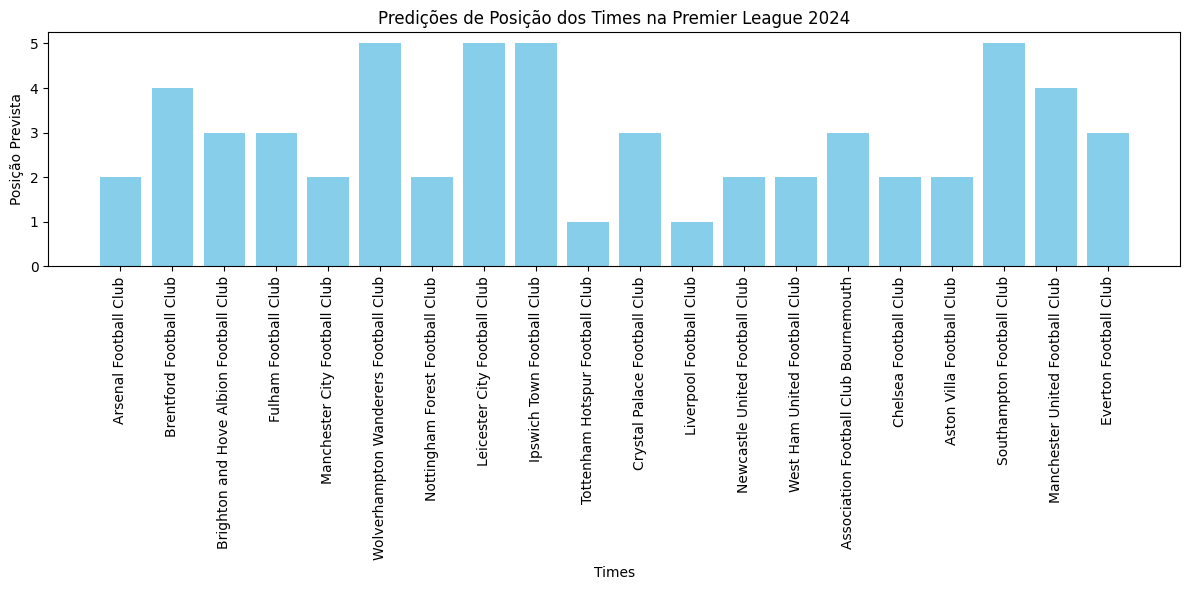

In [162]:
import matplotlib.pyplot as plt
#Vamos plotar um gráfico de barras para ver as predições
plt.figure(figsize=(12, 6))
plt.bar(df_predicoes['name'], df_predicoes['last_position'], color='skyblue')
plt.xlabel('Times')
plt.ylabel('Posição Prevista')
plt.title('Predições de Posição dos Times na Premier League 2024')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

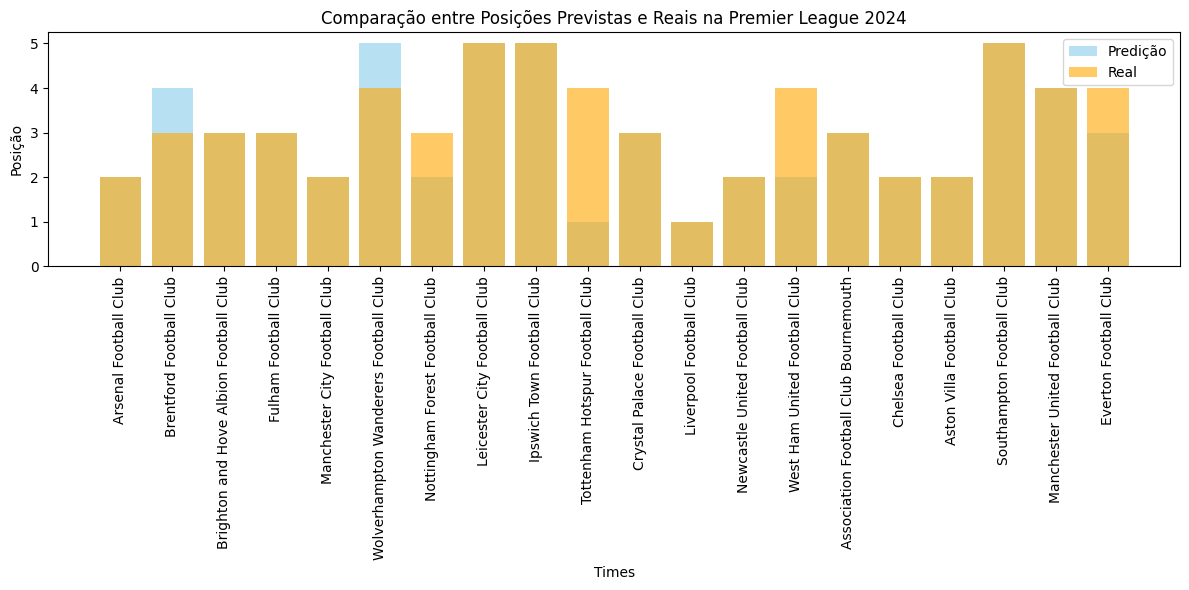

In [165]:
#Vamos fazer um gráfico que compare as posições reais com as previstas
df_real = df_novo_final[df_novo_final['season'] == 2024][['name', 'last_position']]
df_real = df_real.rename(columns={'last_position': 'real_position'})
df_completo = pd.merge(df_predicoes, df_real, on='name')
plt.figure(figsize=(12, 6))
plt.bar(df_completo['name'], df_completo['last_position'], label='Predição', color='skyblue', alpha=0.6)
plt.bar(df_completo['name'], df_completo['real_position'], label='Real', color='orange', alpha=0.6)
plt.xlabel('Times')
plt.ylabel('Posição')
plt.title('Comparação entre Posições Previstas e Reais na Premier League 2024')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
